In [3]:
import scanpy as sc
import pandas as pd
import ast
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import statistics as stats
from collections import Counter

ModuleNotFoundError: No module named 'pandas'

In [15]:
# Load Files
bc = pd.read_csv('../../data/lineage-barcodes/targeted-barcodes/targeted-barcodes-by-cell-bc.csv', index_col=0)
bc['Barcodes'] = [ast.literal_eval(x[8:-1]) for x in bc['Barcodes']]
umi_dict = pd.read_csv('../../data/lineage-barcodes/targeted-barcodes/final-umi-dict.csv', index_col=0)

#### Summary Plots

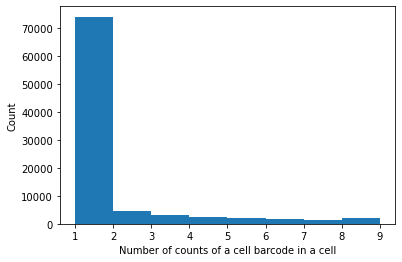

In [4]:
# plot num reads per barcode per cell
ls = []
for x in bc['Barcodes']:
    ls += list(x.values())
plt.hist(ls, bins=range(1, 10))
plt.xlabel('Number of counts of a cell barcode in a cell')
plt.ylabel('Count')
plt.show()

### Align UMI information

In [81]:
umi_dict['Cell Barcodes'] = [x.split(' ')[1].split('_')[0] for x in umi_dict.index]

In [90]:
umi_dict['LB+UMI'] = [x.split('_')[0] for x in umi_dict.index]

In [ ]:
umi_dict_ls = []
for x in bc.index:
    cb = x.split('_')[0]
    tmp = umi_dict[umi_dict['Cell Barcodes'] == cb]
    umi_dict_ls.append(dict(Counter(list(tmp['LB+UMI']))))

In [ ]:
bc['UMI Dict'] = umi_dict_ls

#### Filtering

In [18]:
bc = bc[[bool(x) for x in bc['Barcodes']]] # Filter out cells with empty barcode

In [20]:
# First off, remove all barcodes that have less than # (2) read for a given cell, and remove barcodes if they
# have less than 50% of the reads as the top bc in a cell
ls = []
relative_threshold = 0.5
for i in bc.index:
    x = bc['Barcodes'][i]
    max_bcs = max(x.values())
    filtered_dict = {k:v for k,v in x.items() if (v > 2) and (v > max_bcs*relative_threshold)}
    bc['Barcodes'][i] = filtered_dict


{'ATATTGCTCCTGACTAGGTCTCATGT': 5, 'ATTTACCTGTCCACTATCTCATTAGT': 1, 'ATCCGTCTATGGACGGACTCCTGAGT': 1, 'ATTGTGCTAATAACAAGTTCGCATGT': 1, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 1}
5 this is max
{'ATATTGCTCCTGACTAGGTCTCATGT': 5}
{'ATCGTTCTCCCGACAATCTCTGTGGT': 1}
1 this is max
{}
{'ATATCCCTTTGTACAAATTCCCAGGT': 1, 'ATATTTCTCAGTACAAATTCATGTGT': 1, 'ATCAGGCTCCGTACTCAATCTGTTGT': 1}
1 this is max
{}
{'ATGTTTCTAGAGACTTGTTCAGCCGT': 1}
1 this is max
{}
{'ATCTAACTTCATACATGATCGGTGGT': 21, 'ATGAGTCTAATTACCCTTTCAAATGT': 9, 'ATTTTACTGTGCACCATATCTTTAGT': 5, 'ATCACGCTTAGGACTTACTCAGTAGT': 2, 'ATTGCCCTGGAGACAAAATCAAAAGT': 1, 'ATGAGTCTAAATACAGACTCATGTGT': 1, 'ATACTACTTACAACAAACTCATTGGT': 1, 'ATCTTCCTGTTTACGAAATCGGTCGT': 1, 'ATTTTACTTCCAACGTCTTCGTAGGT': 1, 'ATTTTTCTAACGACCCACTCCTCAGT': 1, 'ATTGTCCTACTGACACAATCCGTGGT': 1, 'ATACCGCTGTAAACGTAGTCTCGGGT': 1, 'ATTTACCTGGGCACACATTCACGTGT': 1}
21 this is max
{'ATCTAACTTCATACATGATCGGTGGT': 21}
{'ATTTTGCTCATTACGTATTCATAAGT': 12, 'ATAAATCTATTCACGCTCTCTATAGT': 8, 'ATTCATCTGAGTACAAA

/mnt/geofflab/jupyterhub/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)



{}
{'ATACTCCTTTATACCCAATCAGGGGT': 1}
1 this is max
{}
{'ATATGCCTCAAGACGTTGTCTCGCGT': 2, 'ATTTTTCTTGACACCAATTCTAACGT': 1, 'ATTTATCTGGCGACCGAGTCTCATGT': 1, 'ATTTATCTAGAAACATACTCTGTAGT': 1, 'ATTGCTCTTGGTACGCCATCACAAGT': 1}
2 this is max
{}
{'ATGTCTCTAGTTACACCTTCGAGGGT': 1}
1 this is max
{}
{'ATAATGCTCCAAACATTCTCCTCAGT': 15, 'ATTTGACTCTTCACTCAGTCTCCCGT': 4, 'ATAGAGCTAATTACGAACTCTCCTGT': 1, 'ATTGTTCTTATGACTCAATCTCCTGT': 1, 'ATGTCGCTTTGAACAAGATCCGGTGT': 1, 'ATAAAACTGTATACGGACTCTGATGT': 1, 'ATCTGTCTTTACACGCATTCGCAAGT': 1, 'ATATCTCTTATGACTTATTCTTGTGT': 1, 'ATAGACCTGTTAACCATCTCTTTAGT': 1, 'ATGGTTCTGGGTACATAATCACAGGT': 1, 'ATTAGACTAGAAACGCCTTCCGTTGT': 1, 'ATGAACCTAAATACGGTTTCGGTGGT': 1, 'ATACAACTCGCAACGACTTCGGAGGT': 1, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 1, 'ATTGCACTCCCCACATTTTCATAAGT': 1}
15 this is max
{'ATAATGCTCCAAACATTCTCCTCAGT': 15}
{'ATTCCCCTGGAAACCTTTTCGTATGT': 13, 'ATACGTCTTTAAACAATGTCTTTCGT': 4, 'ATCTAACTTATGACGCGCTCATACGT': 1, 'ATTACTCTCTGGACAATTTCACCCGT': 1, 'ATCAGTCTGTGGACGTACTCTCAAGT': 

{}
{'ATTTGTCTGATAACAGTGTCTTCGGT': 1}
1 this is max
{}
{'ATTTTACTCAATACTTCTTCTTTGGT': 1}
1 this is max
{}
{'ATCGAACTCTGGACCTATTCACAAGT': 1}
1 this is max
{}
{'ATGTGCCTATCCACAAGCTCGGGTGT': 2}
2 this is max
{}
{'ATCGATCTCACCACAGGTTCCGTCGT': 11, 'ATTGCTCTAATAACGTGTTCTTTAGT': 5, 'ATTTACCTTAAAACGGTCTCGCACGT': 1, 'ATACTACTATGTACACAATCTTGGGT': 1, 'ATAGATCTCATGACCGTCTCTATAGT': 1, 'ATGTGTCTACCTACTAACTCAACCGT': 1}
11 this is max
{'ATCGATCTCACCACAGGTTCCGTCGT': 11}
{'ATCATGCTGATTACCAGCTCGCACGT': 2, 'ATTTAACTGTCGACCGCGTCGTCAGT': 1}
2 this is max
{}
{'ATACAACTGTTAACTGTTTCTACCGT': 9, 'ATTACTCTTGTTACATCGTCCTGTGT': 6, 'ATTTGCCTTAAGACTTCTTCGTTTGT': 1, 'ATGTATCTGGACACTATTTCCGTAGT': 1, 'ATAGATCTGAGGACATTTTCAATTGT': 1, 'ATCTCACTCCTAACAGACTCATAAGT': 1, 'ATACAGCTGTGTACGTCCTCTTCAGT': 1, 'ATACAACTTGACACGCTTTCATCGGT': 1}
9 this is max
{'ATACAACTGTTAACTGTTTCTACCGT': 9, 'ATTACTCTTGTTACATCGTCCTGTGT': 6}
{'ATATAACTCAGTACCTAATCTTGGGT': 1}
1 this is max
{}
{'ATACATCTCCATACTTGGTCATGGGT': 1}
1 this is max
{}
{'ATGAAGCTT

20 this is max
{'ATATCGCTTTCGACTTGTTCTTACGT': 20}
{'ATTTCACTTATAACGGCGTCAATAGT': 1}
1 this is max
{}
{'ATGTTTCTCGTGACAGTATCCCTTGT': 1}
1 this is max
{}
{'ATAGGACTAGGGACGGCTTCGCCTGT': 1, 'ATAGTTCTAAGTACGGGTTCACCAGT': 1}
1 this is max
{}
{'ATTGTGCTTTCCACTAGGTCTTATGT': 1}
1 this is max
{}
{'ATGTATCTTTGGACCTCCTCGGAAGT': 1}
1 this is max
{}
{'ATACATCTATCAACTTGTTCTTGCGT': 18, 'ATCTGACTTTATACCTCGTCACTCGT': 1, 'ATGATTCTCTAAACGTTCTCGAATGT': 1, 'ATGTGCCTAATTACCCCTTCCAATGT': 1, 'ATCAGTCTGTGGACGTACTCTCAAGT': 1, 'ATCCGCCTTTTTACCATATCGAAAGT': 1}
18 this is max
{'ATACATCTATCAACTTGTTCTTGCGT': 18}
{'ATTCCTCTCTATACCATATCCCAAGT': 1}
1 this is max
{}
{'ATATAACTCTTTACCTCTTCTTAGGT': 1}
1 this is max
{}
{'ATCTTTCTCACTACTGAGTCTCGCGT': 1}
1 this is max
{}
{'ATTTCCCTGTGTACCGTATCTACAGT': 1}
1 this is max
{}
{'ATGGACCTCTAAACTAAATCTGTAGT': 3, 'ATAAATCTGTTGACGTATTCAAGTGT': 2, 'ATACTCCTCAAAACATCATCGTCAGT': 1}
3 this is max
{'ATGGACCTCTAAACTAAATCTGTAGT': 3}
{'ATTAATCTCATCACATTATCTGGGGT': 1}
1 this is max
{}
{'ATTTTGC

{'ATTCAGCTGATAACAGATTCATAGGT': 8}
{'ATAAGGCTGAGTACGGGCTCTTAGGT': 17, 'ATTCATCTAAGCACTCACTCGCCTGT': 2, 'ATAGGGCTTTGAACCGTTTCTTGGGT': 1, 'ATCCAGCTTGAAACATAGTCAGAAGT': 1, 'ATAGATCTCATGACCGTCTCTATAGT': 1, 'ATTGCTCTTGCTACGTGATCGACTGT': 1, 'ATATAGCTCCTGACATACTCGAGAGT': 1, 'ATTGTGCTTTCCACTAGGTCTTATGT': 1, 'ATGAAGCTTCCGACCTGATCTTAGGT': 1}
17 this is max
{'ATAAGGCTGAGTACGGGCTCTTAGGT': 17}
{'ATCGGGCTATACACTCTTTCCTGCGT': 1, 'ATCGCACTAGCCACGAGTTCTCGCGT': 1, 'ATCTCTCTTAGTACTGAGTCTGTAGT': 1, 'ATAGTGCTTGTAACTGTATCCTCGGT': 1}
1 this is max
{}
{'ATTGACCTTATGACTTGCTCGCGAGT': 3, 'ATGTAGCTATACACCATTTCTTGTGT': 1, 'ATTGCACTTGTGACAACATCGGTTGT': 1, 'ATTTTGCTCAGCACATGGTCATGTGT': 1}
3 this is max
{'ATTGACCTTATGACTTGCTCGCGAGT': 3}
{'ATTACTCTGCGCACTGGGTCAATAGT': 20, 'ATGAAACTTGTGACATGATCCAATGT': 16, 'ATGCATCTCTCTACGCATTCAACAGT': 2, 'ATTGTCCTGGCAACGGGGTCAATAGT': 1, 'ATCCACCTGAAAACGTCGTCTCTGGT': 1, 'ATGATTCTCACAACAAAATCGTGAGT': 1, 'ATCGTTCTGCTCACATACTCATCAGT': 1, 'ATCAGTCTAACTACATTTTCTTATGT': 1, 'ATTTGTCTGATAACGCCA

{}
{'ATGTGACTTGCTACTTATTCTGATGT': 1}
1 this is max
{}
{'ATTATTCTTCACACTGGGTCCAACGT': 1}
1 this is max
{}
{'ATAAGGCTCAGAACAACTTCTAATGT': 8, 'ATCTGGCTACGAACCTCGTCCCGTGT': 8, 'ATAGTCCTTCCGACCTATTCCGATGT': 1, 'ATTGTACTTTGTACCGGGTCCAAAGT': 1, 'ATTATTCTTAATACTCGTTCATTAGT': 1, 'ATCTCTCTGAATACATGATCGATTGT': 1, 'ATGAAACTCGTCACTGATTCGTTGGT': 1}
8 this is max
{'ATAAGGCTCAGAACAACTTCTAATGT': 8, 'ATCTGGCTACGAACCTCGTCCCGTGT': 8}
{'ATGCTTCTGGGCACGTTTTCTGACGT': 20, 'ATTATGCTGAGCACATCATCTATTGT': 1, 'ATAAACCTTACGACTGAGTCGCAGGT': 1, 'ATTGCGCTCTTGACATTTTCATGCGT': 1, 'ATTCTACTCAGCACATTGTCTCTAGT': 1, 'ATAGTTCTGACCACTAAATCAGATGT': 1, 'ATTTCCCTTAACACCCGATCTAAGGT': 1}
20 this is max
{'ATGCTTCTGGGCACGTTTTCTGACGT': 20}
{'ATTTCGCTAATGACCATGTCGAGGGT': 120, 'ATAGATCTCATGACCGTCTCTATAGT': 34, 'ATTCTACTAGTTACGTCGTCATTCGT': 34, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 25, 'ATCCCTCTCAATACCACGTCATAAGT': 16, 'ATTTGTCTGGTTACAGCGTCTCTTGT': 13, 'ATCAGCCTGCTTACCTAATCCAACGT': 7, 'ATCTATCTTCGCACATGGTCTTACGT': 2, 'ATGACGCTGAAGACATACTCTAGGGT

1 this is max
{}
{'ATTACACTTGTAACCGAGTCGATTGT': 1}
1 this is max
{}
{'ATGTACCTCCATACGTCATCATAAGT': 1}
1 this is max
{}
{'ATAGTTCTTTCAACACTCTCCGTTGT': 1}
1 this is max
{}
{'ATTTTTCTCTTCACAGCGTCAAGCGT': 1}
1 this is max
{}
{'ATGAAGCTTCCGACCTGATCTTAGGT': 1, 'ATCGCACTTCGTACGTCATCTATCGT': 1}
1 this is max
{}
{'ATCCGTCTCCGAACTACGTCAAAAGT': 1, 'ATTGAACTCGCTACGACGTCAAAAGT': 1}
1 this is max
{}
{'ATCGATCTTTACACTGAATCAGGAGT': 5}
5 this is max
{'ATCGATCTTTACACTGAATCAGGAGT': 5}
{'ATAACACTGAGTACAAGTTCCGCCGT': 1}
1 this is max
{}
{'ATTAACCTGTTTACGTGTTCCCCGGT': 1, 'ATGTTTCTGTTTACGATTTCGATAGT': 1}
1 this is max
{}
{'ATAGACCTGTTAACCATCTCTTTAGT': 2, 'ATATTACTATTTACTTGTTCTAACGT': 1, 'ATGGGGCTACAAACTAAGTCGTGGGT': 1, 'ATGTTACTCTGGACTCCTTCTGGCGT': 1}
2 this is max
{}
{'ATCTACCTAATGACTGATTCGTGAGT': 3}
3 this is max
{'ATCTACCTAATGACTGATTCGTGAGT': 3}
{'ATTTTCCTGTATACAGAGTCAATCGT': 1}
1 this is max
{}
{'ATGTCACTTTCAACTTTCTCAACTGT': 1}
1 this is max
{}
{'ATGCTACTTTATACTTAGTCTAGGGT': 1}
1 this is max
{}
{'ATTTCAC

11 this is max
{'ATCTTTCTTTTAACCAGTTCTTATGT': 11}
{'ATATTTCTCCCCACCTATTCGATAGT': 6, 'ATGTCTCTTCTTACTTCGTCACAAGT': 5, 'ATTCCGCTAGGGACAAAGTCTAACGT': 1, 'ATGTAGCTGACTACTCTGTCGACTGT': 1, 'ATCATACTGCAGACCCACTCCATCGT': 1, 'ATGACGCTAGATACGATTTCCTGCGT': 1, 'ATGTTGCTTTATACGAGTTCGTATGT': 1}
6 this is max
{'ATATTTCTCCCCACCTATTCGATAGT': 6, 'ATGTCTCTTCTTACTTCGTCACAAGT': 5}
{'ATACGACTTCATACACTGTCAATCGT': 1}
1 this is max
{}
{'ATACCCCTCCCAACTTTATCGTTTGT': 1}
1 this is max
{}
{'ATTATGCTTACAACAAGTTCTGTGGT': 14, 'ATGTGACTTTATACGCTTTCACATGT': 6, 'ATGCCTCTGGATACCGATTCCACGGT': 6, 'ATACTACTTCCAACACAATCCCCCGT': 4, 'ATTCTACTAATGACACATTCTATCGT': 3, 'ATTTTCCTACCGACAATATCAAATGT': 3, 'ATTCCACTTAGGACATTTTCAGACGT': 2, 'ATTAGCCTATTAACGGCGTCCCAGGT': 1, 'ATGCATCTTAAAACCCCTTCATAAGT': 1, 'ATGCAACTTCCCACTGATTCGGCAGT': 1, 'ATTTGGCTAGATACAACATCATATGT': 1, 'ATCTGTCTTACAACATTGTCTTTCGT': 1}
14 this is max
{'ATTATGCTTACAACAAGTTCTGTGGT': 14}
{'ATTTGCCTTAAGACGTCTTCGCTCGT': 1}
1 this is max
{}
{'ATTATCCTCGCAACCTATTCTGGTGT': 1}
1 

{'ATACAACTTTAAACATCATCGTTTGT': 1}
1 this is max
{}
{'ATTCAGCTTATCACTATTTCATTCGT': 8, 'ATGCATCTTTTAACACTGTCCCAGGT': 2, 'ATGTCACTAAACACATATTCGTACGT': 1, 'ATTTGTCTACCTACGTAGTCTTCCGT': 1, 'ATATGACTCGTTACTGACTCCTCTGT': 1, 'ATGTGTCTAAGTACGTCATCTAATGT': 1, 'ATTGATCTTGTAACATGCTCAAAAGT': 1}
8 this is max
{'ATTCAGCTTATCACTATTTCATTCGT': 8}
{'ATTGTGCTTAGAACCGGTTCAACGGT': 16, 'ATGTCCCTCTTGACGAACTCACAAGT': 10, 'ATTATCCTACTTACATTTTCTTCGGT': 7, 'ATGTCTCTTGGTACTTATTCACTGGT': 6, 'ATTTTTCTTACTACGTCGTCTATGGT': 6, 'ATTGGTCTATCAACTGCTTCAGTTGT': 6, 'ATTCGCCTGACAACTCTTTCTTATGT': 5, 'ATCAACCTTCGCACACATTCAGGTGT': 1, 'ATGGAGCTTTCGACACATTCTCTGGT': 1, 'ATGCTCCTTTTTACTTGTTCTCGTGT': 1, 'ATTCCCCTGGAAACCTTTTCGTATGT': 1, 'ATTTCACTGTCTACTGTATCCATTGT': 1, 'ATGCGGCTTTGGACGTGATCGACTGT': 1, 'ATTGATCTTGTAACATTCTCTGGCGT': 1, 'ATTGTGCTTAACACACCTTCTACCGT': 1, 'ATTTTCCTACTAACTGAATCACGAGT': 1, 'ATCATGCTTTGAACCTAGTCCAAGGT': 1, 'ATAGTTCTTCGCACTACTTCCGGTGT': 1, 'ATATCCCTCTGGACCAAATCTAGTGT': 1, 'ATTCCCCTGTTTACGTTTTCATTTGT': 1, 'ATCGG

{'ATCCCCCTAGATACGGGTTCTTTCGT': 1}
1 this is max
{}
{'ATTCGACTAGCGACTTGATCAATCGT': 1}
1 this is max
{}
{'ATTAGGCTAAGTACCATATCTCTGGT': 8, 'ATCCATCTTCGCACATGGTCTTACGT': 1, 'ATCCCACTATCCACAATATCTTGTGT': 1, 'ATAGTACTCTACACTTATTCAGTAGT': 1}
8 this is max
{'ATTAGGCTAAGTACCATATCTCTGGT': 8}
{'ATCTCACTCGAAACAAAGTCCGCGGT': 7, 'ATCCGACTTGGGACCCTCTCTCGTGT': 5, 'ATGTTACTTGGTACGGGTTCTAAGGT': 4, 'ATGTTCCTTTCCACCGTTTCTACTGT': 1, 'ATCCCTCTATAGACTTCGTCATACGT': 1, 'ATGCACCTCATTACAGATTCACGTGT': 1, 'ATCTTTCTAACGACGATTTCTCTTGT': 1, 'ATTATACTGACAACTTTATCTGCGGT': 1, 'ATATGGCTGTTAACGATGTCCGGAGT': 1}
7 this is max
{'ATCTCACTCGAAACAAAGTCCGCGGT': 7, 'ATCCGACTTGGGACCCTCTCTCGTGT': 5, 'ATGTTACTTGGTACGGGTTCTAAGGT': 4}
{'ATATAGCTATTTACCAGCTCTGCTGT': 14, 'ATGGGTCTTGAAACTCCATCTTGGGT': 6, 'ATCATACTTATCACGACCTCGCCGGT': 6, 'ATCGGGCTTCGTACAACCTCGTCGGT': 5, 'ATCGCTCTATATACCAAGTCTTCCGT': 1, 'ATTGGGCTCATTACGTCATCTTACGT': 1, 'ATCTAACTTTCAACATTATCACCCGT': 1, 'ATCAACCTTTATACTAACTCGCTAGT': 1, 'ATCACTCTTAGGACTTCATCATGTGT': 1, 'ATTCA

{'ATATCCCTCTAAACCAGTTCTAAAGT': 14, 'ATCTTACTGAGAACTGCTTCTAGTGT': 2, 'ATTACGCTCCATACTTTATCGTTAGT': 1, 'ATGGTGCTCATTACTTGGTCAGCCGT': 1, 'ATACATCTAAGTACTATATCGGGTGT': 1}
14 this is max
{'ATATCCCTCTAAACCAGTTCTAAAGT': 14}
{'ATACTCCTGACAACCTCCTCCTCTGT': 12, 'ATGTCGCTCTAGACCATATCGTACGT': 11, 'ATAGCTCTGCGAACGGCATCTTAAGT': 9, 'ATGTACCTAATCACGACGTCGGTGGT': 1, 'ATGCGCCTTAGGACCTTCTCTCCTGT': 1, 'ATGGTACTCAGAACCCCATCGGCCGT': 1, 'ATCACACTTTATACCCGTTCTCACGT': 1, 'ATCCTTCTCAGTACACGGTCGAATGT': 1, 'ATTTTGCTTTATACCTCTTCCGGAGT': 1, 'ATGATTCTGGGGACTTAGTCATCAGT': 1}
12 this is max
{'ATACTCCTGACAACCTCCTCCTCTGT': 12, 'ATGTCGCTCTAGACCATATCGTACGT': 11, 'ATAGCTCTGCGAACGGCATCTTAAGT': 9}
{'ATGGGTCTACAAACGTAATCCGATGT': 1}
1 this is max
{}
{'ATGTACCTTCAGACTTTATCCATAGT': 12, 'ATACCTCTGATGACTCAATCACATGT': 7, 'ATCGCTCTTTGAACGCACTCGCAGGT': 4, 'ATGTTTCTTATTACACGGTCGACTGT': 1, 'ATCATTCTACGGACGGTTTCTTTAGT': 1, 'ATATGCCTCGCAACGTTATCAAACGT': 1, 'ATGCCACTAGGCACGGGTTCAAGCGT': 1, 'ATTGTTCTGGTGACTTTTTCCGTGGT': 1, 'ATTGCTCTTACGACA

{'ATTTTTCTGGCGACATTCTCAAAGGT': 4}
{'ATGAACCTGGATACTTAATCCACCGT': 2, 'ATATGACTTTTAACTTGATCGTAGGT': 1, 'ATGATTCTTTTTACGCACTCAATCGT': 1}
2 this is max
{}
{'ATTCAACTCTTTACCCGTTCTATTGT': 1}
1 this is max
{}
{'ATGCCACTATAGACCTATTCAGACGT': 1}
1 this is max
{}
{'ATGGATCTAGAAACAGCGTCCTTGGT': 1}
1 this is max
{}
{'ATTTCCCTATCTACGAGTTCTTATGT': 1}
1 this is max
{}
{'ATGGATCTGGTCACAGTTTCTGCAGT': 6, 'ATTAAGCTGGAAACTGGTTCAATCGT': 4, 'ATGGTCCTCAGAACAGGATCCCCCGT': 4, 'ATATATCTGCGAACATAGTCATTTGT': 3, 'ATAATTCTATACACTAAATCTAATGT': 3, 'ATTGTTCTGAAGACGAGGTCGACTGT': 2, 'ATGGTTCTAAGAACAGTCTCAGTTGT': 1, 'ATCTGGCTTAGAACTTTATCGAGAGT': 1, 'ATTCAACTTGTCACTTTTTCGTTTGT': 1, 'ATTTAGCTTTGGACGATTTCGCTCGT': 1, 'ATTTATCTCGGAACACCATCCCCAGT': 1, 'ATATCTCTTTTTACAGCGTCTAAGGT': 1, 'ATCTATCTTCGCACGGTATCATGTGT': 1, 'ATGTACCTATGGACTACGTCCTTGGT': 1, 'ATATCGCTTGCAACTTTCTCCACAGT': 1, 'ATCTAACTATGGACCAAATCGATAGT': 1}
6 this is max
{'ATGGATCTGGTCACAGTTTCTGCAGT': 6, 'ATTAAGCTGGAAACTGGTTCAATCGT': 4, 'ATGGTCCTCAGAACAGGATCCCCCGT': 4}
{'

{'ATTCTCCTATTAACATGTTCTTTAGT': 3}
{'ATGAGTCTTGGGACAATGTCGTTTGT': 7, 'ATTACTCTCTTGACTAGTTCAAGAGT': 4, 'ATTATGCTTTGGACACTTTCTTACGT': 1, 'ATCGGACTTCACACTACTTCCCCTGT': 1, 'ATGGGACTCAAAACTTCGTCGTTTGT': 1, 'ATAAATCTATTTACACCCTCGATTGT': 1, 'ATACGGCTTCGAACAAAGTCCAATGT': 1, 'ATTTTACTTATCACGATGTCAAAGGT': 1}
7 this is max
{'ATGAGTCTTGGGACAATGTCGTTTGT': 7, 'ATTACTCTCTTGACTAGTTCAAGAGT': 4}
{'ATTAATCTTAGAACTAACTCATTGGT': 32, 'ATGCATCTTGTCACGGTCTCGCTCGT': 8, 'ATGGTACTGATTACTGTTTCTTTCGT': 4, 'ATTGCTCTGGTAACTATTTCGGTGGT': 4, 'ATGGGTCTGTGGACTCAATCGCTCGT': 2, 'ATTCCACTGGTTACAATATCCGATGT': 2, 'ATTCACCTGCGCACTCTCTCACCTGT': 2, 'ATGTAACTTGAAACCCTTTCCTTGGT': 1, 'ATCGTCCTAGGTACTGTCTCGCGAGT': 1, 'ATTAATCTGATTACATTTTCCTTAGT': 1, 'ATTCGACTGTTTACATCGTCTTCTGT': 1, 'ATGCCACTATGGACTCCTTCATGTGT': 1, 'ATCATGCTGAAAACTAACTCAATAGT': 1, 'ATATCGCTCCGTACACAATCAACAGT': 1, 'ATCGTGCTCATAACCTCTTCGCTTGT': 1, 'ATATTTCTAGCTACATCGTCCTCGGT': 1, 'ATTGAACTGAATACCGACTCCGGCGT': 1, 'ATGTGACTTAATACTGATTCGATCGT': 1, 'ATTGACCTTCCCACTCTCTCGCG

1 this is max
{}
{'ATATCACTTTTTACCGGATCACTTGT': 9, 'ATGTAACTTTTGACAGGTTCAGTAGT': 1, 'ATGACGCTTGGAACTTTGTCCACGGT': 1, 'ATCGTCCTATGAACAGGATCTCTCGT': 1}
9 this is max
{'ATATCACTTTTTACCGGATCACTTGT': 9}
{'ATCTAGCTTAAGACGTCCTCTGACGT': 6, 'ATTGCCCTTCAGACATACTCTTAGGT': 5, 'ATTCCGCTATCCACTTGTTCGTCAGT': 1, 'ATACTACTTCTAACCGTGTCTCTTGT': 1, 'ATGATTCTATAAACAGTCTCCCCCGT': 1, 'ATCAGACTTCATACCTGATCTTGGGT': 1}
6 this is max
{'ATCTAGCTTAAGACGTCCTCTGACGT': 6, 'ATTGCCCTTCAGACATACTCTTAGGT': 5}
{'ATGAGTCTGCTGACAGGCTCGAGGGT': 12, 'ATTGACCTAACAACCCCCTCCGTCGT': 10, 'ATACGTCTAGTTACCCCGTCTAAAGT': 1, 'ATATGGCTTATTACCTGGTCTTGTGT': 1, 'ATGGGACTTATCACTATATCTCGCGT': 1, 'ATACGGCTCGGAACTTGTTCCAGAGT': 1, 'ATCTTACTTAGTACATAGTCCTCCGT': 1, 'ATCTTACTTTTTACAGATTCTTTAGT': 1, 'ATGCTGCTCTTCACAATGTCGAAGGT': 1, 'ATTGGCCTGTTAACTTAGTCTTACGT': 1, 'ATCCAGCTCTAAACTCCTTCCATTGT': 1, 'ATGCGACTCAATACTATGTCTTGGGT': 1, 'ATTTTGCTACGAACTGTCTCGACTGT': 1, 'ATCTACCTTGACACTAAGTCCTTTGT': 1, 'ATGTAACTTATAACTCGTTCATTCGT': 1, 'ATGCCCCTTGTCACTTTGTCTCG

{}
{'ATTTTACTAGGTACCTTATCTACCGT': 97, 'ATCGACCTATCAACACTGTCTAATGT': 2, 'ATACATCTCTTTACAAACTCCGTCGT': 2, 'ATTATACTTGCTACATCTTCTTGGGT': 1, 'ATCTTTCTTTTAACCAGTTCTTATGT': 1, 'ATCACACTTACTACTCTATCTCTAGT': 1, 'ATCCCTCTTCACACCGTTTCTCTCGT': 1, 'ATGGTCCTCACAACGTGCTCTTTTGT': 1, 'ATGGTCCTCGCCACGTAATCCGACGT': 1, 'ATTGTTCTATTCACGCACTCAAACGT': 1, 'ATTTACCTGACAACCCGATCACTAGT': 1, 'ATTCGGCTTCGCACGCATTCAGACGT': 1, 'ATGATGCTGCTGACGTAATCACCTGT': 1, 'ATTTTACTCTCAACTACATCCTCCGT': 1, 'ATTGGCCTCCTTACATTCTCATGCGT': 1, 'ATTTGACTGTCAACTTTATCTATTGT': 1, 'ATTTTACTAGGTACCTTATCTGCCGT': 1, 'ATGTTACTCTATACGTAATCATATGT': 1, 'ATTCAGCTATTGACTATATCAAATGT': 1, 'ATCATACTTGTTACCCTGTCTTGTGT': 1, 'ATGTTCCTACGTACCGTTTCGTACGT': 1, 'ATGATACTTAGTACCAGATCGTATGT': 1, 'ATGTAACTAAATACCCTCTCGCTAGT': 1, 'ATCGCGCTTTTAACAGTATCTGACGT': 1}
97 this is max
{'ATTTTACTAGGTACCTTATCTACCGT': 97}
{'ATCGGCCTCGCTACGTGTTCACGTGT': 1}
1 this is max
{}
{'ATTCTTCTAGTCACCTATTCCTCGGT': 1, 'ATTGGTCTTTTTACTTAGTCGTCAGT': 1}
1 this is max
{}
{'ATAACTCTTGGTACCA

{}
{'ATCAAGCTTCTGACTCATTCCCTCGT': 31, 'ATAGATCTCATGACCGTCTCTATAGT': 2, 'ATCAAGCTCCTGACTCATTCCCTCGT': 1, 'ATCCTACTACATACTGTTTCCCTGGT': 1, 'ATATTTCTAATGACCAATTCCCTGGT': 1, 'ATTGTGCTGGTAACCGCGTCTCAAGT': 1, 'ATGTCTCTTACTACGACTTCGTACGT': 1, 'ATTCGTCTCAGTACGTACTCTAGTGT': 1, 'ATAAAACTAAGTACTTCTTCAATTGT': 1, 'ATCGCTCTTTGTACCTAATCTTTCGT': 1, 'ATCCTACTCATGACTCGTTCCCCTGT': 1, 'ATGATACTTAGTACCAGATCGTATGT': 1, 'ATGGGGCTAATGACTCGATCGCATGT': 1, 'ATCCTCCTCTTCACCGGGTCCGTGGT': 1, 'ATATCTCTTTGAACAGGCTCTCCCGT': 1, 'ATAGTACTTGAGACTTAATCACGGGT': 1}
31 this is max
{'ATCAAGCTTCTGACTCATTCCCTCGT': 31}
{'ATCCGTCTATCTACTTATTCGTTGGT': 1}
1 this is max
{}
{'ATCTTGCTGTTTACAGTGTCCCGGGT': 10, 'ATTAGCCTGGCGACTATATCAGAGGT': 7, 'ATAAATCTTCTTACTGTTTCACGGGT': 4, 'ATCCAACTACCTACAAAATCTCTTGT': 4, 'ATTCTGCTGAAGACACGGTCATACGT': 4, 'ATCAGCCTATACACCCGGTCCACCGT': 1, 'ATTCTACTGTGGACGTACTCAATTGT': 1, 'ATGTTACTCTATACCTCATCACTGGT': 1, 'ATCTTGCTGCGTACATCCTCTTGCGT': 1, 'ATGCGTCTGTTAACTAGGTCAGCAGT': 1, 'ATTCTCCTTTGTACAGTTTCCGTGGT': 1, '

{}
{'ATGTAACTGTATACATAATCTAGTGT': 1}
1 this is max
{}
{'ATCGATCTTTACACTGAATCAGGAGT': 1}
1 this is max
{}
{'ATCACGCTGGTTACCATCTCGTGCGT': 1}
1 this is max
{}
{'ATCAGCCTGCATACTTTTTCTGACGT': 1}
1 this is max
{}
{'ATCTCACTGAAGACCAACTCATAAGT': 1}
1 this is max
{}
{'ATTAGACTGAATACATCATCCCGCGT': 1}
1 this is max
{}
{'ATTGGCCTAGCGACGCGCTCAATAGT': 10, 'ATTGGTCTTTTTACTTAGTCGTCAGT': 5, 'ATCTAACTCAGCACTATTTCAGACGT': 4, 'ATTCTTCTAGTCACCTATTCCTCGGT': 1, 'ATAAGACTAGTTACAATATCTTTTGT': 1, 'ATTGAACTGTCTACCAATTCTACGGT': 1, 'ATGAGGCTTCTTACTTTGTCCACAGT': 1, 'ATTGACCTGATAACCTTTTCTATTGT': 1, 'ATAAGGCTAAATACTTGTTCGTCTGT': 1, 'ATGAGACTTTGAACGTGTTCTTGGGT': 1, 'ATGCGCCTCTTCACCGTATCCCTCGT': 1, 'ATTGCCCTTTGCACTTGCTCTTTCGT': 1, 'ATACTTCTAAGTACCTCATCGTAGGT': 1}
10 this is max
{'ATTGGCCTAGCGACGCGCTCAATAGT': 10}
{'ATGCTGCTTGTAACTCAATCGTAAGT': 4, 'ATTCTACTCGTAACTCCTTCCAAGGT': 3, 'ATCTGGCTATAGACTCGATCACCGGT': 1, 'ATTATTCTCTAGACGGATTCGTGAGT': 1, 'ATAGCACTGTGAACTCTCTCTATAGT': 1}
4 this is max
{'ATGCTGCTTGTAACTCAATCGTAAGT':

1 this is max
{}
{'ATCACCCTCCAGACTACCTCGGTTGT': 10, 'ATGCGTCTATTCACACTATCATCTGT': 6, 'ATCAGACTTCATACCTGATCTTGGGT': 5, 'ATTGCCCTTCAGACATACTCTTAGGT': 4, 'ATCTAGCTTAAGACGTCCTCTGACGT': 2, 'ATAGAGCTCCTCACTTTCTCTTAAGT': 1, 'ATGCGGCTAAATACGCTCTCTCCAGT': 1, 'ATGTGCCTTACTACATAGTCTCACGT': 1}
10 this is max
{'ATCACCCTCCAGACTACCTCGGTTGT': 10, 'ATGCGTCTATTCACACTATCATCTGT': 6}
{'ATTATTCTTCACACGATCTCCTTCGT': 1}
1 this is max
{}
{'ATGCTCCTGAAGACCAAATCGAGTGT': 5, 'ATCCATCTAATTACCGATTCCTTAGT': 1, 'ATTTGGCTAATCACGCCTTCACTTGT': 1, 'ATCTTACTAATTACTTCCTCCACAGT': 1}
5 this is max
{'ATGCTCCTGAAGACCAAATCGAGTGT': 5}
{'ATTGCACTAACGACTCCATCAAACGT': 18, 'ATGCGGCTGTAGACCCCTTCATTTGT': 1, 'ATTAGGCTAAAAACTGGTTCATCCGT': 1, 'ATCGGACTTTCGACTTTATCAATGGT': 1, 'ATCATACTTGTTACCCTGTCTTGTGT': 1, 'ATATTTCTTTACACTGATTCCTCCGT': 1, 'ATTACTCTTCTTACCGGATCCACCGT': 1}
18 this is max
{'ATTGCACTAACGACTCCATCAAACGT': 18}
{'ATATCTCTGATTACGGTTTCCCACGT': 1, 'ATCTATCTCGTGACCTAATCCACCGT': 1}
1 this is max
{}
{'ATCCTACTGGAAACACTGTCGCGTGT': 2, '

{'ATGTTGCTTGTAACTGCGTCTTCCGT': 10}
{'ATGATTCTCACAACAAAATCGTGAGT': 1}
1 this is max
{}
{'ATCAAACTCTTTACTAACTCTCTTGT': 1}
1 this is max
{}
{'ATGTTTCTCATTACGTTGTCTGTTGT': 3, 'ATGCGGCTGCAGACACGGTCCGCTGT': 2, 'ATATACCTGGTAACTGAATCAATGGT': 2, 'ATCCTGCTAATTACTGACTCTGTTGT': 2, 'ATAGACCTGTATACAACTTCATATGT': 1, 'ATCTGTCTTACAACATTGTCTTTCGT': 1, 'ATCCAACTTGTTACTTCTTCACCTGT': 1}
3 this is max
{'ATGTTTCTCATTACGTTGTCTGTTGT': 3}
{'ATCCTACTACATACTGTTTCCCTGGT': 1, 'ATTTTGCTGTCGACTTCATCTTGAGT': 1}
1 this is max
{}
{'ATTGGGCTACAAACGTCATCTCCGGT': 1}
1 this is max
{}
{'ATATTACTTCTTACTAGGTCTGTAGT': 1, 'ATCTGCCTAAATACCTTGTCCTATGT': 1}
1 this is max
{}
{'ATAGCTCTAGTCACCGTGTCAAGAGT': 1}
1 this is max
{}
{'ATAGTACTGGATACTCCCTCTCCGGT': 5, 'ATTGCACTGCGAACACTCTCCACTGT': 5, 'ATTGTTCTTTCGACGGCCTCTATCGT': 4, 'ATTCGCCTTCGTACAGGTTCCCCGGT': 4, 'ATTAGGCTTTGCACTCTCTCCGCAGT': 1, 'ATAAATCTCGGCACAATGTCCCACGT': 1}
5 this is max
{'ATAGTACTGGATACTCCCTCTCCGGT': 5, 'ATTGCACTGCGAACACTCTCCACTGT': 5, 'ATTGTTCTTTCGACGGCCTCTATCGT': 4, 

{}
{'ATAATTCTTGAAACAGCTTCTGTAGT': 1}
1 this is max
{}
{'ATTGCACTTGACACAATATCTTTTGT': 1}
1 this is max
{}
{'ATGCAACTGTGGACTTAATCGTCCGT': 1, 'ATCATCCTGTCTACTCTGTCTAGTGT': 1}
1 this is max
{}
{'ATTCTTCTGAAAACAAAATCTCGGGT': 1, 'ATCTCCCTTGGGACGGGATCTTGCGT': 1, 'ATGATGCTACATACCGTCTCTAGAGT': 1}
1 this is max
{}
{'ATTGTACTATGTACCGAATCATTCGT': 13, 'ATTCTCCTTTATACAAGATCGGAAGT': 1, 'ATGAGACTAGGTACGTGCTCTTTTGT': 1}
13 this is max
{'ATTGTACTATGTACCGAATCATTCGT': 13}
{'ATTTGTCTGTAAACGCTATCCTTGGT': 6, 'ATTATCCTGTGAACGTTCTCTTGCGT': 1, 'ATGATTCTACAAACATAGTCAAGAGT': 1}
6 this is max
{'ATTTGTCTGTAAACGCTATCCTTGGT': 6}
{'ATACATCTGACTACTTGGTCTCTCGT': 20, 'ATTATGCTTCGTACATTATCGTGAGT': 19, 'ATTACCCTGTTAACTCAATCTATCGT': 15, 'ATAATACTGGCCACTTCGTCCTTCGT': 12, 'ATTAGTCTTTGCACCCCGTCATTGGT': 11, 'ATTCACCTTTCTACTTTGTCGAAGGT': 4, 'ATAACCCTGTTAACTCAATCTATCGT': 2, 'ATGTACCTCCACACGTTATCCCAAGT': 2, 'ATAGGCCTCTCTACTCTTTCTATCGT': 2, 'ATTTTGCTTTTGACAAGGTCCTGTGT': 1, 'ATTCATCTTAAGACGTGTTCGGGTGT': 1, 'ATTTCTCTGTATACCTTATCGATAG

{'ATTCGTCTTAAAACGTCTTCATTGGT': 18, 'ATACTGCTGGGGACCTAATCAGTAGT': 13}
{'ATCCGTCTATGGACGGACTCCTGAGT': 1}
1 this is max
{}
{'ATTCCGCTTCATACGGGTTCTAGTGT': 7, 'ATTCGGCTTTAAACAATTTCGTCAGT': 7, 'ATGCCGCTGCTGACCTACTCTGAAGT': 1, 'ATCTCGCTAATCACACGGTCGTAAGT': 1, 'ATTTGGCTATTAACATTGTCGATAGT': 1, 'ATGTCGCTTCTAACGTAATCCATAGT': 1, 'ATATAGCTGCTCACATTGTCCCCGGT': 1}
7 this is max
{'ATTCCGCTTCATACGGGTTCTAGTGT': 7, 'ATTCGGCTTTAAACAATTTCGTCAGT': 7}
{'ATGCGGCTGTAAACTCTATCAGCGGT': 1}
1 this is max
{}
{'ATCTTTCTAGCTACACAATCATAGGT': 15, 'ATAATTCTAATTACCATATCACTGGT': 10, 'ATACTGCTTAACACCCTATCGCCAGT': 5, 'ATCTGGCTTATTACCCCATCTGTTGT': 1, 'ATAGAGCTTAGTACAAGTTCGCTCGT': 1, 'ATTCACCTTTGTACGTGTTCAACCGT': 1, 'ATTGGGCTATGGACTATGTCGGCCGT': 1, 'ATAAAGCTGTCAACATCGTCCTTAGT': 1, 'ATGGCACTGGGGACTTAGTCGCGAGT': 1, 'ATAGATCTCATGACCGTCTCTATAGT': 1}
15 this is max
{'ATCTTTCTAGCTACACAATCATAGGT': 15, 'ATAATTCTAATTACCATATCACTGGT': 10}
{'ATTTGTCTCCGCACGCACTCTCCCGT': 1}
1 this is max
{}
{'ATCTCTCTTGGGACAGTGTCAGCGGT': 1}
1 this is max


{}
{'ATAGTCCTCTAAACAGCATCTTCAGT': 1}
1 this is max
{}
{'ATTTTTCTGCAGACTTAGTCGACTGT': 1}
1 this is max
{}
{'ATGGGCCTACGTACTGCATCGCGGGT': 7, 'ATTAGCCTCGAGACCACGTCGTGTGT': 5, 'ATGTTCCTGCGAACATCTTCGTATGT': 1, 'ATCCGACTTGCGACTTTCTCATTTGT': 1, 'ATAATTCTCTGCACCACATCGTATGT': 1, 'ATCATTCTTGGTACCTTATCTGTAGT': 1, 'ATGCTTCTTGGCACTCCCTCACCGGT': 1, 'ATTCTGCTTAATACCTTTTCAATCGT': 1, 'ATCTCCCTTTTTACCTTTTCCAATGT': 1, 'ATTTCCCTGTTAACGTGTTCTCCGGT': 1, 'ATCCTGCTAGTCACGACATCATTCGT': 1, 'ATGGATCTAGTCACGCTGTCTTAAGT': 1, 'ATGATTCTCGGTACTAAGTCCCTGGT': 1, 'ATATCCCTCAGTACCCAATCATTGGT': 1, 'ATTCCTCTCCGTACCAGGTCGCCAGT': 1, 'ATTGTTCTTTACACACAATCAACGGT': 1, 'ATAGTGCTGGTGACTGGCTCACAAGT': 1, 'ATTTATCTTCGGACACCCTCACCAGT': 1, 'ATGTTGCTATTCACTGCTTCACAAGT': 1, 'ATGTTCCTTCAGACAAGCTCTGTAGT': 1, 'ATTGTTCTACGAACATTTTCATATGT': 1, 'ATCAGTCTAAGGACCTAATCATTTGT': 1}
7 this is max
{'ATGGGCCTACGTACTGCATCGCGGGT': 7, 'ATTAGCCTCGAGACCACGTCGTGTGT': 5}
{'ATTTCACTTTCGACCGTCTCCTATGT': 7, 'ATTGACCTAAAAACACATTCATCAGT': 5, 'ATTGTTCTACGAACATTTT

{}
{'ATTAGACTACATACTTTATCTTCCGT': 1}
1 this is max
{}
{'ATCCTGCTCTTGACAAGGTCCAAGGT': 1}
1 this is max
{}
{'ATCTTCCTAGACACAAGTTCAGCGGT': 1}
1 this is max
{}
{'ATGTACCTTACGACTATGTCTTACGT': 1, 'ATTGTGCTTCGTACGCAATCGCTCGT': 1}
1 this is max
{}
{'ATGTTGCTTTTAACGTTCTCTCGTGT': 1}
1 this is max
{}
{'ATTGGTCTGTGTACTTTGTCTATAGT': 8, 'ATACTACTACGAACCGATTCAATGGT': 2, 'ATATGTCTAATGACAGTTTCTCATGT': 1, 'ATAAAACTGGCTACTAACTCTCATGT': 1, 'ATAATGCTAGGTACTGTTTCGCAGGT': 1, 'ATATGTCTGGACACGAAATCCATAGT': 1, 'ATGATGCTTTTTACATTGTCTAATGT': 1}
8 this is max
{'ATTGGTCTGTGTACTTTGTCTATAGT': 8}
{'ATGCACCTTTGTACTCGGTCATCGGT': 5, 'ATGCTTCTTTCTACGTCGTCTTCTGT': 1, 'ATGTTACTCTGGACTCCTTCTGGCGT': 1}
5 this is max
{'ATGCACCTTTGTACTCGGTCATCGGT': 5}
{'ATTCTGCTTACAACGCAATCGTATGT': 1, 'ATAATTCTCTGCACCACATCGTATGT': 1}
1 this is max
{}
{'ATCTAGCTTAGAACTATGTCCTTGGT': 4, 'ATTCTACTTCATACCGCGTCCTTGGT': 1, 'ATCGTACTCGTTACGAATTCTTAGGT': 1}
4 this is max
{'ATCTAGCTTAGAACTATGTCCTTGGT': 4}
{'ATAGGCCTATAGACAATATCAGGGGT': 2}
2 this is max
{

{'ATGCACCTATTAACACACTCGAGTGT': 3}
{'ATATCTCTTATGACTTATTCTTGTGT': 30, 'ATCAGTCTTTTAACCAGGTCCATTGT': 14, 'ATGTTCCTTCAGACAAGCTCTGTAGT': 1, 'ATTTGGCTAATCACGCCTTCACTTGT': 1, 'ATTAACCTTGTCACTCTCTCTCCTGT': 1, 'ATGGTGCTTCTTACCTGGTCAGGCGT': 1, 'ATCTTTCTCTACACCGTGTCTAACGT': 1, 'ATTCCCCTGTTTACGTTTTCATTTGT': 1, 'ATTATCCTTCGGACTTAGTCGTACGT': 1, 'ATCAATCTGTATACCGTATCTGGAGT': 1, 'ATGGCGCTCGCTACATGATCTATAGT': 1, 'ATATGCCTTTCTACTACCTCGATCGT': 1, 'ATATTACTCAATACGATGTCTTCCGT': 1, 'ATGGTGCTTACAACGTTTTCACTCGT': 1, 'ATTCAGCTTCTGACTAATTCCCACGT': 1, 'ATTTCGCTAATGACCATGTCGAGGGT': 1, 'ATTCACCTTTGTACGTGTTCAACCGT': 1, 'ATAGTGCTGTAAACAGTATCTCGTGT': 1}
30 this is max
{'ATATCTCTTATGACTTATTCTTGTGT': 30}
{'ATCTTTCTGTGGACAATGTCGTTAGT': 1}
1 this is max
{}
{'ATAAGGCTCATTACGAGGTCAACCGT': 7, 'ATGGTCCTTGATACCGTGTCGGCCGT': 3, 'ATAGAGCTTAGGACCATCTCACACGT': 1, 'ATGTATCTCACCACAGGATCAGCTGT': 1, 'ATCCTTCTAACGACTATCTCTGTTGT': 1, 'ATCGTTCTGTATACTACCTCACCAGT': 1, 'ATGACACTATTCACATCTTCCTCCGT': 1, 'ATTTCGCTCGGTACTTTGTCTAGCGT': 1, 'AT

{}
{'ATAGGGCTCTCCACCGCTTCAATAGT': 1}
1 this is max
{}
{'ATTGGTCTTGCAACTATCTCTAAGGT': 1}
1 this is max
{}
{'ATTCACCTGTACACGACATCTCTTGT': 15, 'ATGACTCTCGGAACAACGTCAACTGT': 4, 'ATGACGCTGATGACTGTGTCTAGAGT': 1, 'ATCTGCCTAAATACCTTGTCCTATGT': 1, 'ATGCCCCTTTACACTGCATCTAACGT': 1, 'ATTGTCCTTTCTACACAGTCGTCGGT': 1, 'ATGTGACTATGGACCTTGTCATTAGT': 1, 'ATAAGGCTGCGCACCACTTCTTACGT': 1}
15 this is max
{'ATTCACCTGTACACGACATCTCTTGT': 15}
{'ATACGGCTGGAGACCTCGTCATAAGT': 11, 'ATGCGGCTTACAACATTGTCAAGTGT': 1}
11 this is max
{'ATACGGCTGGAGACCTCGTCATAAGT': 11}
{'ATCACTCTGTTTACTTATTCGATAGT': 1}
1 this is max
{}
{'ATGATCCTGTAAACGGTATCTTATGT': 36, 'ATTATACTTTCGACAGCCTCCAATGT': 10, 'ATTCCTCTTAATACTTCTTCATTAGT': 1, 'ATATTGCTCTGTACTTGCTCGACGGT': 1, 'ATAGTTCTTCATACCAATTCATGTGT': 1, 'ATTAATCTACCTACTAAATCGAGTGT': 1, 'ATCATGCTATGTACTATATCGTCAGT': 1, 'ATTACGCTTTATACGCGTTCGTTTGT': 1, 'ATATTCCTCTCGACCCCATCCCGCGT': 1, 'ATTTATCTCGGAACACCATCCCCAGT': 1, 'ATTACCCTGTATACGAGATCTTATGT': 1, 'ATTGTACTCTCCACATTTTCTTGAGT': 1}
36 this is 

{}
{'ATTTTGCTGTGTACAGTATCTAGAGT': 1}
1 this is max
{}
{'ATTCCCCTGTTTACGTTTTCATTTGT': 98, 'ATGCCACTCTCTACTACATCTTTTGT': 14, 'ATTACGCTGGTGACAGCTTCGTTTGT': 6, 'ATGTATCTATTCACGTTCTCATATGT': 6, 'ATAGATCTCATGACCGTCTCTATAGT': 2, 'ATCAGTCTGTGGACGTACTCTCAAGT': 2, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 2, 'ATGTGTCTCTTAACTAGTTCTAAAGT': 1, 'ATCTGGCTTATTACCCCATCTGTTGT': 1, 'ATTCGTCTCATTACGCTTTCTTAGGT': 1, 'ATCGTTCTTGTGACAAGATCACTAGT': 1, 'ATCCATCTAATTACCGATTCCTTAGT': 1, 'ATTCTTCTCGACACGTCTTCCCTAGT': 1, 'ATCTCCCTTTTTACCTTTTCCAATGT': 1, 'ATCTTCCTACACACATTTTCTAAAGT': 1, 'ATTGCGCTCTTGACATTTTCATGCGT': 1, 'ATATAGCTACCAACCGGGTCTCAGGT': 1, 'ATTTTACTGGCAACTTTATCCAGAGT': 1, 'ATAATGCTTTCGACGCAGTCCGCAGT': 1, 'ATGATCCTTTGAACCCGTTCAAGTGT': 1, 'ATAGCACTTAGCACTCGCTCACAAGT': 1, 'ATCAATCTGTATACCGTATCTGGAGT': 1, 'ATGGCACTTCGCACATTTTCCGGTGT': 1, 'ATTAGACTTGCTACTTTTTCCACTGT': 1, 'ATCTCGCTAATCACACGGTCGTAAGT': 1, 'ATAAGGCTCATTACGAGGTCAACCGT': 1, 'ATCATCCTGGTGACCTGTTCAGAAGT': 1, 'ATACGCCTGTAGACGTTGTCATCCGT': 1, 'ATCGTACTCTGCACGATT

5 this is max
{'ATGCTGCTACGTACGGATTCATATGT': 5}
{'ATTCAACTAATGACTTTCTCCAGCGT': 1}
1 this is max
{}
{'ATTAAACTCAAAACGCAGTCCACCGT': 5, 'ATTAGTCTTTTAACAAGTTCTTGTGT': 2, 'ATCTAGCTATCCACGGCATCTTTAGT': 1, 'ATTCGTCTTAGGACTAGTTCTCACGT': 1, 'ATAAGCCTGATTACAGCTTCCGTGGT': 1, 'ATAAATCTAACGACGGCTTCTCACGT': 1, 'ATACTGCTTTTTACCTTATCCTACGT': 1, 'ATGTCGCTCAAGACGTAGTCATTTGT': 1}
5 this is max
{'ATTAAACTCAAAACGCAGTCCACCGT': 5}
{'ATATGTCTAGTAACGCGATCCAGTGT': 10, 'ATTCTTCTCCTGACCCCTTCTTAAGT': 1, 'ATTTAGCTGATTACTCCTTCGATTGT': 1, 'ATCGAACTGTCTACTAGTTCATCTGT': 1, 'ATGCATCTTTCAACCACATCCTCGGT': 1, 'ATATTTCTTCTAACCAATTCTTGAGT': 1}
10 this is max
{'ATATGTCTAGTAACGCGATCCAGTGT': 10}
{'ATTTAACTGTATACTTGATCTCGCGT': 4, 'ATTGGCCTAACAACGGAATCTCATGT': 4, 'ATATACCTGCATACTATGTCCAAGGT': 1, 'ATATATCTCCTAACATATTCGACTGT': 1, 'ATTTTGCTAATCACCTGGTCCACGGT': 1, 'ATACAACTTTTCACAGTTTCCGCCGT': 1}
4 this is max
{'ATTTAACTGTATACTTGATCTCGCGT': 4, 'ATTGGCCTAACAACGGAATCTCATGT': 4}
{'ATGTATCTAGTCACTAGCTCGGGAGT': 1, 'ATGCTGCTGAGTACGACGTCAAA

{'ATTGTTCTACAAACATGGTCTTTTGT': 3}
{'ATAGGGCTAATCACGAGGTCGAGCGT': 3, 'ATTGTACTTTGGACACCGTCTAGAGT': 3, 'ATGGAGCTTTTAACATATTCAACGGT': 2, 'ATGGTCCTCCTTACCGCTTCTTTAGT': 1, 'ATTCTACTCACGACGTCTTCGCGCGT': 1, 'ATTCAACTGCGGACGGTTTCATGCGT': 1}
3 this is max
{'ATAGGGCTAATCACGAGGTCGAGCGT': 3, 'ATTGTACTTTGGACACCGTCTAGAGT': 3}
{'ATTAAACTTTTCACAGTTTCACCAGT': 2, 'ATGCGACTTAAAACATGATCTCTTGT': 2}
2 this is max
{}
{'ATACTACTTATAACTAACTCGTTCGT': 1, 'ATTCGTCTCAGTACGTACTCTAGTGT': 1, 'ATAGTACTATAGACTCTCTCAAGTGT': 1, 'ATGGCGCTTGGGACTGATTCTAAAGT': 1}
1 this is max
{}
{'ATTTAACTCAGGACATAGTCTCGAGT': 1}
1 this is max
{}
{'ATTCTTCTGTGTACAATTTCCACTGT': 16, 'ATTCGTCTTTCTACGGATTCCGAGGT': 5, 'ATATTTCTGTGCACCTGCTCTCTAGT': 1, 'ATGGGCCTGCTCACTGATTCTCCCGT': 1, 'ATCTCACTGGGAACATGCTCATTTGT': 1}
16 this is max
{'ATTCTTCTGTGTACAATTTCCACTGT': 16}
{'ATTTAGCTTAACACATAGTCCTGAGT': 12, 'ATACTTCTTTCCACCGCGTCAATCGT': 1, 'ATACGGCTCGGAACTTGTTCCAGAGT': 1, 'ATTCAACTGTCTACTGTCTCACTTGT': 1}
12 this is max
{'ATTTAGCTTAACACATAGTCCTGAGT': 12}


{'ATAACGCTGATTACAGAGTCTGCCGT': 10, 'ATGCGGCTGCATACAGTTTCTCTTGT': 9, 'ATGAAGCTCGCTACTGAATCACTTGT': 8, 'ATGAAGCTTATAACCACATCACTCGT': 6, 'ATACTTCTTTTGACTATCTCAAGTGT': 6, 'ATTGCCCTTAAAACTGTCTCATATGT': 6, 'ATGTTTCTAGAGACTTGTTCAGCCGT': 4, 'ATATTTCTGCCAACTCCATCAAGGGT': 2, 'ATGATTCTGAAGACCCGGTCTCCGGT': 1, 'ATCTTACTTGTTACTCGTTCATAGGT': 1, 'ATAGGTCTAATCACTAGCTCTGTAGT': 1, 'ATTAGCCTCTTTACGTTCTCGGTCGT': 1, 'ATGCTGCTCTTAACTGAGTCAATTGT': 1, 'ATATAACTTAATACTAGCTCCGTCGT': 1, 'ATTACACTCTTCACCTTCTCATCTGT': 1, 'ATGTCTCTTTGTACGTAGTCCTTCGT': 1}
10 this is max
{'ATAACGCTGATTACAGAGTCTGCCGT': 10, 'ATGCGGCTGCATACAGTTTCTCTTGT': 9, 'ATGAAGCTCGCTACTGAATCACTTGT': 8, 'ATGAAGCTTATAACCACATCACTCGT': 6, 'ATACTTCTTTTGACTATCTCAAGTGT': 6, 'ATTGCCCTTAAAACTGTCTCATATGT': 6}
{'ATCGTACTGTAAACCAAATCCTGGGT': 1}
1 this is max
{}
{'ATCCTTCTCGAGACTAGTTCGTTGGT': 1}
1 this is max
{}
{'ATCTGTCTAAGTACTATTTCGCTTGT': 1}
1 this is max
{}
{'ATGTTACTCTAAACGGGTTCTAGCGT': 14, 'ATTTACCTGAATACATGCTCGTGGGT': 1, 'ATCTAGCTATCCACGGCATCTTTAGT': 1, '

{'ATGATGCTTCTAACTAATTCGTTAGT': 1}
1 this is max
{}
{'ATCGTCCTCAACACGATTTCCAGGGT': 1}
1 this is max
{}
{'ATGGTACTTATGACAAAATCTTTCGT': 10, 'ATTATTCTGGATACGGAATCAATTGT': 9, 'ATATATCTTAATACCCGTTCACGTGT': 3, 'ATGTAACTACTAACTCTATCGGTTGT': 2, 'ATCTAACTGGCAACCCTATCTAAGGT': 1, 'ATGACACTTTGAACGTTTTCATATGT': 1, 'ATATCTCTGGTAACCGAATCAATTGT': 1, 'ATCCCCCTTTGTACGCGATCTTTGGT': 1, 'ATCAACCTGTCTACTGCTTCACTAGT': 1, 'ATAGGTCTTCTTACTGCATCTAGCGT': 1, 'ATACGGCTCTGAACGTGGTCGTTTGT': 1}
10 this is max
{'ATGGTACTTATGACAAAATCTTTCGT': 10, 'ATTATTCTGGATACGGAATCAATTGT': 9}
{'ATTTAACTGGTTACGTTATCAGCCGT': 1}
1 this is max
{}
{'ATCCCCCTGACGACGACGTCATCCGT': 1}
1 this is max
{}
{'ATGGGACTACGGACACAATCATTTGT': 2, 'ATCGGGCTTGAGACATGGTCATAAGT': 1}
2 this is max
{}
{'ATTTGTCTTCCTACTCGGTCGTCCGT': 1, 'ATTTGGCTTCGGACTGGGTCTGGAGT': 1, 'ATTCATCTAGGCACAATCTCGGCGGT': 1, 'ATATTCCTGAAAACGGCATCAGAGGT': 1, 'ATTATGCTTGGCACGAGGTCTGACGT': 1, 'ATCGAACTACTAACGCGCTCTTAAGT': 1, 'ATCATTCTACCCACGGTCTCTGGGGT': 1, 'ATTTCTCTGGACACTGTATCACATGT': 1,

1 this is max
{}
{'ATACCCCTGTCAACATATTCATTCGT': 1}
1 this is max
{}
{'ATGTCTCTAGTGACAGGTTCGTATGT': 1}
1 this is max
{}
{'ATGTAACTGACAACAGCATCCTAAGT': 8, 'ATTCTTCTTTCCACACTTTCTATCGT': 8, 'ATTCATCTGGGGACCACCTCAACTGT': 4, 'ATTAGGCTCTGCACGTGATCTGTGGT': 1, 'ATTCATCTCCCTACAAGTTCTGAAGT': 1, 'ATGCTTCTTCTGACGCCTTCTCGCGT': 1, 'ATCAGCCTGGCTACGTAGTCACTCGT': 1, 'ATTAAGCTGAACACGATATCCATGGT': 1, 'ATGTCCCTTGTCACGGGATCCTTGGT': 1, 'ATAGTCCTCCCAACGCACTCCTAAGT': 1, 'ATGCTCCTATAGACGTACTCCTTTGT': 1}
8 this is max
{'ATGTAACTGACAACAGCATCCTAAGT': 8, 'ATTCTTCTTTCCACACTTTCTATCGT': 8}
{'ATTTTACTCTGCACGGAGTCCCCAGT': 1}
1 this is max
{}
{'ATCGGACTGTGGACTGGATCAATAGT': 1}
1 this is max
{}
{'ATAGTTCTGCGTACAAGTTCGTGTGT': 1}
1 this is max
{}
{'ATGGATCTTGGAACGGATTCTCGCGT': 2, 'ATATTTCTGTAAACTACGTCGTTAGT': 1, 'ATCCGTCTATGTACTGGCTCGGGTGT': 1, 'ATGATACTTAGTACCAGATCGTATGT': 1, 'ATCACGCTATTTACAGCGTCCGCAGT': 1, 'ATCGCTCTTATGACTGGATCTCACGT': 1}
2 this is max
{}
{'ATTTGTCTACCAACCACTTCAGTCGT': 1}
1 this is max
{}
{'ATTTCACTCCTTAC

{}
{'ATTCATCTTCTTACTTCCTCTGGTGT': 1, 'ATTTAGCTTCATACTTGATCTGAAGT': 1, 'ATTTTGCTCGCTACTTAGTCAGCCGT': 1}
1 this is max
{}
{'ATTTTTCTGTTTACACTCTCTTTTGT': 6, 'ATACGCCTTTGGACAGCATCACTAGT': 5, 'ATACGCCTTATTACAATCTCGACTGT': 4, 'ATCATACTATACACATAGTCACGTGT': 4, 'ATACTCCTCTTCACAATGTCTAGTGT': 1}
6 this is max
{'ATTTTTCTGTTTACACTCTCTTTTGT': 6, 'ATACGCCTTTGGACAGCATCACTAGT': 5, 'ATACGCCTTATTACAATCTCGACTGT': 4, 'ATCATACTATACACATAGTCACGTGT': 4}
{'ATACACCTATTTACCAGCTCATCGGT': 20, 'ATAGGGCTTTGAACCGTTTCTTGGGT': 8, 'ATTAGTCTGTTAACGTCTTCTCTCGT': 2, 'ATAATGCTGAGGACCGCATCGGGCGT': 2, 'ATCTCACTGGTTACATGTTCAACTGT': 1, 'ATGAGGCTGCCAACAATATCGCATGT': 1, 'ATAGAGCTTAGTACAAGTTCGCTCGT': 1, 'ATGTAGCTCAATACTGTATCAGTCGT': 1, 'ATACTACTACAGACAGCATCGTCCGT': 1, 'ATTAGGCTATCAACTTGGTCAATTGT': 1, 'ATACACCTACTTACCAGCTCATCGGT': 1, 'ATATTGCTAGTTACTGTCTCTTTTGT': 1, 'ATTCTGCTGATTACAGGGTCATTCGT': 1, 'ATACACCTATTCACCAGCTCATCGGT': 1, 'ATTAAACTATCCACAAACTCTCATGT': 1}
20 this is max
{'ATACACCTATTTACCAGCTCATCGGT': 20}
{'ATGTCCCTGCGAACACAA

{}
{'ATCCATCTAAATACGGTATCTCTCGT': 1}
1 this is max
{}
{'ATATTTCTCCTCACTGCATCTTTTGT': 13, 'ATGTTACTGCGTACGTCTTCAGTGGT': 1, 'ATCTCACTTAGAACCAGTTCAACGGT': 1, 'ATTGGTCTCACGACTGACTCTAGTGT': 1, 'ATAATTCTTTATACTTCATCCAGTGT': 1, 'ATATTACTATGAACTGTCTCTTCTGT': 1}
13 this is max
{'ATATTTCTCCTCACTGCATCTTTTGT': 13}
{'ATCCACCTGGGCACACAATCCAGTGT': 8, 'ATGCGTCTGCGCACGCCGTCAATCGT': 1}
8 this is max
{'ATCCACCTGGGCACACAATCCAGTGT': 8}
{'ATTCTACTGAATACCCGTTCACTTGT': 25, 'ATTTGACTGCGGACTAGCTCCGTTGT': 23, 'ATTAGGCTAATCACTCTTTCGTATGT': 15, 'ATTTAACTTTCGACGCACTCATTTGT': 5, 'ATAGATCTAGCAACTGACTCTTTTGT': 1, 'ATCTAACTAGTTACTCATTCTCAAGT': 1, 'ATCGAACTTACAACAATGTCACCCGT': 1, 'ATGCTTCTTAATACTCGATCAGTCGT': 1, 'ATCTTCCTTGGGACAGTATCCGTCGT': 1, 'ATCTAGCTAGATACTTGGTCAATCGT': 1, 'ATATCCCTTTGAACTGTCTCTTAAGT': 1, 'ATGGGACTTTCGACTACCTCCTGAGT': 1, 'ATGCGCCTACACACCGTTTCGTCTGT': 1, 'ATGGTCCTTGATACCGTGTCGGCCGT': 1, 'ATCGTACTATGAACATTGTCATCAGT': 1, 'ATCCGTCTTTCGACAGTATCTTAGGT': 1, 'ATTAATCTAATAACTCAGTCTGAGGT': 1, 'ATAGAGCTATAGACC

14 this is max
{'ATTGGGCTAAATACGGTCTCCGAAGT': 14, 'ATTTCACTAACTACAAATTCCCGTGT': 11, 'ATTATTCTGAGCACTATTTCGGCAGT': 9}
{'ATTAGTCTCGCGACCTTTTCTTTTGT': 11, 'ATATATCTTTGTACGAAATCATATGT': 10, 'ATTATCCTTGACACATCATCACCAGT': 5, 'ATCGCACTAGTGACTCTATCGAGTGT': 2, 'ATAGGACTTTTTACTGAGTCCACTGT': 1, 'ATTGGCCTCCGAACATTGTCATTCGT': 1, 'ATACACCTCCAAACGATATCGGCTGT': 1, 'ATGACGCTGTTGACAGCATCTGAGGT': 1, 'ATCTTTCTGTGGACGCTTTCTCCTGT': 1}
11 this is max
{'ATTAGTCTCGCGACCTTTTCTTTTGT': 11, 'ATATATCTTTGTACGAAATCATATGT': 10}
{'ATATGACTGTACACTTGTTCACATGT': 4, 'ATTAATCTATTTACTCAGTCTAACGT': 2, 'ATTCGTCTCTGCACTAATTCCAAAGT': 1, 'ATTCATCTTTAGACACGTTCACACGT': 1, 'ATTCTACTGCTAACCTATTCTGCAGT': 1, 'ATACTACTGCTGACACTTTCGCCCGT': 1}
4 this is max
{'ATATGACTGTACACTTGTTCACATGT': 4}
{'ATGCGACTAGATACCTATTCCAAAGT': 1}
1 this is max
{}
{'ATTCGACTCAGTACCTAGTCATTGGT': 1}
1 this is max
{}
{'ATCATGCTGAAAACTAACTCAATAGT': 1}
1 this is max
{}
{'ATCTAACTGGCGACGGAGTCAGCTGT': 1}
1 this is max
{}
{'ATTTTGCTGTGTACAATCTCTCAGGT': 4, 'ATTCTACTGAATA

3 this is max
{'ATGAAGCTAACGACGATTTCGAATGT': 3}
{'ATACACCTCGTTACTAATTCTCACGT': 8, 'ATTATTCTGAGCACCGTTTCAACAGT': 8, 'ATACCCCTATTGACTGTTTCATGTGT': 7, 'ATAGCTCTTAACACCATTTCTCTTGT': 6, 'ATAGATCTTAGAACACATTCTATAGT': 3, 'ATTTCTCTACTAACGATATCACTCGT': 1, 'ATAATTCTTGTTACTTTGTCTGTCGT': 1, 'ATATTACTGTTGACAGGTTCCCAAGT': 1, 'ATAGTTCTTTGAACTGTCTCAAGGGT': 1, 'ATGGGCCTAATTACGAGATCAAATGT': 1, 'ATATGACTCTGCACAGAATCTATCGT': 1, 'ATTGGACTGAGTACAATTTCTATCGT': 1}
8 this is max
{'ATACACCTCGTTACTAATTCTCACGT': 8, 'ATTATTCTGAGCACCGTTTCAACAGT': 8, 'ATACCCCTATTGACTGTTTCATGTGT': 7, 'ATAGCTCTTAACACCATTTCTCTTGT': 6}
{'ATTATGCTCTTAACTTTGTCAAAAGT': 1, 'ATTTTCCTTTTAACTCAATCGAGTGT': 1, 'ATATGTCTTCCAACGTAATCACTGGT': 1, 'ATCTACCTGTTTACATTATCTATGGT': 1}
1 this is max
{}
{'ATGAAACTAACGACTTAGTCATGGGT': 1}
1 this is max
{}
{'ATTACCCTGCAAACGTTATCCGTAGT': 29, 'ATGTGTCTGGTAACGTATTCCATTGT': 2, 'ATGTCACTTGGGACAAGGTCCATCGT': 1, 'ATAGAGCTATAGACCGCGTCAGAAGT': 1, 'ATACGCCTAAGAACGAAGTCCAATGT': 1, 'ATTTCACTGAATACGTCATCTTGAGT': 1, 'ATGCAT

17 this is max
{'ATTGCACTGGATACGCGCTCGTTTGT': 17}
{'ATTGGTCTGTTTACGTGTTCTCTGGT': 9, 'ATAGCTCTTAATACCTACTCTGAGGT': 7, 'ATGGTCCTTGGTACAATGTCCAGTGT': 5, 'ATGCATCTCTCTACGCATTCAACAGT': 1, 'ATTGGTCTGCTTACGTGTTCTCTGGT': 1, 'ATTTTGCTCCCTACGACTTCGGTAGT': 1, 'ATTACACTCGACACTTTTTCATCCGT': 1, 'ATAGCGCTGAATACAAATTCTGTAGT': 1, 'ATATGCCTCTCGACTACTTCTCGAGT': 1}
9 this is max
{'ATTGGTCTGTTTACGTGTTCTCTGGT': 9, 'ATAGCTCTTAATACCTACTCTGAGGT': 7, 'ATGGTCCTTGGTACAATGTCCAGTGT': 5}
{'ATATCGCTTACCACATTGTCCTCGGT': 1}
1 this is max
{}
{'ATGGGACTGCGAACATTCTCATCGGT': 6, 'ATGTAACTTTTTACAGAGTCGTCCGT': 4, 'ATGGCTCTGGACACAATGTCGATAGT': 2, 'ATCGCACTCTTGACATATTCTAGCGT': 1, 'ATGAGACTTAGGACTCCCTCTAACGT': 1, 'ATAGAACTAAGGACACGATCATTAGT': 1, 'ATACGTCTGTTTACCAATTCCAGTGT': 1}
6 this is max
{'ATGGGACTGCGAACATTCTCATCGGT': 6, 'ATGTAACTTTTTACAGAGTCGTCCGT': 4}
{'ATTAGACTATTCACATGATCGTCTGT': 10, 'ATGGTTCTTTTCACTGCTTCCATCGT': 1, 'ATGCGCCTTGTTACGAGGTCATATGT': 1}
10 this is max
{'ATTAGACTATTCACATGATCGTCTGT': 10}
{'ATCTTTCTGTGGACATCGTCT

4 this is max
{'ATCCTCCTAATGACATCTTCTGCGGT': 4}
{'ATTCAGCTCATAACCTTGTCTTCGGT': 1}
1 this is max
{}
{'ATTCTGCTTAATACCTTTTCAATCGT': 1}
1 this is max
{}
{'ATATAGCTTAAAACCGATTCTGTTGT': 3, 'ATTTCACTAAATACCTAATCTATGGT': 1, 'ATGTGACTGTCCACAGACTCTTTTGT': 1, 'ATGGCGCTAAGTACTTGATCTAGCGT': 1}
3 this is max
{'ATATAGCTTAAAACCGATTCTGTTGT': 3}
{'ATTCTTCTGCTAACTTTGTCATCAGT': 3, 'ATTATGCTCGGAACATTCTCGAGGGT': 2, 'ATTACCCTACTTACATTATCATCTGT': 1, 'ATGTGACTTTTAACTTCATCCCGGGT': 1, 'ATTTCACTTTTAACTCCTTCTTCGGT': 1, 'ATTTAACTAAGAACATTGTCATTTGT': 1}
3 this is max
{'ATTCTTCTGCTAACTTTGTCATCAGT': 3}
{'ATTATACTTCATACTGTCTCCATCGT': 2}
2 this is max
{}
{'ATCCCCCTACGGACCCCTTCTCTAGT': 1}
1 this is max
{}
{'ATAGGACTTCTAACTACCTCGCCAGT': 1, 'ATTGGACTTTTAACCCTTTCTTTTGT': 1}
1 this is max
{}
{'ATTTTACTTACAACATTATCTCGTGT': 1}
1 this is max
{}
{'ATTGTTCTGGCAACACGCTCAATGGT': 1}
1 this is max
{}
{'ATTAGTCTTGTTACAACTTCGAAGGT': 27, 'ATCATGCTATTTACACACTCGTTGGT': 12, 'ATCTTGCTAGTCACTAATTCACCAGT': 1, 'ATACAGCTCCCTACCAACTCGCGTGT': 1,

{}
{'ATTGTCCTGCAAACCCTCTCAATTGT': 4, 'ATGCCCCTGGAGACCTGCTCGGCCGT': 2, 'ATTCATCTTACAACTTTTTCTCTTGT': 1, 'ATGGGGCTGAGTACTATATCCCTAGT': 1, 'ATTTTTCTTACGACTTCTTCGTATGT': 1, 'ATCGATCTCATCACCACCTCATTAGT': 1, 'ATATGCCTCGTGACATAATCTTGAGT': 1}
4 this is max
{'ATTGTCCTGCAAACCCTCTCAATTGT': 4}
{'ATACGCCTCACGACTTAATCGTGAGT': 1}
1 this is max
{}
{'ATACTCCTACTCACAAGATCTATAGT': 7, 'ATTGGCCTCGATACAGTATCCCAGGT': 1}
7 this is max
{'ATACTCCTACTCACAAGATCTATAGT': 7}
{'ATATTACTCGTTACTCCATCTTAGGT': 1, 'ATTGCACTTGGGACTATATCTTTAGT': 1}
1 this is max
{}
{'ATGTTTCTCTCAACAAATTCATCCGT': 5, 'ATCTGTCTCTTTACATTCTCACTCGT': 5, 'ATCCTGCTTTGCACGTCATCGATTGT': 2, 'ATGAAGCTGACAACATTATCTGTGGT': 1, 'ATGGTACTAAGAACCGTGTCTATGGT': 1, 'ATGGGACTGCGAACATTCTCATCGGT': 1, 'ATAACGCTGTTCACGATGTCGCGTGT': 1, 'ATTCCTCTATTAACAAGATCTAATGT': 1, 'ATTTTTCTGTAAACTCATTCGAGAGT': 1}
5 this is max
{'ATGTTTCTCTCAACAAATTCATCCGT': 5, 'ATCTGTCTCTTTACATTCTCACTCGT': 5}
{'ATTGCTCTCTCAACAATCTCTGCTGT': 1}
1 this is max
{}
{'ATAGCCCTCTTTACCTTATCCTAGGT': 11, 'A

1 this is max
{}
{'ATGGTGCTACTAACAAAATCAATGGT': 11, 'ATTCCTCTTATTACAGGATCGCATGT': 1, 'ATTCCTCTTTTGACCCTATCGGACGT': 1, 'ATAGCGCTAGGAACTCAGTCCTCCGT': 1, 'ATCTTGCTAGTCACTAATTCACCAGT': 1, 'ATGAATCTTCGTACTTTGTCGTTGGT': 1, 'ATACTCCTTTATACCCAATCAGGGGT': 1, 'ATTTGGCTCAGCACACGCTCCATCGT': 1, 'ATGCTTCTTGGCACTCCCTCACCGGT': 1, 'ATTGACCTAACAACCCCCTCCGTCGT': 1}
11 this is max
{'ATGGTGCTACTAACAAAATCAATGGT': 11}
{'ATACGGCTTCTAACGAATTCGTTGGT': 1}
1 this is max
{}
{'ATATAACTATGGACTGTGTCACAAGT': 1}
1 this is max
{}
{'ATAATTCTGCCTACTTACTCAACGGT': 1, 'ATGCTCCTTCCTACTGGTTCCACTGT': 1}
1 this is max
{}
{'ATATATCTTATGACTTCATCAAATGT': 2, 'ATTCATCTCTGGACTCCTTCTTACGT': 1, 'ATCATCCTATCAACTCGTTCCTTAGT': 1}
2 this is max
{}
{'ATCTCCCTTTTTACCTTTTCCAATGT': 1, 'ATTAGACTGCATACGTTTTCATAAGT': 1}
1 this is max
{}
{'ATCAACCTAATGACCCAGTCGCGAGT': 3, 'ATGGTCCTGAGCACCATGTCTAATGT': 1}
3 this is max
{'ATCAACCTAATGACCCAGTCGCGAGT': 3}
{'ATTCCGCTAATCACAGAGTCGTACGT': 9, 'ATTATCCTCCAGACCGACTCCTCGGT': 3, 'ATCTGGCTTGAGACACAGTCACGTGT': 3,

10 this is max
{'ATACATCTATCAACTTGTTCTTGCGT': 10}
{'ATACGCCTTTCCACGCTCTCTCGCGT': 1}
1 this is max
{}
{'ATCCTGCTAGTCACGACATCATTCGT': 12, 'ATGTTACTTAGGACATTTTCTGAAGT': 1, 'ATCCTCCTGTCTACACCGTCGCTGGT': 1, 'ATTAGTCTGTTAACGTCTTCTCTCGT': 1, 'ATTGAACTCGCAACGTCCTCGTTTGT': 1, 'ATTGTGCTATCCACCATCTCTGCAGT': 1, 'ATTGATCTTTTCACTCATTCAGGTGT': 1, 'ATTCTGCTTAACACCTGATCGTATGT': 1, 'ATCTTCCTACACACATTTTCTAAAGT': 1, 'ATGTTCCTTCAGACAAGCTCTGTAGT': 1}
12 this is max
{'ATCCTGCTAGTCACGACATCATTCGT': 12}
{'ATAGTGCTGGTCACCCTGTCTTTAGT': 8, 'ATGCAGCTCTTTACAGAATCGTTAGT': 7, 'ATTTCACTACCGACATAGTCTGGTGT': 5, 'ATACGACTTATAACCATATCTGCTGT': 5, 'ATCGCGCTTACAACCGACTCCGATGT': 2, 'ATTTTCCTTGAAACGCATTCTGAAGT': 1, 'ATATGACTTAAGACGACTTCGATGGT': 1, 'ATTATACTATAAACGTCATCCAGTGT': 1, 'ATTGTTCTAAGAACATTTTCTGCAGT': 1, 'ATCTGACTCGTTACACTCTCTGTCGT': 1, 'ATTTACCTGCGTACTATTTCGACCGT': 1, 'ATGAGCCTGTCAACTAATTCACTTGT': 1}
8 this is max
{'ATAGTGCTGGTCACCCTGTCTTTAGT': 8, 'ATGCAGCTCTTTACAGAATCGTTAGT': 7, 'ATTTCACTACCGACATAGTCTGGTGT': 5, 'ATACG

{}
{'ATCGTACTGGTAACCTCCTCTGGAGT': 1}
1 this is max
{}
{'ATTTCTCTGTTTACAATGTCTGCCGT': 13, 'ATCTCACTGAAGACCAACTCATAAGT': 10, 'ATCCCTCTCAATACCACGTCATAAGT': 1, 'ATAACACTCCAAACGCTGTCGCTTGT': 1, 'ATGTCGCTAGCTACAACATCTGAAGT': 1, 'ATTAAACTTACTACGGTATCAATTGT': 1, 'ATTATGCTTCGTACGCTCTCTTTCGT': 1, 'ATTAAGCTTTATACGCCCTCGTGAGT': 1, 'ATGCAACTATCGACACCGTCAGCAGT': 1, 'ATCTCACTGAAGACCAACTCATAGGT': 1, 'ATACAACTTTGAACGTTATCGTGCGT': 1, 'ATGCGTCTAGATACTGATTCAGTCGT': 1}
13 this is max
{'ATTTCTCTGTTTACAATGTCTGCCGT': 13, 'ATCTCACTGAAGACCAACTCATAAGT': 10}
{'ATCCTACTCATGACGGGCTCTTAAGT': 1}
1 this is max
{}
{'ATATTCCTGTCAACAATATCGATGGT': 14, 'ATGCGTCTATAAACAGCATCATAGGT': 1, 'ATGTTGCTTTTCACTACTTCGGGTGT': 1}
14 this is max
{'ATATTCCTGTCAACAATATCGATGGT': 14}
{'ATAGTACTTGATACCGGCTCTCCGGT': 2, 'ATAGTGCTATAGACTCGTTCCAAGGT': 1, 'ATTCTACTAAATACTTGCTCTCCAGT': 1, 'ATCCGCCTCGTAACATGTTCCGTTGT': 1}
2 this is max
{}
{'ATTTTTCTGCAGACTTAGTCGACTGT': 1}
1 this is max
{}
{'ATGAGACTAGACACTCTATCAACAGT': 9, 'ATCGTTCTTGTGACTCTATCACTCG

1 this is max
{}
{'ATAACTCTTGGTACCAATTCGCTAGT': 1}
1 this is max
{}
{'ATATCACTCATTACATCATCAAACGT': 1}
1 this is max
{}
{'ATCCTCCTAATGACATCTTCTGCGGT': 4, 'ATAGCACTGATAACCAGGTCATTAGT': 2, 'ATGTGACTGAACACGGGATCTGGGGT': 1}
4 this is max
{'ATCCTCCTAATGACATCTTCTGCGGT': 4}
{'ATATTACTTGGGACGTGCTCATATGT': 7, 'ATCGTTCTTTCTACTCATTCACAGGT': 2, 'ATTATGCTGTTGACTGCCTCGAGTGT': 2, 'ATTGAACTTATGACAGGATCTAGCGT': 1, 'ATCCTCCTCTAGACTTCGTCGGGTGT': 1, 'ATTCGTCTAGGTACGTGCTCGTACGT': 1, 'ATTCCTCTGCTAACTCCTTCAGCAGT': 1, 'ATCCGACTTGACACACCATCATAAGT': 1, 'ATGATTCTTTGAACCTAGTCTCCAGT': 1, 'ATGTACCTAACAACAATGTCAAGAGT': 1}
7 this is max
{'ATATTACTTGGGACGTGCTCATATGT': 7}
{'ATGTTGCTTTATACGAGTTCGTATGT': 1}
1 this is max
{}
{'ATTCAACTTCGTACCATTTCCTCTGT': 1}
1 this is max
{}
{'ATTAGTCTTATAACTACGTCAGTGGT': 1}
1 this is max
{}
{'ATTGTGCTGCGCACGTCGTCGAACGT': 2, 'ATGCATCTATATACGTCATCTCGTGT': 1}
2 this is max
{}
{'ATATACCTGCATACTATGTCCAAGGT': 1}
1 this is max
{}
{'ATCTGGCTTATTACCCCATCTGTTGT': 236, 'ATTTAGCTAGACACCGATTCGCAAGT': 

1 this is max
{}
{'ATCATACTAGAGACTTAATCATTGGT': 1}
1 this is max
{}
{'ATGGGTCTCCTAACGAACTCCGCTGT': 1}
1 this is max
{}
{'ATAATCCTAAATACCAATTCATTTGT': 10, 'ATTGGCCTACAGACTTATTCTTTTGT': 4, 'ATTTGACTAAAAACTTGCTCTACCGT': 1, 'ATTCGTCTTGTGACATTGTCTCGTGT': 1, 'ATTGGTCTGAAAACCTGCTCGTCTGT': 1, 'ATTCGTCTGTAAACCTCTTCGGGCGT': 1}
10 this is max
{'ATAATCCTAAATACCAATTCATTTGT': 10}
{'ATATATCTCTATACTCCTTCTTTGGT': 7, 'ATTGATCTTTCGACATAATCAGCTGT': 4, 'ATGTTTCTCCGTACAACCTCTCAAGT': 1}
7 this is max
{'ATATATCTCTATACTCCTTCTTTGGT': 7, 'ATTGATCTTTCGACATAATCAGCTGT': 4}
{'ATTGGACTGGATACTATTTCATGTGT': 27, 'ATAGTACTGCAGACTAGCTCGGTGGT': 16, 'ATCTGACTGTCCACTAAATCTACCGT': 9, 'ATTATTCTGGTGACGCAGTCCCCTGT': 7, 'ATATTCCTCTGTACATCATCTGCAGT': 7, 'ATCGATCTCTATACATAATCTATCGT': 6, 'ATCACGCTTTTCACTCGTTCTTTTGT': 6, 'ATCGTCCTTTACACTTACTCTCCCGT': 1, 'ATCCAACTCTTAACCAAATCTCCGGT': 1, 'ATGATTCTCTTGACAAAATCTATGGT': 1, 'ATGTGCCTTACTACATAGTCTCACGT': 1, 'ATCTTTCTGTGGACATCGTCTTCGGT': 1, 'ATACTCCTTTCGACACTATCGGGCGT': 1, 'ATTTACCTATTAACCGT

{'ATATACCTGCAGACAGTATCTGCGGT': 7, 'ATAGAGCTCATCACTCTTTCGAACGT': 6}
{'ATGAGTCTGCTGACAGGCTCGAGGGT': 1, 'ATGTTCCTGCGAACATCTTCGTATGT': 1}
1 this is max
{}
{'ATTTGACTGCTAACTGGATCTGTGGT': 1}
1 this is max
{}
{'ATTAGACTTCCTACGCTTTCGAGAGT': 23, 'ATTATACTGGTGACTTCTTCTTCCGT': 17, 'ATAGCACTCGTTACCACCTCTCCTGT': 16, 'ATCTTACTGCAGACAAATTCTTGCGT': 13, 'ATTCATCTAAGGACTACTTCGTAGGT': 13, 'ATCTACCTCGTGACTATTTCCAACGT': 5, 'ATAAGTCTTACAACTAGTTCATCGGT': 2, 'ATGGCACTTTTAACGGATTCATTTGT': 1, 'ATAACCCTAGAAACGCGCTCATTCGT': 1, 'ATAACCCTTGGAACAATTTCGAGTGT': 1, 'ATGTTTCTCGCAACGCCATCAAATGT': 1, 'ATGCAACTAACAACAAGGTCCGGTGT': 1, 'ATCCTACTCTAGACATTTTCTATAGT': 1, 'ATATGCCTAGATACTGGTTCTATCGT': 1, 'ATGTAACTGAAAACAGTGTCGGACGT': 1, 'ATCTCCCTGGCAACTGCTTCCTAGGT': 1, 'ATTTGTCTTTGTACAGGTTCATCAGT': 1, 'ATGCAGCTCTTTACAGAATCGTTAGT': 1, 'ATATAGCTTATGACATCGTCAGCAGT': 1, 'ATTTACCTTGGAACTTTATCACTCGT': 1, 'ATACTTCTACCTACGGAATCACTAGT': 1, 'ATATGGCTTTTCACAATTTCATGGGT': 1, 'ATATTTCTCAGTACAAATTCATGTGT': 1, 'ATCTCCCTGAGGACAATTTCAGACGT': 1, 

38 this is max
{'ATTTTTCTAGCTACGCATTCGTTTGT': 38}
{'ATTTTGCTCAACACATAGTCGTATGT': 4}
4 this is max
{'ATTTTGCTCAACACATAGTCGTATGT': 4}
{'ATGCGGCTAGTTACCCGTTCACTCGT': 6, 'ATATTTCTTCGGACTCTTTCTTCGGT': 1, 'ATGTGTCTGCATACTTTCTCGGGCGT': 1, 'ATTCATCTTATCACTAGCTCGTTCGT': 1}
6 this is max
{'ATGCGGCTAGTTACCCGTTCACTCGT': 6}
{'ATGCTTCTGGTAACGACATCCCATGT': 1, 'ATACATCTTTCGACTATTTCCGCAGT': 1, 'ATGGGCCTTTTAACGGAATCTCCTGT': 1, 'ATTAACCTTTAAACACGCTCAATAGT': 1, 'ATTGTCCTCCGTACGATGTCTAATGT': 1, 'ATTGATCTGTCTACGAGTTCTCCAGT': 1, 'ATATGCCTTTAAACCCTTTCTTCTGT': 1, 'ATCCCTCTTGTCACGGTGTCGGCAGT': 1}
1 this is max
{}
{'ATAGATCTCATGACCGTCTCTATAGT': 1}
1 this is max
{}
{'ATTTATCTAGGAACGGACTCAGGCGT': 11, 'ATCTAGCTAGACACGGCATCATCCGT': 1, 'ATGCGTCTTTGGACTGTCTCATAGGT': 1, 'ATTCTGCTGCTAACGATTTCTAGCGT': 1, 'ATTTGTCTACTTACAATGTCCTGAGT': 1, 'ATACTTCTGAGTACTCAGTCGATTGT': 1, 'ATTCAGCTGGTAACGGTTTCCTTTGT': 1, 'ATTAAGCTGAACACGAGTTCAATAGT': 1}
11 this is max
{'ATTTATCTAGGAACGGACTCAGGCGT': 11}
{'ATCATACTAACCACGGTTTCGATAGT': 2}
2 th

{'ATGATTCTGTGAACTTGATCAAACGT': 12, 'ATTTTACTCGCCACCAGATCCATGGT': 9}
{'ATCGTTCTTACGACCTACTCGTAAGT': 1, 'ATGAGACTTTGCACTGTATCTGATGT': 1, 'ATCCGACTATGCACGTCTTCGTGAGT': 1}
1 this is max
{}
{'ATTTATCTTTCTACACGCTCAGTTGT': 1}
1 this is max
{}
{'ATAAACCTGTTGACCAAATCCTACGT': 1}
1 this is max
{}
{'ATGCGCCTCATCACGTCGTCGCCCGT': 1}
1 this is max
{}
{'ATCCTTCTGTCTACGTCGTCCTTAGT': 9, 'ATATAGCTGATAACATTATCGAAAGT': 8, 'ATTTCACTTGCTACATTCTCTTGCGT': 8, 'ATACGACTACCCACTCGTTCATTTGT': 5, 'ATTTTACTCTACACCGTGTCTGAAGT': 3, 'ATCAATCTGAGTACGAGTTCTTAGGT': 2, 'ATGTATCTGGATACGGTGTCGTACGT': 2, 'ATGTCCCTTAGCACCTTATCTTGCGT': 1, 'ATTTGCCTATGCACGCGCTCGACCGT': 1, 'ATTTAACTAGTCACATAATCTTGTGT': 1, 'ATATGACTATGTACCTGTTCTATCGT': 1, 'ATGTTTCTAGGAACTTGATCTTCCGT': 1, 'ATATTTCTTGCGACATTATCCCCCGT': 1, 'ATACTTCTTATTACCCGATCCATGGT': 1, 'ATGCTTCTTATCACATGTTCGAAAGT': 1, 'ATGTTCCTTAGGACGCATTCTGATGT': 1}
9 this is max
{'ATCCTTCTGTCTACGTCGTCCTTAGT': 9, 'ATATAGCTGATAACATTATCGAAAGT': 8, 'ATTTCACTTGCTACATTCTCTTGCGT': 8, 'ATACGACTACCCACTCGT

{}
{'ATATGTCTGTTCACGTCGTCAATGGT': 3, 'ATCAATCTTAGGACCAAATCATACGT': 1, 'ATTGGACTTCTAACGTCATCATAAGT': 1}
3 this is max
{'ATATGTCTGTTCACGTCGTCAATGGT': 3}
{'ATTAAGCTAGCAACTATATCCCATGT': 1}
1 this is max
{}
{'ATCATCCTGAGGACTAGCTCTTCGGT': 1}
1 this is max
{}
{'ATCCATCTTCTAACCAGTTCCTAGGT': 1}
1 this is max
{}
{'ATATGCCTCCGGACCCATTCGGCTGT': 4, 'ATGTGTCTAGCGACAGAGTCTCGGGT': 1, 'ATCAGTCTGTGGACGTACTCTCAAGT': 1}
4 this is max
{'ATATGCCTCCGGACCCATTCGGCTGT': 4}
{'ATGTAGCTTAATACACGTTCTAATGT': 11, 'ATCTCGCTTTTTACACAGTCTGTGGT': 6, 'ATAGTCCTAATCACAGTGTCCATTGT': 1, 'ATGATTCTTTCAACCTTCTCATCAGT': 1, 'ATACAGCTATCGACAGCTTCGGTTGT': 1, 'ATACGACTTTCCACAAGTTCACCTGT': 1, 'ATTGAGCTACAAACGGAGTCAGTTGT': 1, 'ATCCTGCTAATTACTGACTCTGTTGT': 1}
11 this is max
{'ATGTAGCTTAATACACGTTCTAATGT': 11, 'ATCTCGCTTTTTACACAGTCTGTGGT': 6}
{'ATGATGCTGTATACCTCCTCATATGT': 5, 'ATTAGCCTACAGACGTAATCGCGTGT': 1, 'ATCAAACTGAGAACAGGTTCTCTCGT': 1}
5 this is max
{'ATGATGCTGTATACCTCCTCATATGT': 5}
{'ATAAGACTGGGGACTCTCTCGTGCGT': 1}
1 this is max
{}


20 this is max
{'ATCCACCTATGTACATAATCAGTTGT': 20, 'ATCAATCTCCATACTTGCTCTTTCGT': 11}
{'ATACTTCTTTTAACACCGTCATTCGT': 1}
1 this is max
{}
{'ATCTTGCTGACGACAAATTCAATTGT': 2}
2 this is max
{}
{'ATCGGACTCGTGACAGTATCTGCAGT': 7, 'ATTAGGCTGCACACCACATCGATGGT': 5, 'ATGAGCCTGAGTACTTGTTCATGCGT': 3, 'ATAATACTAGTTACTTCATCTCGAGT': 2, 'ATTCTGCTAGAAACTTTTTCTTTAGT': 1, 'ATTTAGCTTTTCACTTTCTCACCGGT': 1, 'ATTGAACTGAATACCGACTCCGGCGT': 1, 'ATGAATCTCGCTACCTTATCACTTGT': 1}
7 this is max
{'ATCGGACTCGTGACAGTATCTGCAGT': 7, 'ATTAGGCTGCACACCACATCGATGGT': 5}
{'ATTGACCTCTCAACAAGCTCAATTGT': 1}
1 this is max
{}
{'ATGTAGCTGGTGACGCGTTCGTATGT': 3, 'ATAACTCTTAGTACTTCCTCGTGAGT': 2, 'ATGAACCTATGGACCCCATCGGGAGT': 2, 'ATTTCGCTAAGGACACTGTCCAGCGT': 1, 'ATTTCGCTCCATACGCTTTCTTGAGT': 1, 'ATAATTCTTAACACTACGTCACAAGT': 1, 'ATTTGACTTAGCACTCCGTCCCCGGT': 1}
3 this is max
{'ATGTAGCTGGTGACGCGTTCGTATGT': 3}
{'ATCCTACTATCAACTGACTCTCTTGT': 1}
1 this is max
{}
{'ATGGAACTTGACACAATTTCATCGGT': 4, 'ATATAACTTCAGACTTAATCCACTGT': 3, 'ATATTTCTTTACACTGAT

{'ATGGGTCTTGGAACGACCTCATTTGT': 11}
{'ATTCGACTAGGCACGTTCTCCAACGT': 1, 'ATATGTCTAATAACGCTTTCGAATGT': 1}
1 this is max
{}
{'ATAGGCCTGCTCACAAACTCAATGGT': 1}
1 this is max
{}
{'ATCCCGCTCGAAACACCTTCTAAAGT': 2, 'ATTATACTCAAGACCAAGTCACTCGT': 1}
2 this is max
{}
{'ATGAATCTCTTTACTCGATCTGAGGT': 1}
1 this is max
{}
{'ATTCGTCTGTTCACAGTATCTCCGGT': 3}
3 this is max
{'ATTCGTCTGTTCACAGTATCTCCGGT': 3}
{'ATGTACCTGGAAACCCGTTCAGTTGT': 1}
1 this is max
{}
{'ATTGTTCTTTATACATCATCTGCGGT': 8, 'ATGAGTCTGCTGACAGGCTCGAGGGT': 1, 'ATAACGCTCACTACATACTCGGTTGT': 1, 'ATTGTACTTGCCACATCCTCGACGGT': 1}
8 this is max
{'ATTGTTCTTTATACATCATCTGCGGT': 8}
{'ATATCGCTTATAACCTCATCTTAAGT': 1, 'ATTCTACTAGTTACGTCGTCATTCGT': 1, 'ATATTTCTTTTTACCTGTTCTTGGGT': 1}
1 this is max
{}
{'ATATCACTTTGCACTCGTTCAAATGT': 1, 'ATTATGCTACTTACCTTGTCAAAAGT': 1, 'ATTTGTCTTAAGACGTGTTCGTCAGT': 1}
1 this is max
{}
{'ATAAATCTTCTAACTGTTTCACGTGT': 5, 'ATTTTCCTGCACACAACCTCAGTTGT': 1}
5 this is max
{'ATAAATCTTCTAACTGTTTCACGTGT': 5}
{'ATTATCCTCCCGACGACGTCTTTTGT': 1

{}
{'ATTAAGCTCCGTACCCAATCTTTAGT': 4, 'ATACCTCTGTATACTGTATCAGAAGT': 2, 'ATTACGCTCCATACTTTATCGTTAGT': 1, 'ATGCACCTCAGTACTCAGTCCACTGT': 1, 'ATTGGCCTTCATACCTGTTCTTTAGT': 1, 'ATCTGTCTGACGACGTTTTCCGGTGT': 1}
4 this is max
{'ATTAAGCTCCGTACCCAATCTTTAGT': 4}
{'ATTTCTCTGCTCACAGGTTCTGTGGT': 1}
1 this is max
{}
{'ATCACACTCCCTACTGACTCTACTGT': 1}
1 this is max
{}
{'ATGACCCTGGGCACATTTTCGTAGGT': 1}
1 this is max
{}
{'ATTATCCTACTGACATGATCCTGAGT': 1, 'ATCTCCCTATTCACCAGCTCTGTAGT': 1}
1 this is max
{}
{'ATATAGCTACCAACCGGGTCTCAGGT': 27, 'ATAACACTCCAAACGCTGTCGCTTGT': 17, 'ATTTGTCTAGCTACAACCTCAACAGT': 12, 'ATATGACTGGTTACTCTGTCAATAGT': 9, 'ATAACTCTTTTAACACTTTCTTGCGT': 1, 'ATAGACCTCATGACTCACTCTAAAGT': 1, 'ATCTATCTCGCCACCTATTCGTCCGT': 1, 'ATTCTACTCGAAACGTCTTCACCAGT': 1, 'ATAGGGCTCTCCACCGCTTCAATAGT': 1, 'ATATAGCTACCGACCGGGTCTCAGGT': 1, 'ATTGTTCTCTAGACTTAATCCCATGT': 1, 'ATCTCACTGGTCACAGATTCCAGTGT': 1, 'ATCTGTCTTGCCACTGCATCAGCAGT': 1, 'ATACGACTCTGCACGAGCTCGGCCGT': 1, 'ATAGTTCTGTATACATAGTCTACTGT': 1, 'ATGCCCCTTGTCA

15 this is max
{'ATGGGCCTGTACACAAGGTCCATTGT': 15, 'ATAACTCTTTTAACTCCTTCTCACGT': 10}
{'ATGTTACTTGGTACAGTGTCGTCCGT': 1, 'ATTCAACTTAGAACTCCCTCGTCAGT': 1}
1 this is max
{}
{'ATGCAACTATCGACACCGTCAGCAGT': 1, 'ATCACTCTCATAACGGATTCCTGGGT': 1}
1 this is max
{}
{'ATTTTGCTAGGTACCACATCTTAGGT': 1}
1 this is max
{}
{'ATCTTGCTTTATACATGTTCTTACGT': 1}
1 this is max
{}
{'ATGGAACTTGGGACATGTTCATAAGT': 1}
1 this is max
{}
{'ATCAAACTCTTTACTAACTCTCTTGT': 1}
1 this is max
{}
{'ATACCACTTTTTACAGTTTCGTTTGT': 1}
1 this is max
{}
{'ATGGCACTTCGAACAAGTTCGCTTGT': 33, 'ATTAGACTTACTACTTTTTCCACTGT': 1, 'ATGATACTCGTTACCTTTTCATTAGT': 1, 'ATGGCACTTCGAACGAGTTCGCTTGT': 1, 'ATCTTGCTATAAACGTAGTCCCATGT': 1}
33 this is max
{'ATGGCACTTCGAACAAGTTCGCTTGT': 33}
{'ATATGACTTGGTACTGCATCCATGGT': 1}
1 this is max
{}
{'ATGGAGCTATGAACGGCATCCCCGGT': 6, 'ATTTTACTTATTACACCTTCTATAGT': 1}
6 this is max
{'ATGGAGCTATGAACGGCATCCCCGGT': 6}
{'ATGTGACTGTTGACAAGTTCGTGCGT': 1, 'ATTTGTCTTACTACACTCTCGGTAGT': 1, 'ATTCTCCTGATCACCGGATCACATGT': 1, 'ATATAGCTT

1 this is max
{}
{'ATGAATCTATTCACACTTTCATTGGT': 1}
1 this is max
{}
{'ATTTAACTCAGGACAAGTTCCTATGT': 22, 'ATGCTACTTTATACTTAGTCTAGGGT': 1, 'ATCTACCTTGACACTAAGTCCTTTGT': 1, 'ATCCTTCTCACAACACCGTCGGTAGT': 1, 'ATTGGCCTCAGTACATTCTCGAATGT': 1, 'ATTCGCCTTTTTACATGCTCTCCCGT': 1, 'ATAGTTCTTTCAACACTCTCCGTTGT': 1}
22 this is max
{'ATTTAACTCAGGACAAGTTCCTATGT': 22}
{'ATTCGTCTCAGTACGTACTCTAGTGT': 12, 'ATGCTTCTTGGCACTCCCTCACCGGT': 1, 'ATTCCTCTATAAACGAATTCCATTGT': 1, 'ATCGTACTGCAAACCAAATCCTGGGT': 1}
12 this is max
{'ATTCGTCTCAGTACGTACTCTAGTGT': 12}
{'ATTCTTCTAAGGACGTATTCCATCGT': 1, 'ATTCGTCTTAAAACATCGTCTTCCGT': 1, 'ATATACCTTTGAACGAATTCGGGAGT': 1}
1 this is max
{}
{'ATCAAGCTGAACACAAGATCAGTAGT': 2, 'ATGCGCCTTCCAACATTCTCGAGTGT': 2, 'ATTATGCTAGTTACCGTGTCCAATGT': 1, 'ATTTGACTCATAACTGACTCTTATGT': 1}
2 this is max
{}
{'ATGAAGCTGACAACATTATCTGTGGT': 1}
1 this is max
{}
{'ATGCACCTCATAACAATGTCGTAGGT': 18, 'ATCCCTCTGTTGACAAATTCATCCGT': 1, 'ATTTATCTGTATACCTTTTCCCCTGT': 1}
18 this is max
{'ATGCACCTCATAACAATGTCGTAGGT': 

1 this is max
{}
{'ATTGTCCTATCGACCTTGTCTTGGGT': 3}
3 this is max
{'ATTGTCCTATCGACCTTGTCTTGGGT': 3}
{'ATAGATCTTACAACGCGGTCTGTTGT': 6, 'ATTCACCTTAATACAGATTCAGCGGT': 1, 'ATCTTCCTTCTGACTAGATCTAACGT': 1, 'ATGTCCCTATTAACTTCATCTAATGT': 1, 'ATCAACCTTAGTACGATTTCTTTTGT': 1, 'ATAGTACTATAGACTCTCTCAAGTGT': 1}
6 this is max
{'ATAGATCTTACAACGCGGTCTGTTGT': 6}
{'ATATGTCTTGCTACTTGATCGTTGGT': 8, 'ATCATCCTAGATACGAATTCAGCTGT': 1, 'ATATACCTGCCTACCGGGTCTAACGT': 1}
8 this is max
{'ATATGTCTTGCTACTTGATCGTTGGT': 8}
{'ATAGTCCTGGGCACCAAATCCCGCGT': 1}
1 this is max
{}
{'ATGCATCTATATACGTCATCTCGTGT': 1}
1 this is max
{}
{'ATCAAGCTTAATACTACATCTTTTGT': 3, 'ATATCCCTGATGACGTTTTCCCTGGT': 2, 'ATTGAACTGAATACCGACTCCGGCGT': 1, 'ATGTGACTGGTTACGGCTTCTTTAGT': 1, 'ATAGATCTCGGGACCTCTTCCAGTGT': 1, 'ATGAAGCTTGGGACTTTATCTTGAGT': 1}
3 this is max
{'ATCAAGCTTAATACTACATCTTTTGT': 3}
{'ATGAACCTTGTGACAATTTCTGGGGT': 1}
1 this is max
{}
{'ATACGGCTGTTAACGATGTCCGGAGT': 6, 'ATTGCCCTGGAGACAAAATCAAAAGT': 6, 'ATTCGGCTACGGACACTTTCGAATGT': 5, 'ATTGT

1 this is max
{}
{'ATTGATCTTTAGACTCTTTCGAATGT': 5, 'ATCTCTCTAGTAACGCTATCCTCCGT': 4, 'ATCATACTGAGTACAGTATCCGCAGT': 2, 'ATCGAACTTCGAACCCGATCACGTGT': 2, 'ATGCTGCTAAGTACCTTGTCTATCGT': 2, 'ATCTACCTTTACACACCCTCTATTGT': 1, 'ATCCTGCTGTGTACATGATCGATTGT': 1, 'ATTTGCCTCAGCACGGCATCCGGAGT': 1, 'ATCGTTCTATTAACTATATCCTCAGT': 1}
5 this is max
{'ATTGATCTTTAGACTCTTTCGAATGT': 5, 'ATCTCTCTAGTAACGCTATCCTCCGT': 4}
{'ATTGTTCTTTTTACTATGTCTACAGT': 5, 'ATCGAACTAGTGACTAGCTCTAAAGT': 1, 'ATCGTACTGGGTACAGCTTCCTTAGT': 1, 'ATGGTACTGTTTACCCGATCAATAGT': 1, 'ATACTCCTCAGAACGCCATCGATCGT': 1}
5 this is max
{'ATTGTTCTTTTTACTATGTCTACAGT': 5}
{'ATGTGACTACTAACTTGATCTCAGGT': 1}
1 this is max
{}
{'ATTCTGCTAAGAACTACTTCTTGCGT': 1, 'ATCCTTCTACGAACAAACTCGTTGGT': 1, 'ATTAGACTACACACGTCATCACGGGT': 1}
1 this is max
{}
{'ATGATACTCGTTACCTTTTCATTAGT': 4, 'ATAGAACTTAGTACTATCTCCGCTGT': 1}
4 this is max
{'ATGATACTCGTTACCTTTTCATTAGT': 4}
{'ATATTCCTGTTAACTGTATCATCAGT': 13, 'ATCTATCTTGATACGTCTTCAGGCGT': 6, 'ATCATTCTTACTACTTGCTCAAAGGT': 3, 'ATCGA

{'ATGTTCCTGGGGACGAAGTCCCGAGT': 9, 'ATGGAGCTAACTACGAGATCCACGGT': 2}
9 this is max
{'ATGTTCCTGGGGACGAAGTCCCGAGT': 9}
{'ATACAACTTTCTACATGGTCTAAAGT': 10, 'ATTTTTCTTATCACACAGTCATCCGT': 5, 'ATTAGGCTACCTACTTCTTCTGATGT': 1, 'ATTAGCCTCGCGACGATTTCACGAGT': 1, 'ATGTGCCTAGTAACTCTTTCTTTTGT': 1, 'ATACGACTTTCCACAAGTTCACCTGT': 1, 'ATATGCCTCCACACCATATCTGTCGT': 1, 'ATCTTTCTAATGACGAGGTCAGGTGT': 1, 'ATATTACTCAACACGGAGTCGAAAGT': 1, 'ATGTTTCTTGGTACTGATTCACTTGT': 1, 'ATAAAGCTTTATACTAGCTCTCAAGT': 1, 'ATATCCCTGATGACGGATTCTCATGT': 1, 'ATTCCTCTTATTACTTTCTCAGATGT': 1}
10 this is max
{'ATACAACTTTCTACATGGTCTAAAGT': 10}
{'ATTACACTCTGCACTAAATCCATCGT': 1}
1 this is max
{}
{'ATTCTGCTGGGTACTAGCTCTTTGGT': 3, 'ATGACCCTGCTAACATTTTCAGTCGT': 2, 'ATATTGCTAAATACTTCTTCCCACGT': 2, 'ATTTGGCTTCTAACTTGTTCTACAGT': 2, 'ATCCATCTTGGCACGGACTCAATAGT': 1, 'ATGGACCTTCAAACGTTTTCTCTTGT': 1, 'ATTCAACTCGTAACCCTATCGTCAGT': 1, 'ATCGTGCTATGAACCGGCTCACGAGT': 1}
3 this is max
{'ATTCTGCTGGGTACTAGCTCTTTGGT': 3}
{'ATCGAACTTTTGACGGTATCGAATGT': 1}
1 this

9 this is max
{'ATGAGACTAGACACTCTATCAACAGT': 9}
{'ATTGCCCTCAGTACAGTGTCTCCGGT': 1}
1 this is max
{}
{'ATGGATCTACCAACGGCGTCCTGAGT': 1}
1 this is max
{}
{'ATGGTTCTGCGAACCATCTCATCCGT': 9, 'ATGCTACTTTATACTTTCTCATTTGT': 1, 'ATAAGACTCGTAACACGTTCAAGTGT': 1}
9 this is max
{'ATGGTTCTGCGAACCATCTCATCCGT': 9}
{'ATGGGTCTGCGAACCGTTTCATTTGT': 1}
1 this is max
{}
{'ATGACACTTGCAACAGAATCTTGCGT': 19, 'ATTGATCTTTATACTAGTTCACTAGT': 15, 'ATTTTCCTCACCACTTAGTCGAGGGT': 5, 'ATTACGCTGTCTACAACGTCATTCGT': 2, 'ATTAATCTCGTAACATCTTCGTTCGT': 1, 'ATCCATCTCATAACATGCTCTAATGT': 1, 'ATTTCGCTTCACACCTCATCGCTGGT': 1, 'ATCATACTACGTACGCTGTCTTTTGT': 1, 'ATTGTTCTATCAACAGTCTCCCAAGT': 1, 'ATAATGCTAACTACAATCTCCGCCGT': 1, 'ATTGCTCTAATCACACCCTCTCGCGT': 1, 'ATTCGACTATAAACTGTATCACGTGT': 1, 'ATGTTGCTTTCTACTTATTCGTCAGT': 1, 'ATTGGACTACCTACCAAGTCTCGTGT': 1, 'ATGTTTCTATGTACGATATCAGGTGT': 1, 'ATTATACTGACTACCACCTCTTACGT': 1, 'ATGGACCTACGTACTTACTCAAGCGT': 1, 'ATTCCCCTTTCGACACGATCTTTCGT': 1}
19 this is max
{'ATGACACTTGCAACAGAATCTTGCGT': 19, 'ATT

10 this is max
{'ATTTCGCTTAACACGTTTTCGGTGGT': 10}
{'ATCCATCTAAATACGGTATCTCTCGT': 5, 'ATTATACTTTCGACAGCCTCCAATGT': 1, 'ATTATGCTGAGCACTAGATCTCATGT': 1, 'ATCTTCCTAGACACAAGTTCAGCGGT': 1, 'ATGCACCTGCAAACTATTTCACTAGT': 1, 'ATATGGCTAGTAACTTTTTCCTCCGT': 1}
5 this is max
{'ATCCATCTAAATACGGTATCTCTCGT': 5}
{'ATGAGGCTGCCAACAATATCGCATGT': 13, 'ATGGTGCTACTAACAAAATCAATGGT': 1, 'ATGGTCCTTGGTACAATGTCCAGTGT': 1, 'ATCTCACTGGTTACATGTTCAACTGT': 1, 'ATTTGTCTTGGCACATACTCGGCTGT': 1}
13 this is max
{'ATGAGGCTGCCAACAATATCGCATGT': 13}
{'ATAACGCTGAAAACGTGCTCGACAGT': 1}
1 this is max
{}
{'ATGTTACTTAGGACATTTTCTGAAGT': 24, 'ATACGGCTTTTCACGCACTCACGGGT': 20, 'ATTGGACTCTATACATTATCGCGCGT': 9, 'ATGTTACTTCATACCCGGTCGTCTGT': 5, 'ATATCACTACACACCACATCTTTCGT': 1, 'ATACCACTTTATACAACATCACGCGT': 1, 'ATGGCTCTTACAACCACGTCATTCGT': 1, 'ATGGCACTATCAACAGGCTCCTGTGT': 1, 'ATTTTGCTTTGGACCGTATCACGCGT': 1, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 1, 'ATAAGGCTCATTACGAGGTCAACCGT': 1, 'ATCTTACTGCAGACGCTTTCTACAGT': 1, 'ATCCTACTGTCAACCTAATCATTGGT': 1, 'AT

11 this is max
{'ATTAATCTAAGCACGGCATCTTTGGT': 11, 'ATGTGTCTGGGTACGTGTTCTGAGGT': 7, 'ATGTTCCTACAGACATGCTCATGTGT': 7}
{'ATGCGTCTCCCCACATAATCGGGTGT': 1}
1 this is max
{}
{'ATGTTTCTTATTACACGGTCGACTGT': 1}
1 this is max
{}
{'ATTAATCTATGTACATCTTCTTTTGT': 1, 'ATTTGTCTGACTACGGTATCGATAGT': 1, 'ATTGTACTTCCAACAACTTCGTCAGT': 1, 'ATCTATCTGCGTACGAAGTCGATGGT': 1, 'ATAGATCTCATGACCGTCTCTATAGT': 1, 'ATGACACTGCACACTTTTTCAGTTGT': 1, 'ATTGCACTCCCCACATTTTCATAAGT': 1, 'ATGAAGCTTCCGACCTGATCTTAGGT': 1, 'ATGATGCTAAGTACACTATCCCGTGT': 1}
1 this is max
{}
{'ATTGTCCTAGTGACTGGATCCTTTGT': 1}
1 this is max
{}
{'ATTGTTCTTTATACTAGTTCTTCCGT': 3, 'ATTGAGCTCCCTACTTGTTCTGAAGT': 2, 'ATTGCGCTCTAGACTAATTCGGCTGT': 2, 'ATGGGACTCAAGACAAAGTCGTTCGT': 1, 'ATGTTACTAGAGACTGATTCGCTAGT': 1, 'ATGGTGCTGTGGACAGACTCTCCCGT': 1}
3 this is max
{'ATTGTTCTTTATACTAGTTCTTCCGT': 3}
{'ATTCGACTCCTTACACTCTCTTCAGT': 1}
1 this is max
{}
{'ATTAGTCTGTTCACAATCTCGAGCGT': 1, 'ATGCTACTTTAGACAACCTCCTTTGT': 1}
1 this is max
{}
{'ATGAGACTTGTAACGGTATCGTCGGT': 3, 

In [21]:
# then let's remove any barcodes that only meet this threshold for 1 cell
all_bcs = []
for x in bc['Barcodes']:
    all_bcs += list(x.keys())
    
for i in bc.index:
    x = bc['Barcodes'][i]
    filtered_dict = {k:v for k,v in x.items() if all_bcs.count(k) > 1}
    bc['Barcodes'][i] = filtered_dict

{}
{}
{}
{}
{}
{'ATTTTGCTCATTACGTATTCATAAGT': 12}
{'ATGTTTCTTGTAACGATGTCATAAGT': 10}
{'ATTTCACTGGATACGCATTCTGATGT': 3}
{}
{'ATGAAGCTTCCGACCTGATCTTAGGT': 23, 'ATGCGTCTGCGCACGCCGTCAATCGT': 18}
{'ATTTCCCTTAACACCCGATCTAAGGT': 15}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGACGCTGTATACGTTGTCGTGCGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATAGAGCTACTTACTCGATCAATAGT': 8}
{}
{}
{}
{}
{'ATTATTCTCTAAACACTATCGTTTGT': 5}
{}
{'ATTGACCTGGCTACGGATTCTTATGT': 11}
{}
{}
{'ATTTGTCTACCTACGTAGTCTTCCGT': 7}
{}
{}
{}
{'ATTTTTCTGTGGACACTGTCTAGTGT': 43, 'ATGGCTCTACATACGTTCTCTGGTGT': 36, 'ATTGGCCTCGACACGTGTTCATTGGT': 22}
{}
{}
{'ATTTTGCTGTGCACGAATTCGGAAGT': 4}
{}
{}
{}
{}
{}
{'ATATCCCTTAGAACGTATTCGTCCGT': 9}
{}
{}
{}
{}
{'ATGCGACTAACCACATAATCAGCCGT': 8}
{}
{}
{'ATCATGCTTCTGACCTAGTCCTCGGT': 32}
{}
{'ATACCGCTATCAACATTCTCCAGTGT': 23}
{}
{'ATTTTGCTGTAAACAAGCTCTTCTGT': 10}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTTGGCTATGCACTTCGTCTACTGT': 3}
{}
{'ATATAGCTCTGGACTAACTCAAGAGT': 6}
{'ATGGGACTTAATACATAATCACTGG

{}
{}
{}
{}
{}
{}
{}
{'ATTACCCTGTCTACTCGATCCTGCGT': 10, 'ATGATCCTTAAAACCCCCTCTAGTGT': 9}
{'ATACTACTTATAACTAACTCGTTCGT': 4}
{'ATTGTTCTGTACACGATATCTCTAGT': 38}
{}
{}
{}
{}
{}
{}
{'ATAGCTCTATACACGTAATCAATTGT': 3}
{'ATCATGCTTTGTACGGTTTCACTTGT': 5}
{}
{}
{'ATCGTGCTCATGACATGATCTGGCGT': 14}
{'ATGTCACTATGTACACTTTCCGCTGT': 6, 'ATGATACTTATAACACACTCTCTCGT': 5}
{'ATGGGTCTACAAACGTAATCCGATGT': 15}
{}
{}
{'ATCGTTCTGTTCACTTATTCGTATGT': 7, 'ATTGGACTTGTTACTACATCCGGCGT': 4}
{}
{}
{}
{'ATTTGCCTAGTGACTTTATCACGTGT': 40}
{'ATAATGCTTACAACGCAATCGATTGT': 4}
{}
{'ATAGCACTGCCCACTCCTTCCACTGT': 3}
{'ATGTTGCTATTTACTGGATCGCCTGT': 27}
{'ATAGGACTAAGGACCACATCTCCCGT': 7}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCAATCTGTATACCGTATCTGGAGT': 11}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCGTGCTTACGACCAGATCTAGTGT': 13}
{}
{}
{}
{}
{}
{'ATTGGCCTTGTAACAGCATCTTGCGT': 7, 'ATCTGGCTTATCACCGTATCAATAGT': 4}
{}
{}
{'ATCATGCTCAGCACTCTTTCCGGCGT': 6}
{}
{'ATCATGCTTCTTACCGACTCCACAGT': 9, 'ATCTAGCTGAAAACTAACTCGTGGGT': 9}
{'ATTATTCTAGATACTTATTCTTTAGT': 6}
{}
{}
{}
{}


{}
{}
{'ATGAGTCTATTAACTGCATCACTTGT': 21}
{}
{'ATGAGACTAGGTACGTGCTCTTTTGT': 4}
{}
{}
{}
{'ATAGATCTAGCAACTGACTCTTTTGT': 32}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATAATCCTAAAAACGTTATCGGCTGT': 8}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTTTACTTAAGACCCTATCTTACGT': 8}
{}
{}
{'ATAACTCTGTATACGCGGTCCTCTGT': 44}
{}
{}
{'ATCGGACTATGGACATTTTCCCTCGT': 4}
{'ATGCGTCTAGATACTGATTCAGTCGT': 7}
{}
{}
{}
{'ATCATTCTGGTGACAGGATCTCCGGT': 22, 'ATAGATCTAGCAACTGACTCTTTTGT': 21, 'ATTTACCTCGCCACTTAGTCGGCGGT': 18}
{}
{'ATGTGGCTTCAGACTCGTTCTCATGT': 10}
{}
{}
{}
{}
{}
{'ATTAATCTAAACACCCGCTCAATGGT': 20}
{'ATTAATCTGATCACGGAATCCAAGGT': 3}
{}
{}
{}
{'ATGCCGCTTAACACGTTTTCCAAAGT': 13}
{}
{}
{}
{}
{}
{}
{'ATTTGGCTACACACTCCTTCTCCCGT': 32}
{'ATCGTTCTCCCGACAATCTCTGTGGT': 34}
{}
{'ATATTGCTGTCCACGTTGTCTCTAGT': 8}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTGAACTAACAACATGATCCTAAGT': 6}
{}
{'ATATATCTTTTCACTCGTTCAAGCGT': 5}
{}
{'ATGATACTCTTTACGAAATCAATCGT': 14}
{}
{'ATTATCCTCCAAACGAACTCAATAGT': 8, 'ATCCGCCTGGTAACTACTTCGGACGT': 5}
{}

{}
{}
{'ATATTGCTGGTAACCCGATCCACGGT': 6, 'ATTTCGCTCTACACTCAATCCGGAGT': 5, 'ATTACACTTACCACAAATTCGAGTGT': 4}
{}
{}
{}
{}
{'ATATATCTCTTGACTGATTCGGGTGT': 8}
{}
{}
{'ATCGAACTATCTACGTGGTCGACCGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTATCCTTGCAACATATTCATTGGT': 25}
{'ATATCTCTTAGTACATTTTCTCTTGT': 17}
{}
{'ATCATACTGCGAACCGGATCTATGGT': 9}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGAGTCTATTAACTGCATCACTTGT': 18}
{'ATTGTGCTTTTCACGTTGTCAGTTGT': 17}
{}
{'ATATCGCTGTGAACCTAATCAATGGT': 11}
{'ATCGTTCTCGCAACTGTCTCTTACGT': 29, 'ATCTAACTCCGTACCTATTCATATGT': 16}
{}
{}
{'ATATGGCTTTCCACAAGTTCATAGGT': 11}
{}
{}
{}
{}
{}
{}
{}
{'ATTCATCTTCTTACTTCCTCTGGTGT': 5, 'ATACGACTGGAAACTTCGTCTTTTGT': 5, 'ATTTAACTAGAAACGTGCTCCTTAGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATATGGCTGCCAACACCTTCGCACGT': 6}
{}
{}
{}
{}
{'ATTTAACTCCAGACCGGATCCGCTGT': 8}
{}
{}
{}
{}
{}
{}
{}
{'ATTGGCCTGTTAACTTAGTCTTACGT': 11}
{}
{}
{'ATGGTCCTGAGCACCATGTCTAATGT': 3}
{'ATATGACTTCTTACTGAGTCCTAAGT': 7, 'ATCTCCCTTTTGACTGGATCACGAGT': 6}
{'ATGGGC

{'ATAACGCTGCCAACTTATTCAGTAGT': 6}
{}
{}
{}
{}
{}
{}
{'ATGTCCCTGACGACTATTTCATGAGT': 7}
{}
{}
{}
{}
{}
{'ATTATTCTTCACACTGGGTCCAACGT': 23}
{}
{}
{}
{}
{'ATGGACCTCTTTACGGTCTCATTTGT': 22, 'ATCTGACTTTGGACCGTCTCGCCTGT': 13}
{'ATTTGTCTCAACACCGTTTCTGACGT': 18, 'ATTCCACTAGGAACATGGTCCTTTGT': 14, 'ATACGGCTCATAACGTGGTCATAGGT': 11}
{}
{}
{}
{}
{'ATTAATCTCATCACATTATCTGGGGT': 15}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATATGTCTTGATACGACTTCCTGCGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCTCACTCTCAACAACATCTATAGT': 11}
{'ATACTCCTCATGACCTCCTCAGGTGT': 3}
{}
{'ATTATTCTTCACACTGGGTCCAACGT': 28}
{}
{}
{'ATACTTCTATTTACTTATTCGCCAGT': 107, 'ATAGGGCTCTGAACATGATCTTCTGT': 68}
{}
{}
{}
{}
{'ATTTGTCTAGCTACAACCTCAACAGT': 8}
{}
{}
{}
{}
{'ATGGGACTTTCGACTACCTCCTGAGT': 22, 'ATGATCCTTTGAACCCGTTCAAGTGT': 13, 'ATGTTCCTTCCTACATGATCGTAGGT': 12}
{}
{'ATCTAACTATCAACATCATCCGCCGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCCCACTTTCTACCTCGTCATTCGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTTGTCTTTTCACAGAATCAGCGGT': 4}
{'ATTTTGCTTTTGACAAGGT

{}
{}
{}
{'ATTCATCTTATCACTAGCTCGTTCGT': 5}
{}
{}
{'ATAGACCTTCGTACCTGTTCACTAGT': 6}
{}
{}
{}
{'ATTCTGCTTCAAACTTAATCGGCCGT': 7}
{'ATCTATCTGCGTACGAAGTCGATGGT': 4, 'ATGCCCCTTATTACACGCTCTCGTGT': 3}
{'ATCAGCCTCAGTACAGAGTCTTATGT': 11}
{}
{}
{}
{'ATGGACCTAGTTACACCATCATGCGT': 8}
{}
{}
{'ATCGCCCTTGTGACGCCGTCGAAAGT': 7, 'ATATAACTAACGACACGCTCGTTTGT': 6}
{'ATCTCACTTAGAACCAGTTCAACGGT': 12}
{}
{'ATGCACCTCAGGACTATGTCTATCGT': 14, 'ATACACCTATTGACGGTGTCATGAGT': 13}
{}
{}
{'ATGGGGCTACATACGTTGTCGTGCGT': 23}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGTAACTCCTGACGCCCTCACTCGT': 3}
{}
{}
{}
{}
{}
{}
{'ATTACACTTTTAACATACTCGTTCGT': 13}
{}
{}
{'ATTTTTCTCTAGACGACTTCTGTCGT': 12, 'ATGTGCCTGTAAACTGTCTCATATGT': 11}
{}
{}
{}
{}
{'ATTAATCTCATCACATTATCTGGGGT': 7}
{}
{}
{}
{}
{}
{'ATTTTGCTGTGCACGAATTCGGAAGT': 4}
{}
{'ATTTAACTGTATACCCCTTCCCCTGT': 38}
{'ATCTAACTACACACAGTCTCTGCCGT': 7}
{}
{}
{}
{}
{}
{'ATTTTGCTTAGGACTTGATCTCTTGT': 14, 'ATAGATCTGGGAACGGTTTCGTTTGT': 11, 'ATGGAGCTGTAAACCCGTTCTGTCGT': 11}
{'ATAAACCTAGGGACAACATC

{'ATTTTTCTCTACACGGTATCTTACGT': 9}
{}
{}
{}
{'ATACCGCTTATGACATAATCATCTGT': 6}
{}
{}
{'ATAATCCTCATCACAGCTTCTCGGGT': 17, 'ATAACGCTCACTACATACTCGGTTGT': 15}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTGTACTTCCTACCTTCTCTGTTGT': 9}
{'ATGTGACTACTAACTTGATCTCAGGT': 8}
{}
{}
{}
{}
{'ATCTCCCTACTTACCATCTCGCGTGT': 24}
{'ATGAACCTCGGCACTTTATCCTTTGT': 13}
{}
{'ATCTCCCTTTTGACTGGATCACGAGT': 3, 'ATCGGACTGTGGACTAGCTCGCTAGT': 3}
{'ATGTGGCTTCAGACTCGTTCTCATGT': 4}
{}
{'ATTATCCTCGGTACTAAATCCAAAGT': 19, 'ATATGCCTGCCGACGACCTCGTGAGT': 12}
{}
{}
{'ATTTGTCTAGCTACAACCTCAACAGT': 8, 'ATATGACTGGTTACTCTGTCAATAGT': 6}
{}
{}
{}
{'ATTTTGCTGTCGACTTCATCTTGAGT': 12}
{}
{}
{}
{}
{}
{}
{}
{'ATACGACTATATACTTATTCCAGAGT': 13}
{}
{}
{}
{'ATTAGCCTCACAACGTTATCCTTAGT': 4}
{}
{}
{'ATTAAGCTAGCCACGGTCTCAACAGT': 23, 'ATGAAACTAAAAACCTCGTCCCCCGT': 13, 'ATTAGGCTAAATACAACCTCGCTAGT': 12}
{}
{}
{'ATTCTTCTTTTAACTATTTCAGAGGT': 5, 'ATTGTACTTCAAACTCAATCAACCGT': 4}
{}
{'ATCCTTCTAGTTACTAGTTCTTGTGT': 31, 'ATCCATCTAATTACCGATTCCTTAG

{}
{'ATGTCACTAGGGACCTCCTCGCATGT': 7}
{'ATTTTGCTTTTGACAAGGTCCTGTGT': 8, 'ATGGAACTGGTTACAATTTCTGCTGT': 5}
{}
{}
{}
{}
{'ATAACTCTGTATACGCGGTCCTCTGT': 7, 'ATACTGCTTCTGACTCAGTCTTAAGT': 5}
{'ATTCATCTGTTGACGTCTTCTTATGT': 8}
{}
{}
{}
{'ATTTGACTTTATACCCGGTCGTAGGT': 34}
{}
{}
{}
{}
{}
{'ATCTCCCTTTTTACCTTTTCCAATGT': 74}
{}
{}
{}
{}
{'ATCACCCTTTATACCTATTCTTGGGT': 5}
{'ATACGGCTTGCCACTTCATCGTTTGT': 23, 'ATTGATCTTTTCACTCATTCAGGTGT': 14}
{'ATTTTACTTATTACCCATTCTTAGGT': 10}
{'ATGCTTCTTCTGACGCCTTCTCGCGT': 17}
{}
{'ATTATGCTTTCAACACAATCCTTAGT': 5}
{}
{'ATCTACCTGCTAACGTCTTCACTCGT': 3}
{}
{}
{}
{'ATGGGACTTAATACATAATCACTGGT': 12}
{}
{}
{'ATACTTCTGAGGACTCAGTCATTAGT': 17}
{}
{'ATGATTCTAACCACGCTATCTTGTGT': 14}
{'ATGAGCCTTGATACGCTTTCCCTTGT': 8}
{}
{}
{}
{}
{'ATTCGTCTCAGTACGTACTCTAGTGT': 23}
{}
{}
{}
{}
{}
{}
{}
{'ATAGTTCTGCGTACAAGTTCGTGTGT': 8}
{}
{}
{}
{}
{}
{}
{}
{'ATCTCACTACGTACTCGCTCACGGGT': 51}
{}
{}
{'ATTTTCCTGTCGACGTGGTCGACAGT': 20}
{}
{}
{}
{}
{}
{}
{}
{'ATCATTCTTCCAACCCCTTCAAAAGT': 8}
{}
{'ATAGAACTGGTTAC

{}
{'ATTGGACTTAATACGAGTTCGGCAGT': 8}
{}
{}
{}
{}
{}
{'ATGGTTCTCTTGACGGCCTCTTCCGT': 6, 'ATATGTCTTAAAACACCGTCAGTTGT': 5}
{}
{}
{}
{}
{'ATAGAACTTCGCACTTTGTCTCAGGT': 5}
{'ATGAGGCTTGGAACGCGATCAAACGT': 9}
{}
{}
{}
{}
{'ATTACACTTCACACTTTATCATTAGT': 7}
{}
{}
{}
{'ATGCATCTTGTGACGACCTCCGCAGT': 13}
{}
{'ATGTTCCTGCTCACCTTCTCTATCGT': 4}
{'ATACAACTTCACACTCAATCTGGTGT': 11}
{'ATGCAACTATCGACACCGTCAGCAGT': 39}
{'ATTGGGCTACAAACGTCATCTCCGGT': 20, 'ATGCTTCTTATTACAAGGTCTTCCGT': 17}
{'ATCGTACTCGCCACACAGTCATGAGT': 5}
{}
{}
{}
{}
{}
{}
{}
{'ATGCTCCTGAAGACCAAATCGAGTGT': 5}
{'ATTGCACTAACGACTCCATCAAACGT': 18}
{}
{}
{'ATGTCCCTGACCACAGGGTCCTCAGT': 12, 'ATAATACTGGATACATCGTCATATGT': 9, 'ATTCCCCTCCATACATTCTCGAACGT': 7}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCATACTATGAACATATTCAGCAGT': 7, 'ATCGTACTCGCCACACAGTCATGAGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGTATCTAGGTACAGTTTCATCCGT': 7, 'ATTCATCTTCTTACTGCCTCATATGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTGTTCTTTATACTAGTTCTTCCGT': 9, 'ATGATCCTGCGTACAAATTCGGCCGT': 7}
{}
{}
{}
{

{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTGGTCTTGATACACGCTCCCAAGT': 5}
{'ATTTGTCTCATTACAAAATCAACAGT': 49}
{}
{'ATTTGTCTGATAACAGTGTCTTCGGT': 17, 'ATCCCACTATCCACAATATCTTGTGT': 15, 'ATTGCACTGGATACGCGCTCGTTTGT': 14, 'ATAGATCTTTCTACGGTTTCTTATGT': 10}
{}
{}
{}
{'ATTAGTCTTGTAACATTATCTCCCGT': 20}
{}
{}
{}
{'ATAGGACTCGTAACATGGTCTCGCGT': 13}
{}
{'ATTTTCCTTGATACTCGTTCTGTCGT': 16, 'ATGTTTCTGGTAACTTATTCCTGGGT': 11}
{}
{'ATAAGTCTTTTTACCACATCATCTGT': 33}
{}
{}
{'ATTAGACTGCATACGTTTTCATAAGT': 16, 'ATTTTCCTGTCGACGTGGTCGACAGT': 12}
{}
{}
{'ATTCCTCTTATTACAGGATCGCATGT': 10, 'ATCTCACTGGTCACAGATTCCAGTGT': 7}
{}
{'ATGCCGCTTAACACGTTTTCCAAAGT': 18}
{'ATTTCACTGCTTACGACTTCAATGGT': 12}
{'ATAGAACTGGTTACGATGTCCGTAGT': 7}
{}
{}
{'ATAGATCTCATGACCGTCTCTATAGT': 177}
{'ATGCGCCTTAGGACCTTCTCTCCTGT': 3}
{}
{}
{'ATTTAGCTGCTGACAAGATCAATCGT': 16}
{'ATTAACCTGTTTACGTGTTCCCCGGT': 35}
{'ATCCTGCTTTGCACTTCTTCGGTAGT': 19}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATAGATCTAGCAACTGACTCTTTTGT': 19}
{'ATGTCTCTCATAACGTTGTCAAGGGT': 6}
{'ATTAAACTGGACA

{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTTAACTATCGACACTATCTGATGT': 5}
{}
{}
{'ATGGGGCTCTAAACCGCGTCTATCGT': 3}
{}
{'ATAGAGCTATGCACAAAATCTCACGT': 12}
{}
{}
{}
{'ATTCATCTCAACACTAAATCGTCAGT': 25}
{'ATAGACCTGTTAACCATCTCTTTAGT': 22}
{'ATTACCCTTATCACTTGCTCAAAGGT': 23}
{}
{'ATGTTGCTCACTACTCTATCTTTAGT': 10}
{}
{}
{}
{}
{}
{}
{'ATTTCGCTGTCAACTCCTTCCTTAGT': 6, 'ATTGTACTCCGTACCGGTTCGGTGGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTATGCTGTATACTGTATCTTTTGT': 8}
{}
{'ATCGGACTATTTACAGTTTCGATCGT': 29}
{}
{}
{}
{}
{'ATAACACTCCAAACGCTGTCGCTTGT': 7, 'ATTTGTCTAGCTACAACCTCAACAGT': 5}
{}
{}
{}
{}
{'ATTAGTCTAACTACTTTATCAACAGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCCGTCTACTAACAATCTCGTGGGT': 4}
{}
{}
{}
{}
{'ATGCCCCTTATTACACGCTCTCGTGT': 4}
{'ATGTTGCTTATGACACGCTCTAACGT': 10}
{}
{}
{'ATACGCCTGTAGACGTCGTCATCCGT': 6}
{}
{}
{}
{}
{}
{}
{}
{'ATATTTCTGTTGACTCTCTCTGTTGT': 11, 'ATCTGTCTCGAAACACAATCTAGGGT': 11, 'ATAGATCTCGTAACATCATCTTAAGT': 8, 'ATTTACCTGTCCACTATCTCATTAGT': 8, 'ATACTACTAAAAACTTTGTCCATAGT': 7}
{}
{}
{}
{}
{}
{}
{}
{}

{'ATGCTGCTATTTACTCGGTCTCCTGT': 28}
{}
{}
{}
{'ATTTAACTTTGCACCACCTCATGTGT': 13, 'ATATTTCTTGAGACGTGCTCGATGGT': 11, 'ATTGTTCTTTTAACTTTCTCCAGGGT': 8}
{}
{}
{}
{}
{'ATTCTACTCGTAACTCCTTCCAAGGT': 4}
{}
{'ATACGCCTGTAGACGTCGTCATCCGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCCATCTGTAAACCTATTCTTTTGT': 7}
{}
{'ATCCTGCTGCATACAAGTTCCGTTGT': 17, 'ATATCTCTAACTACCACCTCAAGGGT': 10}
{'ATGCTCCTTCATACTGCTTCAGAAGT': 5, 'ATAGAACTGTACACATGCTCTAAGGT': 5}
{}
{}
{}
{}
{}
{}
{}
{'ATTAGGCTAAGTACCATATCTCTGGT': 13}
{'ATGGATCTAAGGACTACTTCATCCGT': 13, 'ATATGTCTAAGAACGTTCTCATCGGT': 9, 'ATGTTTCTGAGGACCCATTCTACAGT': 8}
{'ATCTTTCTGTGGACATCGTCTTCGGT': 9}
{}
{}
{}
{'ATATCGCTTATTACTTAATCTTTGGT': 3}
{}
{}
{'ATCGTACTTGCGACCTTCTCTCAAGT': 5}
{}
{'ATGAGTCTCGTGACATATTCGAATGT': 4}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTTTGCTTCGTACAAGCTCGACAGT': 5}
{}
{'ATTCCTCTTATTACAGGATCGCATGT': 9}
{}
{}
{'ATACGCCTTAGTACAGAATCTTTCGT': 16}
{}
{'ATACCGCTTAAAACGAAATCAGAGGT': 13, 'ATTGGGCTGTTAACACATTCGTCAGT': 9}
{'ATATTTCTGCAAACCGGGTCGACGGT': 11, 

{'ATAAATCTGCGCACTTTCTCCAGCGT': 6}
{}
{}
{}
{}
{}
{'ATAACACTCCAAACGCTGTCGCTTGT': 17, 'ATATGACTGGTTACTCTGTCAATAGT': 15, 'ATATAGCTACCAACCGGGTCTCAGGT': 13}
{'ATCGGTCTACTTACATTTTCGATTGT': 10}
{}
{}
{}
{}
{}
{'ATCTCTCTAGTAACGCTATCCTCCGT': 3}
{}
{'ATAATACTGTTGACATTTTCTAGCGT': 3}
{}
{}
{}
{}
{}
{'ATGTGGCTTGGCACGTTTTCTTAAGT': 4}
{}
{}
{'ATGTTTCTTGGTACTGATTCACTTGT': 15}
{}
{}
{'ATTTCTCTGCTCACAGGTTCTGTGGT': 12, 'ATTTCTCTGTTTACGATTTCGTCCGT': 11}
{'ATCCTACTCATGACGGGCTCTTAAGT': 19}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCTTACTTCTAACACTATCTGTCGT': 7, 'ATAGTCCTCCGTACCCTGTCGGTAGT': 5}
{}
{}
{}
{}
{'ATCGCGCTACAAACTCGATCGCGTGT': 12, 'ATTTTCCTTATTACCTACTCGGCAGT': 9, 'ATGATGCTGAGCACTTCATCTCATGT': 9}
{}
{}
{}
{}
{}
{'ATTGCCCTCAGTACAGTGTCTCCGGT': 13}
{}
{'ATTGGCCTAGCGACGCGCTCAATAGT': 24}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATATCCCTCTAAACCAGTTCTAAAGT': 9}
{'ATTGGCCTTGATACGCAATCGTCCGT': 4}
{}
{}
{}
{'ATTGCACTTAGGACTGTTTCATATGT': 4}
{}
{}
{}
{}
{}
{}
{'ATATGGCTCCCAACTACCTCAGGCGT': 12, 'ATTGACCTTCATACCGGATCGTATGT': 8}
{}
{}
{}
{}

{'ATGGGCCTTACGACAACCTCTTAAGT': 10}
{}
{'ATAGTACTAGCCACTCGATCCATCGT': 7}
{}
{}
{}
{'ATATCGCTTTTAACGAAATCGAGCGT': 42}
{}
{}
{}
{}
{}
{}
{'ATTAGTCTGTTCACAATCTCGAGCGT': 22}
{}
{}
{'ATGTGCCTGTAAACTGTCTCATATGT': 18}
{}
{}
{}
{}
{'ATTCTCCTAAAGACTTTGTCTGATGT': 15, 'ATGTCGCTTTGAACAAGATCCGGTGT': 14}
{'ATCCCTCTCAATACCACGTCATAAGT': 16, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 14}
{}
{}
{}
{'ATTGGTCTTGATACACGCTCCCAAGT': 10}
{'ATCGATCTGTAGACTTTTTCCTGAGT': 121}
{}
{}
{}
{}
{}
{}
{'ATGGTTCTCGGTACATGATCAGATGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGATACTACATACCTTATCGGGCGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGTCCCTGCTGACTATGTCTAGTGT': 5}
{}
{}
{}
{'ATTCGACTTATCACAACTTCAGCTGT': 4}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATATTGCTTGGTACATCATCATAAGT': 4}
{'ATTTTGCTCAACACATAGTCGTATGT': 4}
{}
{'ATCCCCCTATACACTCTATCTTGCGT': 29, 'ATTTATCTAAGGACAGATTCCTCCGT': 17}
{}
{}
{}
{'ATCACTCTTAATACTGCCTCTGCCGT': 25}
{}
{}
{}
{}
{}
{}
{'ATGATCCTTTGTACAATGTCGTCTGT': 10}
{}
{}
{}
{}
{}
{'ATCAGTCTAAGGACCTAATCATTTGT': 5}
{}
{}
{}
{'ATATGTCTTGGCACCGACTCAA

{}
{}
{'ATGTACCTGCAAACAACATCACGGGT': 14}
{}
{}
{}
{}
{}
{}
{}
{'ATTTCACTTTTTACGGTATCTCTAGT': 4}
{}
{}
{}
{}
{'ATTAACCTGAGTACTGCTTCTCTCGT': 4}
{}
{}
{}
{}
{}
{'ATGCTGCTAGAGACCCGTTCTTTCGT': 5}
{'ATGAATCTCCATACGTGTTCTTGTGT': 5}
{}
{}
{'ATCTTCCTACACACATTTTCTAAAGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGCCCCTTAGTACATTGTCATTTGT': 7}
{'ATGCGGCTTGGTACGGGTTCAATTGT': 13, 'ATTTGACTGTCAACTTTATCTATTGT': 9}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGGGACTGCGAACATTCTCATCGGT': 3}
{}
{'ATTCGTCTGTTGACCTACTCCGCGGT': 3}
{}
{}
{'ATACTTCTCAAGACCTAGTCTTTTGT': 11, 'ATCATCCTAGTCACTTAATCAGATGT': 10, 'ATGTAACTCCTGACGCCCTCACTCGT': 9}
{'ATCCTCCTGGTTACTGCTTCAAAGGT': 8}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGCGCCTCTTAACGACTTCCTCAGT': 4}
{}
{}
{}
{}
{}
{}
{'ATCTCTCTTATTACGTTTTCTTTCGT': 23, 'ATACTTCTTTCTACCTTATCACAGGT': 22, 'ATCTCGCTAATCACACGGTCGTAAGT': 19, 'ATTATGCTGAGCACATCATCTATTGT': 12}
{}
{}
{}
{'ATTTGCCTCGCCACCCTCTCTACAGT': 8, 'ATAAAACTCTGAACATCGTCTAACGT': 7}
{}
{}
{}
{'ATCTTACTAATTACTTCCTCCACAGT': 5}
{'ATAGT

{'ATTTTGCTTTTGACAAGGTCCTGTGT': 9}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTTCCCTTGTTACTGCATCTTGTGT': 12}
{}
{}
{}
{'ATATAACTAGGCACATTATCGTATGT': 8}
{'ATGTTGCTAATAACGAGTTCCATTGT': 53}
{}
{}
{'ATCGGGCTCTTCACAATATCGCAAGT': 4, 'ATGGTTCTCGTAACCACATCTCGGGT': 4}
{}
{'ATTGCTCTCGGTACCAATTCTCATGT': 32}
{}
{}
{}
{'ATTTTACTTGTGACTGTCTCTTGTGT': 9}
{}
{'ATGCGACTACCAACTGGGTCTTAAGT': 3}
{'ATCTGGCTAGCTACTTGGTCAAATGT': 19}
{}
{}
{'ATTGGGCTGGCTACTTATTCAAGAGT': 9}
{'ATCCCACTATAGACATGATCCCCTGT': 17}
{}
{}
{}
{}
{'ATCGAACTAAATACCGAGTCACATGT': 4}
{}
{}
{}
{}
{'ATTGAACTTTTAACTAGTTCGAAGGT': 9}
{'ATACGGCTGGAGACCTCGTCATAAGT': 4}
{}
{'ATTGTACTTAATACGTGTTCAATGGT': 8, 'ATTGCACTCCCCACATTTTCATAAGT': 7}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGTCGCTTCTAACGTAATCCATAGT': 30, 'ATTTTTCTGCAGACTTAGTCGACTGT': 27}
{'ATACGACTGGAAACTTCGTCTTTTGT': 5, 'ATTCATCTTCTTACTTCCTCTGGTGT': 4, 'ATGAACCTATGAACCTGATCCTCAGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATAGATCTCAATACCAGATCCGCCGT': 13, 'ATTGGACTTAATACGAGTTCGGCAGT': 10}
{}
{'ATCATCCTGGTGACCTGTTCAGAAGT': 39}
{}

{'ATTAGCCTGGGCACCACTTCTGGGGT': 8, 'ATGAATCTGAGTACTCCTTCATAAGT': 6, 'ATTAAGCTTTATACGCCCTCGTGAGT': 6}
{}
{}
{}
{}
{'ATGCTGCTACGTACGGATTCATATGT': 10, 'ATTGTTCTCTCAACATCTTCGATCGT': 10, 'ATGTATCTTTGAACTTTTTCCATTGT': 7}
{}
{}
{}
{}
{}
{'ATTCGTCTGTTGACGAGGTCTTTAGT': 7}
{}
{}
{}
{'ATGCCCCTATTTACAAAGTCTATTGT': 17, 'ATGAGGCTATCTACATAATCCTGAGT': 12}
{}
{'ATGTTTCTTTCAACGTCATCACACGT': 5}
{'ATGTCGCTTCTAACGTAATCCATAGT': 10}
{'ATTTTCCTACTAACTGAATCACGAGT': 9}
{}
{'ATGAGGCTGCCAACAATATCGCATGT': 4}
{}
{'ATCCTGCTAGTCACGACATCATTCGT': 13}
{'ATAAATCTGACCACGCTTTCTATTGT': 54}
{}
{}
{}
{}
{'ATATATCTAACTACTCACTCAACAGT': 19, 'ATCTACCTTGACACTAAGTCCTTTGT': 17}
{}
{}
{'ATCTCTCTGAGTACTTAGTCTTCTGT': 6}
{}
{}
{}
{'ATGTGGCTTGGCACGTTTTCTTAAGT': 4}
{}
{'ATCGGGCTGTCAACTCTTTCGTGGGT': 11, 'ATTTCACTTATAACGGCGTCAATAGT': 9}
{'ATTCTACTTAGTACCTTGTCTATAGT': 3}
{}
{}
{'ATTTTGCTTAAAACATTGTCGCTTGT': 7, 'ATCAAACTCTCGACTAGATCCATGGT': 5}
{}
{}
{}
{'ATTATTCTTCACACGATCTCCTTCGT': 5}
{}
{'ATTAATCTTAGAACTAACTCATTGGT': 71}
{'ATAACTCTTGGTACCAAT

{}
{}
{'ATAGGGCTTTTCACAAGTTCTGTCGT': 4}
{'ATGTTCCTTGCTACGTGGTCTCTCGT': 7}
{}
{}
{}
{}
{}
{'ATAGGGCTTTGAACCGTTTCTTGGGT': 5, 'ATACACCTATTTACCAGCTCATCGGT': 4}
{'ATCGGACTTCTAACTATATCATCCGT': 4}
{}
{}
{}
{}
{'ATTGCTCTCGGTACCAATTCTCATGT': 40}
{}
{}
{'ATGGTGCTTGATACACATTCTTGAGT': 17, 'ATTCTACTTAGTACCTTGTCTATAGT': 10}
{}
{}
{'ATCAGACTCGCTACCGCCTCGTTTGT': 13, 'ATTTATCTTCGGACACCCTCACCAGT': 12}
{}
{}
{}
{}
{'ATCTTTCTCGGGACAACTTCATCTGT': 11}
{}
{}
{'ATCGGGCTTTCGACACGGTCATAGGT': 14, 'ATGCATCTGCTTACCTCGTCTTATGT': 14}
{}
{'ATCGTTCTATGCACTTAGTCAGGTGT': 8}
{'ATTATGCTGAAAACCTCTTCCGTAGT': 3}
{}
{}
{'ATATAACTATTTACGCGCTCCGATGT': 4}
{'ATTTTGCTAACGACGTGATCCATGGT': 12}
{}
{}
{}
{}
{}
{}
{'ATCAGTCTGTGGACGTACTCTCAAGT': 83}
{}
{}
{'ATATCTCTCAGTACCAGCTCGTTTGT': 16}
{}
{}
{}
{}
{'ATGCCACTGTTGACGGTGTCCTTTGT': 4}
{'ATCCTCCTTTACACCGGATCTTTGGT': 9}
{}
{}
{}
{}
{}
{'ATTGGTCTTCCGACTACCTCTCCTGT': 12}
{}
{}
{}
{'ATCACTCTGTTTACTTATTCGATAGT': 30, 'ATTTGTCTGATAACGCCATCTTACGT': 24, 'ATATAGCTCCTGACATACTCGAGAGT': 16}
{}
{'ATTG

{}
{'ATTCTGCTAACGACCCTATCAGATGT': 6}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGGTACTCGTAACTCCATCATTCGT': 9}
{}
{}
{}
{'ATAGCTCTTAATACCTACTCTGAGGT': 20, 'ATTGGTCTGTTTACGTGTTCTCTGGT': 15, 'ATTCTCCTGTCCACTAAGTCAACTGT': 12}
{}
{}
{}
{}
{}
{'ATAAGGCTCATTACGAGGTCAACCGT': 14, 'ATCGTTCTCTGCACTGTTTCGGGCGT': 14}
{'ATCGTTCTTACGACCTACTCGTAAGT': 11}
{}
{'ATAGCCCTTCGCACTTACTCTAGCGT': 28}
{}
{'ATTATACTTGAAACTTCCTCATGTGT': 19}
{}
{}
{}
{'ATTGTTCTGTTGACGGTATCTATGGT': 4}
{}
{'ATATGACTGGTTACTCTGTCAATAGT': 18, 'ATAACACTCCAAACGCTGTCGCTTGT': 17, 'ATTTGTCTAGCTACAACCTCAACAGT': 15}
{}
{}
{}
{'ATTGATCTTGATACTTGATCTTTTGT': 10, 'ATGCTCCTGTGCACAGCCTCAAACGT': 6}
{}
{'ATTTGGCTACACACTCCTTCTCCCGT': 6}
{}
{'ATAAAGCTGGATACGGTTTCTACGGT': 3}
{}
{}
{}
{'ATACCACTATCGACGTAATCTCGTGT': 5}
{'ATGCGCCTCTTAACGACTTCCTCAGT': 34}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTATCCTTTAGACGTTATCTAATGT': 32}
{'ATTTTGCTAATCACCGGGTCTAGTGT': 6}
{}
{}
{'ATCGATCTTCTGACAACATCTTGTGT': 3}
{}
{}
{}
{}
{'ATGACGCTCGTAACCCGATCGTCAGT': 4}
{'ATATTG

{}
{}
{}
{}
{}
{'ATTCATCTCAACACTAAATCGTCAGT': 39}
{}
{'ATAGTTCTGCGTACAAGTTCGTGTGT': 9}
{'ATCTCTCTCCTGACTCTTTCGATAGT': 13}
{'ATGATACTATACACGCTATCGTGAGT': 3}
{}
{}
{'ATTGCTCTAATAACGTGTTCTTTAGT': 9}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTGCTCTTCTGACCCCTTCGTGCGT': 6}
{}
{}
{}
{}
{}
{'ATTTGTCTCCCGACATATTCGTATGT': 16}
{}
{}
{}
{}
{}
{'ATTTGACTGTATACGTTCTCGACTGT': 6}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGGGTCTCATTACATCGTCGTAGGT': 3}
{}
{}
{}
{'ATGCGACTAGCTACTGATTCATCGGT': 6}
{'ATGCTCCTGAAGACCAAATCGAGTGT': 3}
{'ATAGTACTCATCACTTTTTCGGAAGT': 16, 'ATCCGTCTGGCGACATGCTCTGTTGT': 14}
{'ATACACCTATTAACTAGATCCAGCGT': 7}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATAGGCCTGAGTACTATATCAGCGGT': 15}
{}
{'ATCGGACTTACTACTACGTCGTACGT': 10}
{}
{'ATTCGCCTTCTGACACATTCTCACGT': 7, 'ATATTCCTTTGGACAGGCTCTAATGT': 4}
{}
{'ATGTTCCTTTCTACGTGTTCGAAAGT': 4}
{'ATTGCACTGGATACGCGCTCGTTTGT': 17, 'ATAGATCTTTCTACGGTTTCTTATGT': 10}
{'ATATTACTGCTTACCAGTTCACTTGT': 3}
{}
{'ATCAAGCTCGCAACATCTTCGTTCGT': 4, 'ATCAGACTTCATACCTGATCTTGGGT': 4}
{}
{}
{'ATCACTCTG

{}
{}
{}
{}
{}
{}
{'ATGGCACTTTCTACCTATTCCCCCGT': 8}
{}
{'ATACTGCTTTATACTCTATCGTGTGT': 4}
{}
{'ATCCTCCTCCCCACAAACTCGACAGT': 17}
{}
{}
{'ATCTGTCTGTACACGAGATCTTATGT': 48, 'ATTACACTATCCACGTATTCGAGTGT': 37}
{'ATACGTCTCATGACACGTTCAAATGT': 4}
{}
{}
{}
{}
{'ATTTTTCTCTTCACCGGGTCGTTAGT': 5}
{}
{}
{}
{}
{}
{'ATGTATCTATTTACAAAGTCAAATGT': 38}
{}
{'ATTGGCCTAACAACGGAATCTCATGT': 5, 'ATTCGTCTGCATACAGCTTCCGATGT': 3}
{}
{}
{}
{'ATAGGGCTTTTCACAAGTTCTGTCGT': 5}
{}
{}
{'ATGTCACTGGTCACAGGGTCTTAGGT': 4}
{}
{}
{}
{}
{'ATAGCGCTATGAACCTAGTCTGATGT': 17}
{}
{}
{}
{}
{}
{}
{'ATTACTCTTTATACTTTGTCATAAGT': 21, 'ATCTCTCTAAGAACTGTCTCATACGT': 12}
{}
{'ATCTTCCTACTTACGCTATCACCAGT': 23, 'ATTCAGCTCTTTACATTATCCATGGT': 13}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGGTACTTTTGACTTGATCGTCGGT': 6}
{'ATGTTGCTCTGGACGCATTCCCGCGT': 7, 'ATCTCTCTTTAGACGCCATCTGATGT': 6}
{'ATGGGCCTTATTACTGCATCGATAGT': 16}
{}
{}
{'ATCTTACTGCAGACGCTTTCTACAGT': 25}
{}
{'ATTATTCTCTAAACACTATCGTTTGT': 7}
{'ATATAACTGGTAACGCTATCCTATGT': 10}
{}
{}
{'ATAGGCCTGAGTACTA

{}
{}
{}
{}
{'ATGCGGCTGCGGACTGAATCATCTGT': 8}
{'ATGGCCCTGATGACCAACTCTTTAGT': 7, 'ATATCCCTTGTTACTTAATCTTATGT': 6, 'ATTGTTCTTGCTACGCCATCGTGCGT': 6}
{'ATAGGACTATCTACACTTTCTCTAGT': 5, 'ATTCATCTGAGGACGCCGTCAGAAGT': 3, 'ATTAGACTCTTCACTATGTCTACAGT': 3}
{}
{}
{}
{}
{}
{'ATGGCCCTGTAAACGGCTTCTAGGGT': 8}
{'ATGCGTCTGCGGACAAAATCTCGTGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATCCGTCTGGCGACATGCTCTGTTGT': 21, 'ATAGTACTCATCACTTTTTCGGAAGT': 12}
{}
{'ATGGGCCTGTACACAAGGTCCATTGT': 13, 'ATGAGGCTGTTCACTCCGTCAGATGT': 8}
{}
{'ATACTACTGAGTACGGTATCCTCTGT': 8}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTCTACTAAAGACTCAATCATCCGT': 7}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGCCACTCTAAACAACTTCACATGT': 11, 'ATGGTACTGGCAACGATGTCCACAGT': 9}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGAAGCTTCCGACCTGATCTTAGGT': 53}
{'ATGGTACTCGTAACTCCATCATTCGT': 17}
{}
{}
{}
{}
{}
{}
{'ATTCGTCTGCACACCAGTTCGTGCGT': 13}
{}
{}
{'ATGACGCTGCAAACATGATCTCCAGT': 6}
{}
{}
{}
{}
{'ATGATGCTGCTGACGTAATCACCTGT': 10, 'ATGCTGCTACGGACTTGTTCTAGGGT': 8}
{'ATT

{}
{'ATTTGTCTGATAACAGTGTCTTCGGT': 19}
{}
{}
{}
{}
{}
{'ATTATCCTAGATACCAAGTCTAGTGT': 7}
{'ATAAATCTTCTAACTGTTTCACGTGT': 16}
{}
{'ATGGTTCTGGTTACTGCTTCATCAGT': 7, 'ATTTTGCTCCTCACTTCGTCGGGAGT': 7, 'ATTGCGCTTAGAACTTAGTCAAGCGT': 5, 'ATAAGCCTTAGAACTCTGTCTAATGT': 4}
{}
{}
{'ATTCTTCTTTCAACTTTGTCTTGCGT': 16}
{'ATCACGCTGATTACGGCTTCCAAGGT': 21}
{}
{'ATTGCTCTCCTGACCAATTCAGCCGT': 11}
{}
{'ATGTGACTACTTACGGGGTCTGAAGT': 4}
{}
{}
{'ATAGTTCTGACCACTAAATCAGATGT': 11, 'ATGGTGCTACTAACAAAATCAATGGT': 8}
{}
{'ATGTATCTGATCACATGGTCACCGGT': 16, 'ATCAGACTTATCACACTCTCCATTGT': 14, 'ATATGGCTGATTACTTTGTCAGCTGT': 9}
{'ATCCCACTTGTTACGACTTCAAATGT': 11, 'ATTGCTCTATAAACAGGTTCAATTGT': 8}
{}
{}
{'ATCGACCTTGGTACGTTGTCCTGTGT': 27}
{}
{}
{'ATAGTGCTAACAACATGTTCGGGGGT': 6}
{}
{'ATGGGGCTATATACATGGTCGAAAGT': 7}
{}
{'ATGTAACTAATCACTGTTTCGACCGT': 7}
{}
{}
{}
{'ATGTGACTACTTACGGGGTCTGAAGT': 5, 'ATTTCGCTGATTACCCGATCTCACGT': 4, 'ATGTTCCTTACAACAATGTCATAAGT': 4, 'ATGTGGCTCCAAACCATCTCGGTAGT': 3}
{}
{}
{}
{}
{}
{'ATGAGTCTGGATACAGTTTCCAAGGT': 7

{'ATATTGCTACACACTCAGTCCCGGGT': 3}
{}
{}
{'ATTGACCTATGTACACAGTCTACTGT': 6}
{}
{}
{'ATTGAACTAAGTACCATGTCATCGGT': 5, 'ATGGTCCTAAACACGTAATCGAAAGT': 3}
{'ATCCGTCTATGGACGGACTCCTGAGT': 16, 'ATTGTCCTGGTAACTGGCTCTCTCGT': 13}
{'ATTGTGCTTTTCACGTTGTCAGTTGT': 17}
{}
{}
{}
{'ATCGCACTTTTCACTAGATCTTCAGT': 3}
{}
{}
{'ATTGCACTTAATACAATGTCAGGCGT': 3}
{}
{}
{'ATATTGCTCTGTACTTATTCTCACGT': 13, 'ATTAGCCTCAAAACAGGATCTTGTGT': 7}
{'ATAGGACTGTACACCGCTTCTACCGT': 8}
{}
{'ATGATACTTAGTACCAGATCGTATGT': 23}
{'ATAGTGCTTACGACGCTGTCTAATGT': 10}
{}
{}
{}
{}
{}
{}
{}
{'ATACTACTTGTTACCTTATCCTCAGT': 3}
{}
{'ATAAGCCTCATCACGGAATCTTATGT': 25, 'ATTATGCTGAGCACTAGATCTCATGT': 14}
{}
{'ATCTGTCTGTACACGAGATCTTATGT': 11}
{}
{'ATAACACTCCAAACGCTGTCGCTTGT': 9}
{}
{}
{'ATATGTCTATGTACCCACTCTGATGT': 13, 'ATTCTACTTAGGACTTGATCGTTTGT': 10}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGGGTCTGCGAACCGTTTCATTTGT': 23}
{}
{'ATGATACTATTAACTTTGTCTAAGGT': 12}
{}
{}
{}
{}
{'ATCTACCTGCTAACGTCTTCACTCGT': 6}
{}
{}
{}
{}
{'ATACTCCTCCGTACCGGATCAACTGT': 7}
{}
{}
{'ATAACGCT

{'ATATCACTAGTCACACGTTCCCTCGT': 3}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATGCTGCTACGTACGGATTCATATGT': 5}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATACGGCTACTAACCATTTCATCAGT': 4}
{'ATCTAACTTAGCACTCACTCAAGCGT': 14}
{}
{'ATCTCCCTCGTCACATCCTCACAGGT': 7, 'ATAGATCTGCGTACATGTTCCTACGT': 7}
{'ATAGCCCTTCGCACTTACTCTAGCGT': 18}
{}
{'ATAGACCTCATGACTCACTCTAAAGT': 12, 'ATGGATCTAAGGACTACTTCATCCGT': 7, 'ATTGTCCTTGTTACCTCATCTTGTGT': 7}
{}
{}
{}
{}
{'ATAGATCTCATGACCGTCTCTATAGT': 87}
{}
{'ATGCTACTCTGAACTCGATCAGAGGT': 8}
{'ATTCTTCTTTGCACAGATTCACGCGT': 14}
{}
{'ATGATACTCTTTACGAAATCAATCGT': 3}
{}
{}
{'ATCAGCCTACATACAATCTCGGGCGT': 13}
{}
{'ATCGATCTGAAAACCACATCTCCCGT': 13}
{}
{}
{}
{'ATTAGTCTTATAACTACGTCAGTGGT': 7}
{'ATGATACTCGATACCCGCTCGCGTGT': 3}
{}
{'ATATATCTGGCGACGATTTCATCGGT': 7}
{}
{'ATTTGGCTATTAACATTGTCGATAGT': 35}
{}
{}
{}
{'ATGAAGCTTCCGACCTGATCTTAGGT': 18}
{}
{}
{}
{'ATTCGTCTTAAAACTGGTTCGTGAGT': 6}
{}
{}
{}
{}
{'ATCTAACTAGTTACTCATTCTCAAGT': 32, 'ATACTTCTTTCTACCTTATCACAGGT': 27}
{'ATCATGCTCCAGACTGTTTCGTAGG

{}
{}
{}
{}
{}
{}
{}
{}
{'ATGTCACTTATCACAATTTCTAATGT': 33}
{'ATTGTACTGGATACGCTGTCTTGTGT': 18}
{}
{}
{'ATTTTTCTGTTAACTGGTTCTTCGGT': 17}
{}
{'ATCTCTCTAGTAACGCTATCCTCCGT': 4}
{}
{}
{}
{'ATGATACTCGTTACCTTTTCATTAGT': 4}
{}
{}
{}
{}
{}
{}
{}
{'ATAGATCTCATGACCGTCTCTATAGT': 5}
{}
{}
{}
{}
{}
{'ATGAGTCTTGTTACGATTTCATCAGT': 5}
{'ATTGGTCTGTTTACGTGTTCTCTGGT': 19, 'ATTATGCTGAGCACTAGATCTCATGT': 17, 'ATAAGCCTCATCACGGAATCTTATGT': 13}
{'ATTATACTGACTACCACCTCTTACGT': 9}
{'ATAAACCTATCCACTTGTTCACGAGT': 6}
{}
{}
{}
{'ATATACCTGTCAACTTGATCAGTAGT': 4}
{'ATCAGTCTTTGCACTTCTTCGCCTGT': 20}
{'ATACGGCTTGCCACTTCATCGTTTGT': 6}
{}
{}
{}
{}
{'ATGGTACTTCCAACGGGTTCCTCTGT': 11}
{}
{}
{'ATATATCTACGAACATTTTCCAGCGT': 4}
{}
{}
{'ATCGTTCTAGTTACACGATCTAGTGT': 11}
{'ATGGGGCTATATACATGGTCGAAAGT': 6}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATAGGCCTGAGTACTATATCAGCGGT': 3}
{}
{'ATAGTTCTGACTACTTTCTCTTGCGT': 18}
{}
{}
{}
{'ATAAGACTGGGGACTCTCTCGTGCGT': 3}
{}
{'ATGTCCCTTGTGACTTCTTCAGGGGT': 17}
{}
{}
{}
{}
{'ATCTTGCTTCGAACACGCTCTTCAGT': 3}
{}
{}
{}
{}
{

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTCTACTAGATACTGGTTCCATCGT': 9}
{'ATCATACTGTCAACAGTTTCTTATGT': 7}
{}
{}
{}
{}
{}
{'ATTTGGCTGGTAACTAATTCTCGTGT': 7}
{'ATATACCTGTCAACTTGTTCTAAAGT': 8, 'ATACGACTGTAGACATATTCTTCTGT': 7, 'ATTGCACTCTAGACTAGTTCTTCAGT': 6}
{}
{'ATGTTCCTGCGAACATCTTCGTATGT': 13}
{}
{}
{}
{}
{}
{'ATGTACCTGCAAACAACATCACGGGT': 3}
{'ATCTCACTGTTTACTGGTTCCATAGT': 11}
{}
{}
{}
{}
{}
{}
{'ATAGGGCTCTGAACATGATCTTCTGT': 3}
{}
{}
{'ATTACTCTTATGACCGTATCAAAAGT': 15}
{}
{}
{}
{}
{'ATGGGACTTAATACATAATCACTGGT': 4}
{}
{'ATTTGTCTGATAACAGTGTCTTCGGT': 13, 'ATTGCACTGGATACGCGCTCGTTTGT': 9}
{}
{}
{}
{}
{}
{}
{'ATTAATCTTCCGACCCGGTCTCTAGT': 5}
{'ATGAGTCTGGATACAGTTTCCAAGGT': 4}
{'ATCGTCCTCGTAACTTAATCGCTGGT': 20}
{}
{}
{}
{}
{'ATTCTTCTGGTGACTAGATCGCACGT': 17, 'ATCGAGCTATTTACTTGGTCACTCGT': 15}
{}
{}
{}
{}
{}
{}
{}
{'ATTCAGCTGGCTACGGAGTCAATGGT': 31}
{}
{'ATGATACTCGTTACCTTTTCATTAGT': 8}
{}
{}
{}
{}
{'ATTGTCCTTCAGACTTCGTCGTCTGT': 9, 'ATCTCCCTAAACACTTGATCATTAGT': 6}
{}
{}
{}
{'ATTTCTCTGGGTACTTAATCCTAAGT': 13}
{}


{}
{'ATATTACTGTTTACGCTTTCAGTCGT': 9}
{}
{}
{'ATAACACTCCAAACGCTGTCGCTTGT': 9}
{}
{}
{}
{}
{}
{}
{'ATTGAACTGTCAACAGGATCAGTTGT': 9}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'ATTCACCTATTAACCTTTTCAGATGT': 36, 'ATAGATCTAGCAACTGACTCTTTTGT': 21}
{}
{}
{}
{'ATGAGCCTTGATACGCTTTCCCTTGT': 8}
{}
{}
{'ATTAGTCTAACTACTTTATCAACAGT': 4}
{}
{}
{}
{'ATCTGCCTTAGGACTGACTCCTTAGT': 5}
{'ATGGATCTAAGGACTACTTCATCCGT': 20}
{'ATCGGTCTCGTTACTTGTTCTATAGT': 13}
{}
{'ATGACTCTTCGTACAATCTCCGCAGT': 12}
{}
{}
{}
{}
{}
{}
{}
{'ATTTGTCTGTATACCGTATCGACAGT': 3}
{}
{'ATGATCCTTTGAACCCGTTCAAGTGT': 13, 'ATGGGACTTTCGACTACCTCCTGAGT': 8, 'ATGTTCCTTCCTACATGATCGTAGGT': 7}
{}
{}
{'ATGACTCTGTGAACGTTGTCATCAGT': 8}
{}
{'ATACTCCTAATCACGAGTTCCTTTGT': 23, 'ATTTGTCTTAGGACTTGTTCTTGTGT': 17}
{}
{'ATAGCACTGGTGACGCTCTCGGATGT': 13}


#### Plots showing result of filtering

In [22]:
i=0
for x in bc['Barcodes']:
    if x:
        i+=1
print('Number of Cell Barcodes that will fall into lineage: ', i)

Number of Cell Barcodes that will fall into lineage:  4863


In [23]:
bc = bc[[bool(x) for x in bc['Barcodes']]] # Filter out cells with empty barcode

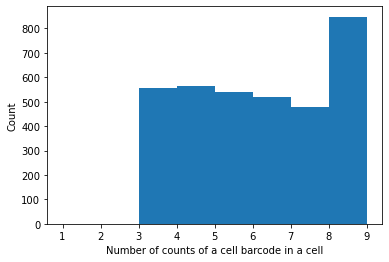

In [24]:
# plot num reads per barcode per cell
ls = []
for x in bc['Barcodes']:
    ls += list(x.values())
plt.hist(ls, bins=range(1, 10))
plt.xlabel('Number of counts of a cell barcode in a cell')
plt.ylabel('Count')
plt.show()

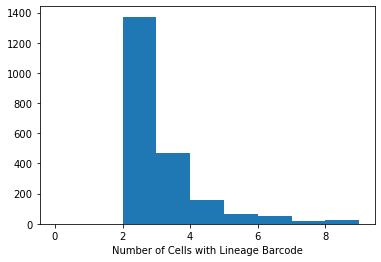

Number of Lineage Barcodes:  2194


In [32]:
# Size of Lineages
lbcs_d = {}
for i, x in enumerate(bc['Barcodes']):
    for k, v in x.items():
        if k in list(lbcs_d.keys()):
            lbcs_d[k] += 1
        else:
            lbcs_d[k] = 1
# Plot size of Lineages
plt.hist(list(lbcs_d.values()), bins=[x for x in range(10)])
plt.xlabel('Number of Cells with Lineage Barcode')
plt.show()
print('Number of Lineage Barcodes: ', len(lbcs_d))

## Try making a graph of these and visualize

In [20]:
bc = bc[[bool(x) for x in bc['Barcodes']]]

In [24]:
# How can we format this graph?
# Vertex = Cells
# Cells have an edge between them if they share a barcode, edges will be weighted by the minimum counts for a given,
# barcode that they have
# There will be multiple edges between cells if they share multiple barcodes

G = nx.MultiGraph()
set_bcs = []
for x in bc['Barcodes']:
    set_bcs += list(x.keys())
    set_bcs = list(set(set_bcs))

for i1, x in enumerate(set_bcs):
    tmp = bc[[x in list(i.keys()) for i in bc['Barcodes']]]
    tmp_index = list(tmp.index)
    for i in itertools.combinations(tmp_index, 2):
        G.add_edge(i[0], i[1],
                   weight=min(tmp['Barcodes'][i[0]][x],tmp['Barcodes'][i[1]][x]))

                         Cell Barcode  \
CATCCGTAGGTGGCTA_T1  CATCCGTAGGTGGCTA   

                                                              Barcodes  \
CATCCGTAGGTGGCTA_T1  {'ATTAAACTTTCTACCTATTCTGTTGT': 10, 'ATTTATCTAG...   

                               Assigned Barcode Timepoint  
CATCCGTAGGTGGCTA_T1  ATTAAACTTTCTACCTATTCTGTTGT        T1  
                         Cell Barcode  \
ATTATCCTCTATTCGT_T1  ATTATCCTCTATTCGT   
GGTGTCGTCCGATCGG_T1  GGTGTCGTCCGATCGG   
GAATCGTAGGTTGACG_T1  GAATCGTAGGTTGACG   

                                                              Barcodes  \
ATTATCCTCTATTCGT_T1  {'ATCGTGCTGTTTACTAGCTCTATAGT': 21, 'ATGCGTCTCG...   
GGTGTCGTCCGATCGG_T1  {'ATTTCCCTTTACACGTTCTCATAAGT': 16, 'ATGTGTCTAG...   
GAATCGTAGGTTGACG_T1  {'ATTGCTCTCGGTACCAATTCTCATGT': 40, 'ATCCTACTTC...   

                               Assigned Barcode Timepoint  
ATTATCCTCTATTCGT_T1  ATCGTGCTGTTTACTAGCTCTATAGT        T1  
GGTGTCGTCCGATCGG_T1  ATTTCCCTTTACACGTTCTCATAAGT        T1  
GAATCG

                         Cell Barcode  \
GATTCTTGTCGTGATT_T1  GATTCTTGTCGTGATT   

                                                              Barcodes  \
GATTCTTGTCGTGATT_T1  {'ATCAGTCTTGGTACAACTTCTTTTGT': 11, 'ATCAGTCTGG...   

                               Assigned Barcode Timepoint  
GATTCTTGTCGTGATT_T1  ATCAGTCTTGGTACAACTTCTTTTGT        T1  
                         Cell Barcode  \
TCAGTTTCACCCTCTA_T1  TCAGTTTCACCCTCTA   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
GGGTATTTCTCGGGAC_T1  GGGTATTTCTCGGGAC   
GTAGAAATCTGGCTGG_T1  GTAGAAATCTGGCTGG   
TGTCCACGTTGCTTGA_T1  TGTCCACGTTGCTTGA   
GGAACCCTCTCAGTCC_T1  GGAACCCTCTCAGTCC   

                                                              Barcodes  \
TCAGTTTCACCCTCTA_T1  {'ATTGTTCTTTATACTAGTTCTTCCGT': 9, 'ATTGCACTATA...   
AGGTAGGTCTACTCAT_T1  {'ATGTTACTGCACACAATATCGACTGT': 190, 'ATTCTTCTT...   
GGGTATTTCTCGGGAC_T1  {'ATCTTACTTGCAACACAATCGCAAGT': 12, 'ATGTGGCTCT...   
GTAGAAATCTGGCTGG_T1  {'ATTAAGCTTCAAACTCACTCCCCTGT': 2, 'ATCCATCT

                         Cell Barcode  \
GAGGGATGTGCCGTAC_T2  GAGGGATGTGCCGTAC   
GCATGATGTTCGGTCG_T2  GCATGATGTTCGGTCG   
TGCTCCACAACTTGGT_T2  TGCTCCACAACTTGGT   
CACGTGGTCGCCTAGG_T2  CACGTGGTCGCCTAGG   
GTGGGAACAATAGTCC_T2  GTGGGAACAATAGTCC   
TAACCAGAGGGCCTCT_T2  TAACCAGAGGGCCTCT   
CTCCAACTTATCTACT_T2  CTCCAACTTATCTACT   
TACAACGCATCTTAGG_T2  TACAACGCATCTTAGG   
GATCCCTAGGATACCG_T2  GATCCCTAGGATACCG   
AGAGAATAGTCAACAA_T2  AGAGAATAGTCAACAA   
TGGATGTAGAGTCAAT_T2  TGGATGTAGAGTCAAT   
CGAAGTTAGACCAAGC_T2  CGAAGTTAGACCAAGC   
ATTATCCCAAAGGATT_T2  ATTATCCCAAAGGATT   
TTCCTCCAGGCCTAAG_T2  TTCCTCCAGGCCTAAG   
GGGACAAAGCCATTCA_T2  GGGACAAAGCCATTCA   
TAAGCCAAGCGTTAGG_T2  TAAGCCAAGCGTTAGG   
CAACGGCGTTGCGTAT_T2  CAACGGCGTTGCGTAT   
TTCCTTCAGGCCTAAG_T2  TTCCTTCAGGCCTAAG   
GCGTTTCTCCAAGAGG_T2  GCGTTTCTCCAAGAGG   
CGAGGAAAGGTAGATT_T2  CGAGGAAAGGTAGATT   
TTACTGTGTATAGAAT_T2  TTACTGTGTATAGAAT   
GAGACCCAGACAGCGT_T2  GAGACCCAGACAGCGT   
CCTGCATCAGCGTAGA_T2  CCTGCATCAGCGTAGA   
TTCTTTCAGGCCTAAG

                         Cell Barcode  \
GTGCAGCGTCACTTCC_T1  GTGCAGCGTCACTTCC   
TGAGTCATCGTCCATC_T1  TGAGTCATCGTCCATC   
GGTGTTAGTCGCTTAA_T1  GGTGTTAGTCGCTTAA   

                                                              Barcodes  \
GTGCAGCGTCACTTCC_T1  {'ATGAGGCTTGTTACGTTTTCTATTGT': 32, 'ATCTGTCTAT...   
TGAGTCATCGTCCATC_T1  {'ATTACTCTTGATACTGTTTCAGCAGT': 5, 'ATGCAGCTAGG...   
GGTGTTAGTCGCTTAA_T1  {'ATTTATCTAGTGACAATCTCAACAGT': 4, 'ATTACTCTTGA...   

                               Assigned Barcode Timepoint  
GTGCAGCGTCACTTCC_T1  ATGAGGCTTGTTACGTTTTCTATTGT        T1  
TGAGTCATCGTCCATC_T1  ATTACTCTTGATACTGTTTCAGCAGT        T1  
GGTGTTAGTCGCTTAA_T1  ATTTATCTAGTGACAATCTCAACAGT        T1  
                         Cell Barcode  \
ACGATCATCCATCTCG_T2  ACGATCATCCATCTCG   
TTGGGTATCTACGGGC_T2  TTGGGTATCTACGGGC   

                                                              Barcodes  \
ACGATCATCCATCTCG_T2  {'ATTGACCTAGTAACTGTATCAGCAGT': 19, 'ATATACCTAT...   
TTGGGTATCTACGGGC_T2  {'ATT

                         Cell Barcode  \
ATGCCTCCAGTCGGAA_T2  ATGCCTCCAGTCGGAA   
AGAAGCGTCTTCCCGA_T2  AGAAGCGTCTTCCCGA   
GACCTTCCACTGGACC_T1  GACCTTCCACTGGACC   
CCTAACCGTGTATTGC_T1  CCTAACCGTGTATTGC   
TTTCAGTGTCTTAGTG_T2  TTTCAGTGTCTTAGTG   

                                                              Barcodes  \
ATGCCTCCAGTCGGAA_T2  {'ATTATGCTGAGCACTAGATCTCATGT': 23, 'ATAAGCCTCA...   
AGAAGCGTCTTCCCGA_T2  {'ATTTCGCTAATGACCATGTCGAGGGT': 48, 'ATAGATCTCA...   
GACCTTCCACTGGACC_T1  {'ATTCCGCTCTTAACATTCTCATGTGT': 8, 'ATTGCTCTCTT...   
CCTAACCGTGTATTGC_T1  {'ATTCCGCTCTTAACATTCTCATGTGT': 7, 'ATGCCCCTAAA...   
TTTCAGTGTCTTAGTG_T2  {'ATGGCTCTCTGTACCGCTTCATATGT': 23, 'ATTTCACTAT...   

                               Assigned Barcode Timepoint  
ATGCCTCCAGTCGGAA_T2  ATTATGCTGAGCACTAGATCTCATGT        T2  
AGAAGCGTCTTCCCGA_T2  ATTTCGCTAATGACCATGTCGAGGGT        T2  
GACCTTCCACTGGACC_T1  ATTCCGCTCTTAACATTCTCATGTGT        T1  
CCTAACCGTGTATTGC_T1  ATTCCGCTCTTAACATTCTCATGTGT        T1  
TTTCAGTG

                         Cell Barcode  \
TTCATTGCACTCCACT_T1  TTCATTGCACTCCACT   
TTACAGGCAACGTAAA_T1  TTACAGGCAACGTAAA   

                                                              Barcodes  \
TTCATTGCACTCCACT_T1  {'ATGGGTCTCACTACCAAGTCAGATGT': 12, 'ATTGCTCTGT...   
TTACAGGCAACGTAAA_T1  {'ATGAGTCTAATTACTAATTCCCTCGT': 8, 'ATGGGTCTCAC...   

                               Assigned Barcode Timepoint  
TTCATTGCACTCCACT_T1  ATGGGTCTCACTACCAAGTCAGATGT        T1  
TTACAGGCAACGTAAA_T1  ATGAGTCTAATTACTAATTCCCTCGT        T1  
                         Cell Barcode  \
AACCATGCAACGATTC_T1  AACCATGCAACGATTC   
CATTCTATCCAAACCA_T1  CATTCTATCCAAACCA   
CGAAGTTCATAATGCC_T1  CGAAGTTCATAATGCC   

                                                              Barcodes  \
AACCATGCAACGATTC_T1  {'ATTACGCTCTACACAGCTTCATTGGT': 12, 'ATATCACTGT...   
CATTCTATCCAAACCA_T1  {'ATTGTACTTATCACTAAATCCGACGT': 5, 'ATTACGCTCTA...   
CGAAGTTCATAATGCC_T1  {'ATTTGTCTTCAAACTTCCTCTATCGT': 16, 'ATGCTACTCC...   

           

                         Cell Barcode  \
GACCGTGCAATGAGCG_T2  GACCGTGCAATGAGCG   
CTTCTAAGTATCGGTT_T1  CTTCTAAGTATCGGTT   
GATGCTATCAGTAGGG_T2  GATGCTATCAGTAGGG   
CAGTTCCCAATGGCAG_T2  CAGTTCCCAATGGCAG   
GGGACTCAGCAATTCC_T2  GGGACTCAGCAATTCC   
GAGTCATGTCTCGACG_T2  GAGTCATGTCTCGACG   
GCGAGAACACGCCAGT_T2  GCGAGAACACGCCAGT   
GTAATCGGTCCCTGAG_T2  GTAATCGGTCCCTGAG   
TAACGACTCTGCTCTA_T2  TAACGACTCTGCTCTA   
TAACGACTCTGCCCTA_T2  TAACGACTCTGCCCTA   
AGAGAATTCGAGAGAC_T2  AGAGAATTCGAGAGAC   
AACGTCAAGTGAGTGC_T2  AACGTCAAGTGAGTGC   
TACATTCCACAATGTC_T2  TACATTCCACAATGTC   
GATAGAAGTTGTACGC_T2  GATAGAAGTTGTACGC   
TATATCCTCTCGAGTA_T2  TATATCCTCTCGAGTA   
CAGTTAGTCGCAGAGA_T2  CAGTTAGTCGCAGAGA   
TGCATGATCACTTGTT_T2  TGCATGATCACTTGTT   
GACTGGTTCTCGCTTG_T2  GACTGGTTCTCGCTTG   

                                                              Barcodes  \
GACCGTGCAATGAGCG_T2  {'ATGGATCTAAGGACTACTTCATCCGT': 19, 'ATAGACCTCA...   
CTTCTAAGTATCGGTT_T1  {'ATGTAACTGGGAACTGGTTCAGAAGT': 2, 'ATCATACTAAC...  

                         Cell Barcode  \
TTGCTGCTCAGAGTTC_T1  TTGCTGCTCAGAGTTC   

                                                              Barcodes  \
TTGCTGCTCAGAGTTC_T1  {'ATCGATCTTGGTACGCTATCTCCCGT': 17, 'ATCATACTGT...   

                               Assigned Barcode Timepoint  
TTGCTGCTCAGAGTTC_T1  ATCGATCTTGGTACGCTATCTCCCGT        T1  
                         Cell Barcode  \
CATTTCAAGCGTGAAC_T1  CATTTCAAGCGTGAAC   
GGAACCCAGAAGTCAT_T1  GGAACCCAGAAGTCAT   

                                                              Barcodes  \
CATTTCAAGCGTGAAC_T1  {'ATGCACCTCAGTACTCAGTCCACTGT': 14, 'ATAGCCCTAC...   
GGAACCCAGAAGTCAT_T1  {'ATAGCCCTACTCACATCATCATTAGT': 5, 'ATGCACCTCAG...   

                               Assigned Barcode Timepoint  
CATTTCAAGCGTGAAC_T1  ATGCACCTCAGTACTCAGTCCACTGT        T1  
GGAACCCAGAAGTCAT_T1  ATAGCCCTACTCACATCATCATTAGT        T1  
                         Cell Barcode  \
TGTTCCGAGCCGATTT_T1  TGTTCCGAGCCGATTT   
TGCAGGCAGTGGGAAA_T1  TGCAGGCAGTGGGAAA  

                         Cell Barcode  \
CGTCAAAAGGTGCTGA_T1  CGTCAAAAGGTGCTGA   

                                                              Barcodes  \
CGTCAAAAGGTGCTGA_T1  {'ATCGTCCTGCAGACTTAATCGTGAGT': 9, 'ATAGTGCTCCC...   

                               Assigned Barcode Timepoint  
CGTCAAAAGGTGCTGA_T1  ATCGTCCTGCAGACTTAATCGTGAGT        T1  
                         Cell Barcode  \
TCTTTGATCGTACCTC_T1  TCTTTGATCGTACCTC   
GACTCTCTCAACTGGT_T1  GACTCTCTCAACTGGT   
GAAATGACATGACTGT_T1  GAAATGACATGACTGT   

                                                              Barcodes  \
TCTTTGATCGTACCTC_T1  {'ATGGAACTCCAGACAAGTTCAATTGT': 8, 'ATGAGCCTAGC...   
GACTCTCTCAACTGGT_T1  {'ATGTATCTTGAGACATCTTCTATCGT': 6, 'ATGGTTCTAGT...   
GAAATGACATGACTGT_T1  {'ATCACGCTGGTTACCATCTCGTGCGT': 18, 'ATGCGACTAG...   

                               Assigned Barcode Timepoint  
TCTTTGATCGTACCTC_T1  ATGGAACTCCAGACAAGTTCAATTGT        T1  
GACTCTCTCAACTGGT_T1  ATGTATCTTGAGACATCTTCTATCGT        T1  
GAAATG

                         Cell Barcode  \
TGTTCCGAGCCGATTT_T1  TGTTCCGAGCCGATTT   
ATTGTTCCACAGTACT_T1  ATTGTTCCACAGTACT   
AGGAAATAGTTGGAGC_T1  AGGAAATAGTTGGAGC   

                                                              Barcodes  \
TGTTCCGAGCCGATTT_T1  {'ATGTGCCTTACTACATAGTCTCACGT': 175, 'ATACTTCTT...   
ATTGTTCCACAGTACT_T1                  {'ATTCTGCTAAAAACCAGATCCGAGGT': 1}   
AGGAAATAGTTGGAGC_T1  {'ATTGATCTATCAACTGGGTCTGCTGT': 16, 'ATTACGCTTT...   

                               Assigned Barcode Timepoint  
TGTTCCGAGCCGATTT_T1  ATGTGCCTTACTACATAGTCTCACGT        T1  
ATTGTTCCACAGTACT_T1  ATTCTGCTAAAAACCAGATCCGAGGT        T1  
AGGAAATAGTTGGAGC_T1  ATTGATCTATCAACTGGGTCTGCTGT        T1  
                         Cell Barcode  \
GCAACATAGCCATTGT_T1  GCAACATAGCCATTGT   

                                                              Barcodes  \
GCAACATAGCCATTGT_T1  {'ATTCTACTGTCAACAATATCCTTAGT': 4, 'ATCCCTCTGGC...   

                               Assigned Barcode Timepoint  
GCAACA

                         Cell Barcode  \
AGCCAGCCATGCAGGA_T1  AGCCAGCCATGCAGGA   

                                                              Barcodes  \
AGCCAGCCATGCAGGA_T1  {'ATATCACTTTTTACCGGATCACTTGT': 9, 'ATGTAACTTTT...   

                               Assigned Barcode Timepoint  
AGCCAGCCATGCAGGA_T1  ATATCACTTTTTACCGGATCACTTGT        T1  
                         Cell Barcode  \
GTGCACGCACACCGCA_T2  GTGCACGCACACCGCA   
TATTGGGAGTGCAAAT_T2  TATTGGGAGTGCAAAT   
AGAGAGCCAACACGTT_T2  AGAGAGCCAACACGTT   
GTCATGATCACCGACG_T2  GTCATGATCACCGACG   
TTGACCCCATGAAGGC_T1  TTGACCCCATGAAGGC   
TATTGGGAGTGCATAT_T2  TATTGGGAGTGCATAT   
CCGAACGAGGTTCATC_T2  CCGAACGAGGTTCATC   
ATTACCTAGCGTCTGC_T2  ATTACCTAGCGTCTGC   
TATTGGGAGTGTAAAT_T2  TATTGGGAGTGTAAAT   
TCGAAGTGTGCATGAG_T1  TCGAAGTGTGCATGAG   
GTGTAACAGAAGGCTC_T2  GTGTAACAGAAGGCTC   
CATTCATTCATGTCAG_T2  CATTCATTCATGTCAG   
CAAAGAATCACTAGCA_T2  CAAAGAATCACTAGCA   
TATTGGGAGTGCAAAC_T2  TATTGGGAGTGCAAAC   
ATCCCTGCAGAATTCC_T2  ATCCCTGCAGAA

                         Cell Barcode  \
TGGTGATCATGATCTG_T1  TGGTGATCATGATCTG   
TGTTGAGCATGGAAGC_T1  TGTTGAGCATGGAAGC   
CCTGTTGGTCACTAGT_T1  CCTGTTGGTCACTAGT   

                                                              Barcodes  \
TGGTGATCATGATCTG_T1  {'ATGTCACTTTGAACTGCATCAGACGT': 9, 'ATACAGCTACT...   
TGTTGAGCATGGAAGC_T1  {'ATAAGTCTGATAACCCTTTCTCATGT': 8, 'ATTTTACTCAC...   
CCTGTTGGTCACTAGT_T1  {'ATGAGTCTTTTGACACAATCGGGTGT': 3, 'ATTCATCTCCA...   

                               Assigned Barcode Timepoint  
TGGTGATCATGATCTG_T1  ATGTCACTTTGAACTGCATCAGACGT        T1  
TGTTGAGCATGGAAGC_T1  ATAAGTCTGATAACCCTTTCTCATGT        T1  
CCTGTTGGTCACTAGT_T1  ATGAGTCTTTTGACACAATCGGGTGT        T1  
                         Cell Barcode  \
TGCGACGAGGTAGTCG_T1  TGCGACGAGGTAGTCG   
CGGTCAGAGTAACAGT_T1  CGGTCAGAGTAACAGT   
TCCTTTCTCGGACCAC_T1  TCCTTTCTCGGACCAC   

                                                              Barcodes  \
TGCGACGAGGTAGTCG_T1  {'ATATTGCTCCCGACGATATCGTGCGT': 10, 'AT

                         Cell Barcode  \
CATTCATCATCGGAGA_T1  CATTCATCATCGGAGA   
TCTCCGATCATCTACT_T1  TCTCCGATCATCTACT   
ATTCTACTCCGTGTGG_T1  ATTCTACTCCGTGTGG   
TGCGGGTCATGCCGCA_T1  TGCGGGTCATGCCGCA   

                                                              Barcodes  \
CATTCATCATCGGAGA_T1  {'ATTAACCTTGGAACGTATTCACAAGT': 21, 'ATAATGCTCG...   
TCTCCGATCATCTACT_T1  {'ATCACGCTTACTACTTCATCGAGCGT': 6, 'ATATCTCTGAT...   
ATTCTACTCCGTGTGG_T1                  {'ATATCTCTGATGACCGTCTCTAATGT': 2}   
TGCGGGTCATGCCGCA_T1  {'ATAGGTCTTGTTACGCGTTCTAGTGT': 4, 'ATATCTCTGAT...   

                               Assigned Barcode Timepoint  
CATTCATCATCGGAGA_T1  ATTAACCTTGGAACGTATTCACAAGT        T1  
TCTCCGATCATCTACT_T1  ATCACGCTTACTACTTCATCGAGCGT        T1  
ATTCTACTCCGTGTGG_T1  ATATCTCTGATGACCGTCTCTAATGT        T1  
TGCGGGTCATGCCGCA_T1  ATAGGTCTTGTTACGCGTTCTAGTGT        T1  
                         Cell Barcode  \
GGAGAACGTGTGTGGA_T2  GGAGAACGTGTGTGGA   
CCACCATAGCCGATCC_T2  CCACCATAGCCGATCC   


                         Cell Barcode  \
ATTACCTTCCTAGAGT_T1  ATTACCTTCCTAGAGT   
AAAGAACCATCGCTCT_T1  AAAGAACCATCGCTCT   

                                                              Barcodes  \
ATTACCTTCCTAGAGT_T1  {'ATATTTCTATAAACTTTATCTTCGGT': 35, 'ATGTTTCTAG...   
AAAGAACCATCGCTCT_T1  {'ATACCCCTCTCAACGCCCTCTATAGT': 13, 'ATAATACTCC...   

                               Assigned Barcode Timepoint  
ATTACCTTCCTAGAGT_T1  ATATTTCTATAAACTTTATCTTCGGT        T1  
AAAGAACCATCGCTCT_T1  ATACCCCTCTCAACGCCCTCTATAGT        T1  
                         Cell Barcode                           Barcodes  \
GTAATGCTCGTCGGGT_T1  GTAATGCTCGTCGGGT  {'ATGGTTCTAGGTACGGATTCATAAGT': 2}   

                               Assigned Barcode Timepoint  
GTAATGCTCGTCGGGT_T1  ATGGTTCTAGGTACGGATTCATAAGT        T1  
                         Cell Barcode  \
TTCACGCAGTCAGAGC_T2  TTCACGCAGTCAGAGC   
AGGTAGGTCCAATCTT_T1  AGGTAGGTCCAATCTT   
AACAAGAAGGGACACT_T1  AACAAGAAGGGACACT   
CCCAACTTCGCGTAGC_T2  CCCAACTTCGCGTAG

                         Cell Barcode                           Barcodes  \
TTTCAGTCACATGAAA_T1  TTTCAGTCACATGAAA  {'ATGGCCCTGTAAACATAATCATTTGT': 3}   

                               Assigned Barcode Timepoint  
TTTCAGTCACATGAAA_T1  ATGGCCCTGTAAACATAATCATTTGT        T1  
                         Cell Barcode  \
GTGGTTAGTGTCACAT_T1  GTGGTTAGTGTCACAT   

                                                              Barcodes  \
GTGGTTAGTGTCACAT_T1  {'ATGTATCTTGATACTCAATCCTTAGT': 157, 'ATATTTCTC...   

                               Assigned Barcode Timepoint  
GTGGTTAGTGTCACAT_T1  ATGTATCTTGATACTCAATCCTTAGT        T1  
                         Cell Barcode  \
TTCTCTCTCGGATAAA_T2  TTCTCTCTCGGATAAA   
GTCACGGGTCTCAGGC_T2  GTCACGGGTCTCAGGC   
GTTGCTCAGCATTGTC_T2  GTTGCTCAGCATTGTC   
CTAAGTGTCGTGGACC_T2  CTAAGTGTCGTGGACC   
CTGAGTGTCGTGGACC_T2  CTGAGTGTCGTGGACC   
AGTCTCCAGCATACTC_T2  AGTCTCCAGCATACTC   

                                                              Barcodes  \
TTCTCTCTCGGAT

                         Cell Barcode  \
TGATTCTCACAAATAG_T1  TGATTCTCACAAATAG   

                                                              Barcodes  \
TGATTCTCACAAATAG_T1  {'ATGTTACTATAAACGACGTCAACTGT': 113, 'ATATAGCTC...   

                               Assigned Barcode Timepoint  
TGATTCTCACAAATAG_T1  ATGTTACTATAAACGACGTCAACTGT        T1  
                         Cell Barcode  \
CCACACTAGAGTATAC_T1  CCACACTAGAGTATAC   

                                                              Barcodes  \
CCACACTAGAGTATAC_T1  {'ATTATCCTTGCAACATATTCATTGGT': 50, 'ATCATGCTGC...   

                               Assigned Barcode Timepoint  
CCACACTAGAGTATAC_T1  ATTATCCTTGCAACATATTCATTGGT        T1  
                         Cell Barcode  \
GTGTGGCTCGGCCTTT_T1  GTGTGGCTCGGCCTTT   
TCCGGGATCTAGGCAT_T1  TCCGGGATCTAGGCAT   
GGGCTACTCCACGGGT_T1  GGGCTACTCCACGGGT   

                                                              Barcodes  \
GTGTGGCTCGGCCTTT_T1  {'ATGATCCTGCGTACAAATTCGGCCGT': 10, '

                         Cell Barcode  \
GCCATGGTCGAACTCA_T1  GCCATGGTCGAACTCA   
GGAACCCGTCTGTAAC_T1  GGAACCCGTCTGTAAC   
TGCTCCAAGAAGGCTC_T1  TGCTCCAAGAAGGCTC   
ACCATTTTCGATTTCT_T1  ACCATTTTCGATTTCT   

                                                              Barcodes  \
GCCATGGTCGAACTCA_T1  {'ATTTAGCTTGCAACCGCCTCTATGGT': 9, 'ATTTTCCTAGG...   
GGAACCCGTCTGTAAC_T1  {'ATGACACTCATTACTCCCTCTTTGGT': 22, 'ATACATCTGC...   
TGCTCCAAGAAGGCTC_T1  {'ATAGATCTTTTAACCGTCTCAGAAGT': 18, 'ATACTGCTGC...   
ACCATTTTCGATTTCT_T1  {'ATGGGTCTTCCCACCGTGTCATTTGT': 4, 'ATAATTCTAAC...   

                               Assigned Barcode Timepoint  
GCCATGGTCGAACTCA_T1  ATTTAGCTTGCAACCGCCTCTATGGT        T1  
GGAACCCGTCTGTAAC_T1  ATGACACTCATTACTCCCTCTTTGGT        T1  
TGCTCCAAGAAGGCTC_T1  ATAGATCTTTTAACCGTCTCAGAAGT        T1  
ACCATTTTCGATTTCT_T1  ATGGGTCTTCCCACCGTGTCATTTGT        T1  
                         Cell Barcode  \
GCGGATCTCTGAATGC_T1  GCGGATCTCTGAATGC   
TATTGCTCATTGCCTC_T1  TATTGCTCATTGCCTC   


                         Cell Barcode  \
GAAGTAAAGCCTCAGC_T1  GAAGTAAAGCCTCAGC   
TAAGTAAAGCCTCAGC_T1  TAAGTAAAGCCTCAGC   
AAAGGTAAGACAGCTG_T1  AAAGGTAAGACAGCTG   
GTGTTAGAGGGAGGTG_T1  GTGTTAGAGGGAGGTG   

                                                              Barcodes  \
GAAGTAAAGCCTCAGC_T1  {'ATCGGCCTCGCTACGTGTTCACGTGT': 23, 'ATTCAGCTGC...   
TAAGTAAAGCCTCAGC_T1                  {'ATTCAGCTGCGCACCTGGTCATCAGT': 1}   
AAAGGTAAGACAGCTG_T1  {'ATTTCCCTAGTTACAGCGTCGTCTGT': 14, 'ATATTGCTAA...   
GTGTTAGAGGGAGGTG_T1  {'ATCGGCCTCGCTACGTGTTCACGTGT': 32, 'ATTCAGCTGC...   

                               Assigned Barcode Timepoint  
GAAGTAAAGCCTCAGC_T1  ATCGGCCTCGCTACGTGTTCACGTGT        T1  
TAAGTAAAGCCTCAGC_T1  ATTCAGCTGCGCACCTGGTCATCAGT        T1  
AAAGGTAAGACAGCTG_T1  ATTTCCCTAGTTACAGCGTCGTCTGT        T1  
GTGTTAGAGGGAGGTG_T1  ATCGGCCTCGCTACGTGTTCACGTGT        T1  
                         Cell Barcode  \
TTGTGTTCATCCTTCG_T1  TTGTGTTCATCCTTCG   

                                        

                         Cell Barcode  \
TGCGGATGTAGGCAAC_T1  TGCGGATGTAGGCAAC   
CGGTCAGCATCCTTCG_T1  CGGTCAGCATCCTTCG   

                                                              Barcodes  \
TGCGGATGTAGGCAAC_T1  {'ATCTTACTTGTAACCACCTCGTTAGT': 2, 'ATCATACTCAG...   
CGGTCAGCATCCTTCG_T1  {'ATCATACTCAGGACTACATCCAAAGT': 5, 'ATGAAACTTGT...   

                               Assigned Barcode Timepoint  
TGCGGATGTAGGCAAC_T1  ATCTTACTTGTAACCACCTCGTTAGT        T1  
CGGTCAGCATCCTTCG_T1  ATCATACTCAGGACTACATCCAAAGT        T1  
                         Cell Barcode  \
CATCAAGGTAGTCGGA_T1  CATCAAGGTAGTCGGA   
CTCACTGTCAATGCAC_T1  CTCACTGTCAATGCAC   
GCATCTCTCCTACCGT_T1  GCATCTCTCCTACCGT   
AATCACGAGATGTTGA_T1  AATCACGAGATGTTGA   
GCATCTCTCCTTCCGT_T1  GCATCTCTCCTTCCGT   
ACTACGATCCAACTAG_T1  ACTACGATCCAACTAG   

                                                              Barcodes  \
CATCAAGGTAGTCGGA_T1  {'ATTAGTCTTCTCACTGTTTCCTCTGT': 2, 'ATTGAGCTGAG...   
CTCACTGTCAATGCAC_T1  {'ATTGAGCTCGACAC

                         Cell Barcode  \
TGTTCCGAGCCGATTT_T1  TGTTCCGAGCCGATTT   
AATTTCCTCCCTCTCC_T1  AATTTCCTCCCTCTCC   
GTTGCTCGTCCGGCAT_T1  GTTGCTCGTCCGGCAT   
ATCTTCATCGTAGCCG_T1  ATCTTCATCGTAGCCG   

                                                              Barcodes  \
TGTTCCGAGCCGATTT_T1  {'ATGTGCCTTACTACATAGTCTCACGT': 175, 'ATACTTCTT...   
AATTTCCTCCCTCTCC_T1  {'ATGCAGCTCTTTACAGAATCGTTAGT': 36, 'ATTTATCTTG...   
GTTGCTCGTCCGGCAT_T1  {'ATTTTTCTCTACACGGTATCTTACGT': 9, 'ATTAGTCTTAT...   
ATCTTCATCGTAGCCG_T1  {'ATATATCTTTGAACTCTTTCGGGTGT': 4, 'ATACCGCTATC...   

                               Assigned Barcode Timepoint  
TGTTCCGAGCCGATTT_T1  ATGTGCCTTACTACATAGTCTCACGT        T1  
AATTTCCTCCCTCTCC_T1  ATGCAGCTCTTTACAGAATCGTTAGT        T1  
GTTGCTCGTCCGGCAT_T1  ATTTTTCTCTACACGGTATCTTACGT        T1  
ATCTTCATCGTAGCCG_T1  ATATATCTTTGAACTCTTTCGGGTGT        T1  
                         Cell Barcode  \
TTCACGCGTCAAGCCC_T1  TTCACGCGTCAAGCCC   
CTCCCAAAGGTATCTC_T1  CTCCCAAAGGTATCTC   


                         Cell Barcode  \
GGCTGTGTCCTACACC_T1  GGCTGTGTCCTACACC   
TGGTAGTGTTCCGGTG_T1  TGGTAGTGTTCCGGTG   

                                                              Barcodes  \
GGCTGTGTCCTACACC_T1  {'ATAAGGCTAATGACCTCGTCGTCAGT': 8, 'ATAGTTCTGTT...   
TGGTAGTGTTCCGGTG_T1  {'ATGTATCTTTTAACCTCGTCTTTCGT': 9, 'ATTCGGCTTCG...   

                               Assigned Barcode Timepoint  
GGCTGTGTCCTACACC_T1  ATAAGGCTAATGACCTCGTCGTCAGT        T1  
TGGTAGTGTTCCGGTG_T1  ATGTATCTTTTAACCTCGTCTTTCGT        T1  
                         Cell Barcode  \
CTCCTTTAGAGGTCGT_T1  CTCCTTTAGAGGTCGT   

                                                              Barcodes  \
CTCCTTTAGAGGTCGT_T1  {'ATTCGGCTTTTAACTTTGTCGCTGGT': 8, 'ATGAGTCTAGT...   

                               Assigned Barcode Timepoint  
CTCCTTTAGAGGTCGT_T1  ATTCGGCTTTTAACTTTGTCGCTGGT        T1  
                         Cell Barcode  \
AAGGAATCATTGTAGC_T1  AAGGAATCATTGTAGC   

                                      

                         Cell Barcode  \
TAGAGTCTCGATAACC_T1  TAGAGTCTCGATAACC   
TGACCCTGTGCAAGGC_T1  TGACCCTGTGCAAGGC   
GCCTGTTGTATACGGG_T1  GCCTGTTGTATACGGG   
ATCCATTTCGACTCCT_T1  ATCCATTTCGACTCCT   
TAGGTTGAGTTCATCG_T1  TAGGTTGAGTTCATCG   
ATCCCTTTCGACTCCT_T1  ATCCCTTTCGACTCCT   

                                                              Barcodes  \
TAGAGTCTCGATAACC_T1  {'ATTATACTCTGTACGTGCTCCCGTGT': 5, 'ATTCACCTCTC...   
TGACCCTGTGCAAGGC_T1                  {'ATTCAGCTCCCCACTTCCTCGTGTGT': 1}   
GCCTGTTGTATACGGG_T1  {'ATCCTACTCTATACGTTATCAGGGGT': 35, 'ATCTGCCTTG...   
ATCCATTTCGACTCCT_T1  {'ATGGGTCTAATGACTACCTCTACCGT': 46, 'ATTCAGCTCC...   
TAGGTTGAGTTCATCG_T1  {'ATTCAGCTCCCCACTTCCTCGTGTGT': 1, 'ATCTAACTAGG...   
ATCCCTTTCGACTCCT_T1                  {'ATTCAGCTCCCCACTTCCTCGTGTGT': 1}   

                               Assigned Barcode Timepoint  
TAGAGTCTCGATAACC_T1  ATTATACTCTGTACGTGCTCCCGTGT        T1  
TGACCCTGTGCAAGGC_T1  ATTCAGCTCCCCACTTCCTCGTGTGT        T1  
GCCTGTTGTATAC

                         Cell Barcode  \
TAATCTCGTCGCTCGA_T1  TAATCTCGTCGCTCGA   

                                                              Barcodes  \
TAATCTCGTCGCTCGA_T1  {'ATTTAACTTTAAACCCTTTCGTATGT': 13, 'ATTATACTAT...   

                               Assigned Barcode Timepoint  
TAATCTCGTCGCTCGA_T1  ATTTAACTTTAAACCCTTTCGTATGT        T1  
                         Cell Barcode  \
GTGCTGGTCTAAACGC_T1  GTGCTGGTCTAAACGC   

                                                              Barcodes  \
GTGCTGGTCTAAACGC_T1  {'ATGTTGCTTATGACAGGTTCGTATGT': 8, 'ATAGGCCTACT...   

                               Assigned Barcode Timepoint  
GTGCTGGTCTAAACGC_T1  ATGTTGCTTATGACAGGTTCGTATGT        T1  
                         Cell Barcode  \
TCAGGTATCCGAAATC_T1  TCAGGTATCCGAAATC   
TAGGTACCATCTGGGC_T1  TAGGTACCATCTGGGC   

                                                              Barcodes  \
TCAGGTATCCGAAATC_T1  {'ATTTCACTCCTTACATCCTCAGTGGT': 36, 'ATCTGTCTTG...   
TAGGTACCATCTGGGC_T1  {'A

                         Cell Barcode  \
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
CGAGTTAAGGTAATCA_T1  CGAGTTAAGGTAATCA   

                                                              Barcodes  \
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
CGAGTTAAGGTAATCA_T1  {'ATGGGTCTTGGCACCCGTTCATATGT': 5, 'ATGGACCTTCG...   

                               Assigned Barcode Timepoint  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
CGAGTTAAGGTAATCA_T1  ATGGGTCTTGGCACCCGTTCATATGT        T1  
                         Cell Barcode  \
TTTACCAAGTCTACCA_T1  TTTACCAAGTCTACCA   
GAGGCAAAGGCGTTGA_T1  GAGGCAAAGGCGTTGA   

                                                              Barcodes  \
TTTACCAAGTCTACCA_T1  {'ATACACCTTCAGACAAACTCCGTTGT': 9, 'ATTTGTCTAGG...   
GAGGCAAAGGCGTTGA_T1  {'ATACTTCTTATTACTAGTTCGGAGGT': 6, 'ATAATCCTAAA...   

                               Assigned Barcode Timepoint  
TTTACCAAGTCTACCA_T1  ATACACCTTCAGACAAACTCCGTTGT        T1  
GAGGCA

                         Cell Barcode  \
ATTCCTATCTATCGCC_T1  ATTCCTATCTATCGCC   

                                                              Barcodes  \
ATTCCTATCTATCGCC_T1  {'ATTGACCTATTAACTGGATCATACGT': 5, 'ATTAATCTTGT...   

                               Assigned Barcode Timepoint  
ATTCCTATCTATCGCC_T1  ATTGACCTATTAACTGGATCATACGT        T1  
                         Cell Barcode  \
TCAGGGCAGTTTGGCT_T1  TCAGGGCAGTTTGGCT   

                                                              Barcodes  \
TCAGGGCAGTTTGGCT_T1  {'ATTACACTGTATACCCTATCATGGGT': 35, 'ATCCAACTCT...   

                               Assigned Barcode Timepoint  
TCAGGGCAGTTTGGCT_T1  ATTACACTGTATACCCTATCATGGGT        T1  
                         Cell Barcode  \
GGAACCCGTCTGTAAC_T1  GGAACCCGTCTGTAAC   
ATTTCACCACCGTGAC_T1  ATTTCACCACCGTGAC   

                                                              Barcodes  \
GGAACCCGTCTGTAAC_T1  {'ATGACACTCATTACTCCCTCTTTGGT': 22, 'ATACATCTGC...   
ATTTCACCACCGTGAC_T1  {'A

                         Cell Barcode  \
GTACAGTAGATGTAGT_T1  GTACAGTAGATGTAGT   
CAACAACTCTCAGTCC_T1  CAACAACTCTCAGTCC   
AGTTCGAGTATTAAGG_T1  AGTTCGAGTATTAAGG   
GAATAGATCGAGCTGC_T1  GAATAGATCGAGCTGC   
CAGGTATGTGATGGCA_T1  CAGGTATGTGATGGCA   
ACCTACCAGCGAAACA_T1  ACCTACCAGCGAAACA   
AACCACACATGGCGCT_T1  AACCACACATGGCGCT   
TCATACTTCTAGCCAA_T1  TCATACTTCTAGCCAA   

                                                              Barcodes  \
GTACAGTAGATGTAGT_T1  {'ATGAAGCTTTTAACGATTTCCTACGT': 8, 'ATTTAACTGTG...   
CAACAACTCTCAGTCC_T1  {'ATGCAACTATGGACTATTTCATCCGT': 12, 'ATCACGCTTG...   
AGTTCGAGTATTAAGG_T1  {'ATTTGCCTTTCAACTTTGTCGAATGT': 15, 'ATGCATCTGG...   
GAATAGATCGAGCTGC_T1  {'ATTGAACTACTAACGTCCTCTTTTGT': 75, 'ATGTTCCTGT...   
CAGGTATGTGATGGCA_T1  {'ATGCATCTCATTACGAGATCGTTTGT': 11, 'ATGCGACTAA...   
ACCTACCAGCGAAACA_T1                  {'ATCTTGCTTTGGACTAGATCTTCAGT': 1}   
AACCACACATGGCGCT_T1  {'ATCCTACTTATTACTTCATCCATGGT': 37, 'ATTATTCTAC...   
TCATACTTCTAGCCAA_T1  {'ATCTTGCTTCGAACA

                         Cell Barcode  \
TCATTCACATGACACT_T2  TCATTCACATGACACT   
GACTCAACACTTCTCG_T2  GACTCAACACTTCTCG   
GTGTGATTCTCTGCTG_T2  GTGTGATTCTCTGCTG   
TGTGATGTCCGGCTTT_T1  TGTGATGTCCGGCTTT   
GAACACTAGTGGACTG_T2  GAACACTAGTGGACTG   
GCACGTGGTTTACACG_T2  GCACGTGGTTTACACG   
TTACGCCCAGGTCCGT_T2  TTACGCCCAGGTCCGT   
AAAGGTAGTGTCCTTG_T2  AAAGGTAGTGTCCTTG   
GTTATGGAGGTATAGT_T2  GTTATGGAGGTATAGT   
CGTGATGTCCGGCTTT_T1  CGTGATGTCCGGCTTT   
CAGAGCCAGTGATGGC_T2  CAGAGCCAGTGATGGC   
ACTATCTTCCACCCTA_T2  ACTATCTTCCACCCTA   

                                                              Barcodes  \
TCATTCACATGACACT_T2  {'ATGAGTCTATTAACTGCATCACTTGT': 18, 'ATGTTACTAG...   
GACTCAACACTTCTCG_T2  {'ATAGACCTCATGACTCACTCTAAAGT': 33, 'ATTGTCCTTG...   
GTGTGATTCTCTGCTG_T2  {'ATCTGCCTGAGCACTTTTTCGATTGT': 29, 'ATCATTCTTG...   
TGTGATGTCCGGCTTT_T1  {'ATTAATCTGCCAACTATCTCTGAGGT': 5, 'ATTGCCCTCGA...   
GAACACTAGTGGACTG_T2  {'ATGAGTCTTGGAACTGTCTCATGTGT': 34, 'ATGATTCTGT...   
GCACGTGGTTTACACG_T2  {

                         Cell Barcode  \
GAATAGATCGAGCTGC_T1  GAATAGATCGAGCTGC   

                                                              Barcodes  \
GAATAGATCGAGCTGC_T1  {'ATTGAACTACTAACGTCCTCTTTTGT': 75, 'ATGTTCCTGT...   

                               Assigned Barcode Timepoint  
GAATAGATCGAGCTGC_T1  ATTGAACTACTAACGTCCTCTTTTGT        T1  
                         Cell Barcode  \
TTACAGGCACCCTGCT_T2  TTACAGGCACCCTGCT   
TCATTACCATCCTGTC_T2  TCATTACCATCCTGTC   
TTTCGATTCAACTTTC_T2  TTTCGATTCAACTTTC   
TTACAGGCACCCTGTT_T2  TTACAGGCACCCTGTT   
TGGAGGAGTTCTGAGT_T2  TGGAGGAGTTCTGAGT   
TTCTTGAGTGCACATT_T2  TTCTTGAGTGCACATT   

                                                              Barcodes  \
TTACAGGCACCCTGCT_T2                  {'ATACTACTGGCTACTCTTTCTATAGT': 1}   
TCATTACCATCCTGTC_T2  {'ATCGGGCTCGGGACGGTCTCAGACGT': 33, 'ATTGGGCTTT...   
TTTCGATTCAACTTTC_T2  {'ATAGCGCTAGGAACTCAGTCCTCCGT': 10, 'ATACTACTGG...   
TTACAGGCACCCTGTT_T2  {'ATCGGTCTGAACACAGTATCGTCCGT': 16, 'ATACTAC

                         Cell Barcode  \
GGTGATTCACCGTGCA_T1  GGTGATTCACCGTGCA   
CATCCGTGTAAGACCG_T1  CATCCGTGTAAGACCG   
ATAGAGACATTAGGCT_T1  ATAGAGACATTAGGCT   

                                                              Barcodes  \
GGTGATTCACCGTGCA_T1  {'ATGCATCTGCTAACATTATCTGTGGT': 8, 'ATGTTCCTCTA...   
CATCCGTGTAAGACCG_T1  {'ATAGGTCTTGCTACTATATCACTAGT': 5, 'ATCGCTCTCGC...   
ATAGAGACATTAGGCT_T1  {'ATCGCTCTCGCGACCCAATCCAGTGT': 4, 'ATAGGTCTTGC...   

                               Assigned Barcode Timepoint  
GGTGATTCACCGTGCA_T1  ATGCATCTGCTAACATTATCTGTGGT        T1  
CATCCGTGTAAGACCG_T1  ATAGGTCTTGCTACTATATCACTAGT        T1  
ATAGAGACATTAGGCT_T1  ATCGCTCTCGCGACCCAATCCAGTGT        T1  
                         Cell Barcode                           Barcodes  \
CCCTAACCAAGAGATT_T2  CCCTAACCAAGAGATT  {'ATGCTTCTCGGAACCTTTTCGTAGGT': 2}   

                               Assigned Barcode Timepoint  
CCCTAACCAAGAGATT_T2  ATGCTTCTCGGAACCTTTTCGTAGGT        T2  
                         

                         Cell Barcode  \
GCTACCTGTGGCTTAT_T1  GCTACCTGTGGCTTAT   
GAATAGATCGAGCTGC_T1  GAATAGATCGAGCTGC   
GAATAGATCGAGTTGC_T1  GAATAGATCGAGTTGC   

                                                              Barcodes  \
GCTACCTGTGGCTTAT_T1  {'ATACGTCTTTCGACTCCGTCTGGTGT': 4, 'ATCATCCTCAC...   
GAATAGATCGAGCTGC_T1  {'ATTGAACTACTAACGTCCTCTTTTGT': 75, 'ATGTTCCTGT...   
GAATAGATCGAGTTGC_T1  {'ATATATCTGGTAACAACCTCCTCGGT': 1, 'ATATAGCTATC...   

                               Assigned Barcode Timepoint  
GCTACCTGTGGCTTAT_T1  ATACGTCTTTCGACTCCGTCTGGTGT        T1  
GAATAGATCGAGCTGC_T1  ATTGAACTACTAACGTCCTCTTTTGT        T1  
GAATAGATCGAGTTGC_T1  ATATATCTGGTAACAACCTCCTCGGT        T1  
                         Cell Barcode  \
ATCTCTAGTGGCCCAT_T1  ATCTCTAGTGGCCCAT   

                                                              Barcodes  \
ATCTCTAGTGGCCCAT_T1  {'ATAAATCTTGTAACAGACTCATAAGT': 41, 'ATTGGACTTA...   

                               Assigned Barcode Timepoint  
ATCTCT

                         Cell Barcode  \
TGTTGAGCATGGAAGC_T1  TGTTGAGCATGGAAGC   
TGTTGAGCATGGAGGC_T1  TGTTGAGCATGGAGGC   
GATGTCGCAACAGATA_T1  GATGTCGCAACAGATA   

                                                              Barcodes  \
TGTTGAGCATGGAAGC_T1  {'ATAAGTCTGATAACCCTTTCTCATGT': 8, 'ATTTTACTCAC...   
TGTTGAGCATGGAGGC_T1                  {'ATCTACCTGACGACAGGCTCAATTGT': 1}   
GATGTCGCAACAGATA_T1                  {'ATCTACCTGACGACAGGCTCAATTGT': 1}   

                               Assigned Barcode Timepoint  
TGTTGAGCATGGAAGC_T1  ATAAGTCTGATAACCCTTTCTCATGT        T1  
TGTTGAGCATGGAGGC_T1  ATCTACCTGACGACAGGCTCAATTGT        T1  
GATGTCGCAACAGATA_T1  ATCTACCTGACGACAGGCTCAATTGT        T1  
                         Cell Barcode  \
ACAAGCTGTTGGGATG_T1  ACAAGCTGTTGGGATG   
GCAAGCTGTTGGGATG_T1  GCAAGCTGTTGGGATG   
GAGTGTTGTCTTCGAA_T1  GAGTGTTGTCTTCGAA   

                                                              Barcodes  \
ACAAGCTGTTGGGATG_T1  {'ATACCGCTTGCCACTATTTCATAGGT': 17, 'AT

                         Cell Barcode  \
CTACATTTCAGGTGTT_T1  CTACATTTCAGGTGTT   

                                                              Barcodes  \
CTACATTTCAGGTGTT_T1  {'ATTACACTGTATACCCTATCATGGGT': 75, 'ATTTAGCTAT...   

                               Assigned Barcode Timepoint  
CTACATTTCAGGTGTT_T1  ATTACACTGTATACCCTATCATGGGT        T1  
                         Cell Barcode  \
GACCGTGAGTTGCCCG_T2  GACCGTGAGTTGCCCG   

                                                              Barcodes  \
GACCGTGAGTTGCCCG_T2  {'ATCGTGCTTTGTACACTCTCGGTTGT': 4, 'ATGATGCTAAG...   

                               Assigned Barcode Timepoint  
GACCGTGAGTTGCCCG_T2  ATCGTGCTTTGTACACTCTCGGTTGT        T2  
                         Cell Barcode  \
TCGAAGTAGGTGAGCT_T1  TCGAAGTAGGTGAGCT   
AGATCCACATCATCTT_T1  AGATCCACATCATCTT   

                                                              Barcodes  \
TCGAAGTAGGTGAGCT_T1  {'ATGAGTCTGGAAACCACGTCGAAAGT': 7, 'ATTAAACTGCT...   
AGATCCACATCATCTT_T1  {'A

                         Cell Barcode  \
TCCACGTTCCGACGGT_T1  TCCACGTTCCGACGGT   
ACGTAGTAGCCTTTGA_T1  ACGTAGTAGCCTTTGA   
GCATCTCTCCTACCGT_T1  GCATCTCTCCTACCGT   
TTGGATGGTATCGCAT_T1  TTGGATGGTATCGCAT   

                                                              Barcodes  \
TCCACGTTCCGACGGT_T1  {'ATGCTACTATCAACTTGGTCCGTAGT': 16, 'ATTAATCTCG...   
ACGTAGTAGCCTTTGA_T1  {'ATTCGTCTATATACCCAGTCCATTGT': 12, 'ATCGGACTTT...   
GCATCTCTCCTACCGT_T1  {'ATTGTTCTTCTCACGGTGTCTGGTGT': 8, 'ATGCTACTTGC...   
TTGGATGGTATCGCAT_T1  {'ATTGTACTTGCTACAGGATCAGAGGT': 75, 'ATGTCACTGG...   

                               Assigned Barcode Timepoint  
TCCACGTTCCGACGGT_T1  ATGCTACTATCAACTTGGTCCGTAGT        T1  
ACGTAGTAGCCTTTGA_T1  ATTCGTCTATATACCCAGTCCATTGT        T1  
GCATCTCTCCTACCGT_T1  ATTGTTCTTCTCACGGTGTCTGGTGT        T1  
TTGGATGGTATCGCAT_T1  ATTGTACTTGCTACAGGATCAGAGGT        T1  
                         Cell Barcode  \
CTTTCGGCACATTCTT_T2  CTTTCGGCACATTCTT   
CCTGTTGAGGTAGACC_T2  CCTGTTGAGGTAGACC   


                         Cell Barcode  \
GTGGTTAGTGTCACAT_T1  GTGGTTAGTGTCACAT   
GTCCTCACAATCCCGA_T1  GTCCTCACAATCCCGA   
GTCCTCACAATCTCGA_T1  GTCCTCACAATCTCGA   
AGCCACGCAACGGGTA_T1  AGCCACGCAACGGGTA   

                                                              Barcodes  \
GTGGTTAGTGTCACAT_T1  {'ATGTATCTTGATACTCAATCCTTAGT': 157, 'ATATTTCTC...   
GTCCTCACAATCCCGA_T1                  {'ATTGGACTCCGAACAAAATCCATAGT': 1}   
GTCCTCACAATCTCGA_T1  {'ATATAGCTATTGACGAGTTCGTTAGT': 6, 'ATGTATCTGGT...   
AGCCACGCAACGGGTA_T1  {'ATTGGACTCCGAACAAAATCCATAGT': 4, 'ATATAGCTATT...   

                               Assigned Barcode Timepoint  
GTGGTTAGTGTCACAT_T1  ATGTATCTTGATACTCAATCCTTAGT        T1  
GTCCTCACAATCCCGA_T1  ATTGGACTCCGAACAAAATCCATAGT        T1  
GTCCTCACAATCTCGA_T1  ATATAGCTATTGACGAGTTCGTTAGT        T1  
AGCCACGCAACGGGTA_T1  ATTGGACTCCGAACAAAATCCATAGT        T1  
                         Cell Barcode  \
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
ATTTCACGTTCTGACA_T1  ATTTCACGTTCTGACA   


                         Cell Barcode  \
ATGGATCCATGACGAG_T1  ATGGATCCATGACGAG   

                                                              Barcodes  \
ATGGATCCATGACGAG_T1  {'ATTGTTCTAGAAACGTTATCACTAGT': 5, 'ATTATACTTCA...   

                               Assigned Barcode Timepoint  
ATGGATCCATGACGAG_T1  ATTGTTCTAGAAACGTTATCACTAGT        T1  
                         Cell Barcode  \
TGCATCCCATTACGGT_T1  TGCATCCCATTACGGT   
TGTTCTATCGTGGCGT_T1  TGTTCTATCGTGGCGT   
ATCCATTTCGACTCCT_T1  ATCCATTTCGACTCCT   

                                                              Barcodes  \
TGCATCCCATTACGGT_T1  {'ATCTTACTGTTTACTTTTTCAACAGT': 11, 'ATATCCCTAT...   
TGTTCTATCGTGGCGT_T1  {'ATTTTCCTGCACACAACCTCAGTTGT': 24, 'ATTTCCCTTT...   
ATCCATTTCGACTCCT_T1  {'ATGGGTCTAATGACTACCTCTACCGT': 46, 'ATTCAGCTCC...   

                               Assigned Barcode Timepoint  
TGCATCCCATTACGGT_T1  ATCTTACTGTTTACTTTTTCAACAGT        T1  
TGTTCTATCGTGGCGT_T1  ATTTTCCTGCACACAACCTCAGTTGT        T1  
ATCCAT

                         Cell Barcode  \
CATGGTAAGCAATTAG_T1  CATGGTAAGCAATTAG   

                                                              Barcodes  \
CATGGTAAGCAATTAG_T1  {'ATGCATCTTTTGACGTAGTCTGAAGT': 10, 'ATATAGCTTA...   

                               Assigned Barcode Timepoint  
CATGGTAAGCAATTAG_T1  ATGCATCTTTTGACGTAGTCTGAAGT        T1  
                         Cell Barcode  \
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   
AAAGGTACATAATCCG_T1  AAAGGTACATAATCCG   

                                                              Barcodes  \
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   
AAAGGTACATAATCCG_T1  {'ATCGGACTCATTACACAGTCCGAAGT': 26, 'ATCGGTCTAC...   

                               Assigned Barcode Timepoint  
CAGTGCGTCCGTGGGT_T1  ATCGTACTTTTGACTGATTCGACCGT        T1  
AAAGGTACATAATCCG_T1  ATCGGACTCATTACACAGTCCGAAGT        T1  
                         Cell Barcode  \
TTCCAATGTGTAGCAG_T2  TTCCAATGTGTAGCAG   
TCAATCTTCCTAGCGG_T2  TCAATCTTCCTAGCGG  

                         Cell Barcode  \
TGTTCCGAGCCGATTT_T1  TGTTCCGAGCCGATTT   

                                                              Barcodes  \
TGTTCCGAGCCGATTT_T1  {'ATGTGCCTTACTACATAGTCTCACGT': 175, 'ATACTTCTT...   

                               Assigned Barcode Timepoint  
TGTTCCGAGCCGATTT_T1  ATGTGCCTTACTACATAGTCTCACGT        T1  
                         Cell Barcode  \
AATGACCAGGTACATA_T1  AATGACCAGGTACATA   
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   
TTGCTGCTCTTCCAGC_T1  TTGCTGCTCTTCCAGC   
TGTGGCGGTACGGAAT_T2  TGTGGCGGTACGGAAT   
TACCTGCCATGCAGGA_T1  TACCTGCCATGCAGGA   
TGTGGCGGTATGGAAT_T2  TGTGGCGGTATGGAAT   

                                                              Barcodes  \
AATGACCAGGTACATA_T1  {'ATCGGGCTACTCACTGACTCACTTGT': 26, 'ATAATGCTCA...   
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   
TTGCTGCTCTTCCAGC_T1  {'ATAGATCTCTAGACGTAATCTCCTGT': 11, 'ATGCTTCTAT...   
TGTGGCGGTACGGAAT_T2                  {'ATAGGGCTCTGAACATGATCTTCTG

                         Cell Barcode  \
CTTGAGAAGTCGGCAA_T1  CTTGAGAAGTCGGCAA   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
GAATCACGTAAGCTCT_T1  GAATCACGTAAGCTCT   
TTACAGGGTTGGACTT_T1  TTACAGGGTTGGACTT   
CAGGTATGTGATGGCA_T1  CAGGTATGTGATGGCA   

                                                              Barcodes  \
CTTGAGAAGTCGGCAA_T1  {'ATTAAACTCAAGACTGCGTCAGTGGT': 13, 'ATGAATCTCC...   
AGGTAGGTCTACTCAT_T1  {'ATGTTACTGCACACAATATCGACTGT': 190, 'ATTCTTCTT...   
GAATCACGTAAGCTCT_T1  {'ATTCCTCTTGCTACTCCCTCCACGGT': 11, 'ATCCTTCTCT...   
TTACAGGGTTGGACTT_T1  {'ATAACTCTTGGTACAATTTCGGTCGT': 80, 'ATTTGGCTCC...   
CAGGTATGTGATGGCA_T1  {'ATGCATCTCATTACGAGATCGTTTGT': 11, 'ATGCGACTAA...   

                               Assigned Barcode Timepoint  
CTTGAGAAGTCGGCAA_T1  ATTAAACTCAAGACTGCGTCAGTGGT        T1  
AGGTAGGTCTACTCAT_T1  ATGTTACTGCACACAATATCGACTGT        T1  
GAATCACGTAAGCTCT_T1  ATTCCTCTTGCTACTCCCTCCACGGT        T1  
TTACAGGGTTGGACTT_T1  ATAACTCTTGGTACAATTTCGGTCGT        T1  
CAGGTATG

                         Cell Barcode  \
CGAGTGCAGGCTAACG_T1  CGAGTGCAGGCTAACG   

                                                              Barcodes  \
CGAGTGCAGGCTAACG_T1  {'ATCTTCCTTCCCACACCTTCGATTGT': 7, 'ATTATGCTAGA...   

                               Assigned Barcode Timepoint  
CGAGTGCAGGCTAACG_T1  ATCTTCCTTCCCACACCTTCGATTGT        T1  
                         Cell Barcode  \
TCTCAGCTCTCTACAC_T1  TCTCAGCTCTCTACAC   
TCTCAGCTCTCTATAC_T1  TCTCAGCTCTCTATAC   
CGAATTGGTCTGTAAC_T2  CGAATTGGTCTGTAAC   
CGAATTGGTCTATAAC_T2  CGAATTGGTCTATAAC   

                                                              Barcodes  \
TCTCAGCTCTCTACAC_T1                  {'ATGATACTGCTTACAATATCTCACGT': 1}   
TCTCAGCTCTCTATAC_T1  {'ATTTATCTACACACACACTCTGACGT': 6, 'ATGATACTGCT...   
CGAATTGGTCTGTAAC_T2  {'ATGGGACTGCTCACGGTCTCGATTGT': 22, 'ATGAGGCTCC...   
CGAATTGGTCTATAAC_T2                  {'ATGATACTGCTTACAATATCTCACGT': 1}   

                               Assigned Barcode Timepoint  
TCTCAGCTCTC

                         Cell Barcode  \
AGGTAGGTCCACTCAT_T1  AGGTAGGTCCACTCAT   
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   
TCCCAGTAGTCAACAA_T1  TCCCAGTAGTCAACAA   
TGGTTAGCACCAAATC_T1  TGGTTAGCACCAAATC   

                                                              Barcodes  \
AGGTAGGTCCACTCAT_T1  {'ATTCAGCTTTTAACGACATCTTCCGT': 1, 'ATAAGCCTTTG...   
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   
TCCCAGTAGTCAACAA_T1  {'ATTGCACTTGGGACTATATCTTTAGT': 24, 'ATTGTCCTTC...   
TGGTTAGCACCAAATC_T1  {'ATCTGACTTGCAACGTCATCTTCAGT': 30, 'ATAAGTCTAT...   

                               Assigned Barcode Timepoint  
AGGTAGGTCCACTCAT_T1  ATTCAGCTTTTAACGACATCTTCCGT        T1  
CAGTGCGTCCGTGGGT_T1  ATCGTACTTTTGACTGATTCGACCGT        T1  
TCCCAGTAGTCAACAA_T1  ATTGCACTTGGGACTATATCTTTAGT        T1  
TGGTTAGCACCAAATC_T1  ATCTGACTTGCAACGTCATCTTCAGT        T1  
                         Cell Barcode  \
GTAATGCGTGGGACAT_T1  GTAATGCGTGGGACAT   

                                        

                         Cell Barcode  \
TCGAACATCCTATTGT_T1  TCGAACATCCTATTGT   

                                                              Barcodes  \
TCGAACATCCTATTGT_T1  {'ATTTCTCTAAACACATTATCTTAAGT': 11, 'ATTACGCTGA...   

                               Assigned Barcode Timepoint  
TCGAACATCCTATTGT_T1  ATTTCTCTAAACACATTATCTTAAGT        T1  
                         Cell Barcode  \
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
GGGCTACGTTAGAAAC_T1  GGGCTACGTTAGAAAC   
CAGATCAAGGGACCAT_T1  CAGATCAAGGGACCAT   

                                                              Barcodes  \
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
GGGCTACGTTAGAAAC_T1  {'ATGTAGCTTTGTACGTAATCGCTCGT': 6, 'ATACTACTACA...   
CAGATCAAGGGACCAT_T1  {'ATCATTCTCCAAACGTCTTCTCTGGT': 4, 'ATAAAGCTTTT...   

                               Assigned Barcode Timepoint  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
GGGCTACGTTAGAAAC_T1  ATGTAGCTTTGTACGTAATCGCTCGT        T1  
CAGATC

                         Cell Barcode  \
GGTAACTTCGTCGACG_T1  GGTAACTTCGTCGACG   
ATCGGATAGCAGTACG_T1  ATCGGATAGCAGTACG   

                                                              Barcodes  \
GGTAACTTCGTCGACG_T1  {'ATTGCGCTACTGACACACTCACCGGT': 11, 'ATATTGCTTA...   
ATCGGATAGCAGTACG_T1  {'ATGTAGCTAGGAACCCAATCTGAAGT': 3, 'ATTGGCCTCGG...   

                               Assigned Barcode Timepoint  
GGTAACTTCGTCGACG_T1  ATTGCGCTACTGACACACTCACCGGT        T1  
ATCGGATAGCAGTACG_T1  ATGTAGCTAGGAACCCAATCTGAAGT        T1  
                         Cell Barcode  \
TCTGGCTAGGTCGAGT_T1  TCTGGCTAGGTCGAGT   

                                                              Barcodes  \
TCTGGCTAGGTCGAGT_T1  {'ATTTCCCTGGCTACTGCATCACAGGT': 8, 'ATAATTCTCTC...   

                               Assigned Barcode Timepoint  
TCTGGCTAGGTCGAGT_T1  ATTTCCCTGGCTACTGCATCACAGGT        T1  
                         Cell Barcode  \
TAGGAGGAGAAACACT_T1  TAGGAGGAGAAACACT   

                                      

                         Cell Barcode  \
ACCCAAACAAAGGCAC_T1  ACCCAAACAAAGGCAC   
TGCTCCAGTACTCCGG_T1  TGCTCCAGTACTCCGG   
CAGATACAGTAGGGTC_T1  CAGATACAGTAGGGTC   
TCTTTGACAAGACCTT_T1  TCTTTGACAAGACCTT   

                                                              Barcodes  \
ACCCAAACAAAGGCAC_T1  {'ATATCACTCGTCACAATATCCTGGGT': 22, 'ATTCAACTAA...   
TGCTCCAGTACTCCGG_T1  {'ATCACGCTTGTCACTTTGTCCAGCGT': 23, 'ATTTAACTAC...   
CAGATACAGTAGGGTC_T1  {'ATTTAACTACTGACGCACTCCAAGGT': 8, 'ATGTACCTAAA...   
TCTTTGACAAGACCTT_T1  {'ATTCAGCTCATAACCTTGTCTTCGGT': 6, 'ATAAATCTGAT...   

                               Assigned Barcode Timepoint  
ACCCAAACAAAGGCAC_T1  ATATCACTCGTCACAATATCCTGGGT        T1  
TGCTCCAGTACTCCGG_T1  ATCACGCTTGTCACTTTGTCCAGCGT        T1  
CAGATACAGTAGGGTC_T1  ATTTAACTACTGACGCACTCCAAGGT        T1  
TCTTTGACAAGACCTT_T1  ATTCAGCTCATAACCTTGTCTTCGGT        T1  
                         Cell Barcode  \
CTCCTTTCAAACCATC_T2  CTCCTTTCAAACCATC   
TTCATGTGTTAGAGAT_T2  TTCATGTGTTAGAGAT   


                         Cell Barcode  \
CTGTGGGTCACATACG_T2  CTGTGGGTCACATACG   
AGATAGAAGTCATTGC_T2  AGATAGAAGTCATTGC   
ATTCCCGTCTCGTGAA_T2  ATTCCCGTCTCGTGAA   
TCAATCTTCCTAGCGG_T2  TCAATCTTCCTAGCGG   
CATGCTCAGGTAGATT_T2  CATGCTCAGGTAGATT   
GAACTGTTCTGAGCAT_T2  GAACTGTTCTGAGCAT   
ATTCACTGTAAGCGGT_T2  ATTCACTGTAAGCGGT   
GGGTCACAGCGACTTT_T2  GGGTCACAGCGACTTT   
TTGGGCGGTAACAGTA_T2  TTGGGCGGTAACAGTA   
GCAGCCACACGACGAA_T2  GCAGCCACACGACGAA   
AGGGCTCCACTTGGGC_T2  AGGGCTCCACTTGGGC   
TCACAGCTCTAGCAAC_T2  TCACAGCTCTAGCAAC   
TTCCGTGCAGCTGAGA_T2  TTCCGTGCAGCTGAGA   
GTAGAAACATCTAGAC_T2  GTAGAAACATCTAGAC   
GGTCTGGTCACAATGC_T2  GGTCTGGTCACAATGC   
CCTCACGAGAGTTCGG_T2  CCTCACGAGAGTTCGG   
TTCGATTTCTGTGCTC_T2  TTCGATTTCTGTGCTC   
TTTATGCCATCGCTGG_T2  TTTATGCCATCGCTGG   
ATTGTTCCAACGCATT_T2  ATTGTTCCAACGCATT   
GAAGGACCATGGAATT_T2  GAAGGACCATGGAATT   
CATCAAGTCCGCACGA_T2  CATCAAGTCCGCACGA   
CGGGCATAGATTGACA_T2  CGGGCATAGATTGACA   
TTGGGTAAGGGAGGAC_T2  TTGGGTAAGGGAGGAC   
TTGTTCAGTCATCAGT

                         Cell Barcode  \
AAGTACCGCACGTACT_T1  AAGTACCGCACGTACT   
AAGTACCGTACGTACT_T1  AAGTACCGTACGTACT   
CGGGTCAAGTCTGGAG_T1  CGGGTCAAGTCTGGAG   
GGTTCTCGTGCCGAAA_T1  GGTTCTCGTGCCGAAA   
CCTTGTGGTCTAGGCC_T1  CCTTGTGGTCTAGGCC   

                                                              Barcodes  \
AAGTACCGCACGTACT_T1                  {'ATATACCTTCAGACTTGTTCACGAGT': 1}   
AAGTACCGTACGTACT_T1  {'ATATACCTTCAGACTTGTTCACGAGT': 22, 'ATACCTCTTA...   
CGGGTCAAGTCTGGAG_T1  {'ATACCTCTTAAGACGGGTTCGCTGGT': 16, 'ATACCTCTTA...   
GGTTCTCGTGCCGAAA_T1  {'ATTCCACTACCTACGGTATCGCGCGT': 1, 'ATATACCTTCA...   
CCTTGTGGTCTAGGCC_T1  {'ATTGCCCTGGTAACGCATTCTCTTGT': 10, 'ATTTATCTTC...   

                               Assigned Barcode Timepoint  
AAGTACCGCACGTACT_T1  ATATACCTTCAGACTTGTTCACGAGT        T1  
AAGTACCGTACGTACT_T1  ATATACCTTCAGACTTGTTCACGAGT        T1  
CGGGTCAAGTCTGGAG_T1  ATACCTCTTAAGACGGGTTCGCTGGT        T1  
GGTTCTCGTGCCGAAA_T1  ATTCCACTACCTACGGTATCGCGCGT        T1  
CCTTGTGG

                         Cell Barcode  \
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
CAGTGCGCCCGTGGGT_T1  CAGTGCGCCCGTGGGT   
TGGGATTAGCACCCAC_T1  TGGGATTAGCACCCAC   
CAGTGTGTCCGTGGGT_T1  CAGTGTGTCCGTGGGT   

                                                              Barcodes  \
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   
AGGTAGGTCTACTCAT_T1  {'ATGTTACTGCACACAATATCGACTGT': 190, 'ATTCTTCTT...   
CAGTGCGCCCGTGGGT_T1  {'ATCCATCTGAAAACTTAATCAGCCGT': 2, 'ATTATTCTGAT...   
TGGGATTAGCACCCAC_T1  {'ATAAGGCTGGAAACTCGGTCCCTCGT': 10, 'ATCGGACTGT...   
CAGTGTGTCCGTGGGT_T1  {'ATTAAGCTTCAAACATTCTCCACGGT': 4, 'ATCTAGCTCGG...   

                               Assigned Barcode Timepoint  
CAGTGCGTCCGTGGGT_T1  ATCGTACTTTTGACTGATTCGACCGT        T1  
AGGTAGGTCTACTCAT_T1  ATGTTACTGCACACAATATCGACTGT        T1  
CAGTGCGCCCGTGGGT_T1  ATCCATCTGAAAACTTAATCAGCCGT        T1  
TGGGATTAGCACCCAC_T1  ATAAGGCTGGAAACTCGGTCCCTCGT        T1  
CAGTGTGT

                         Cell Barcode  \
TTGGTTTTCGCGGAGA_T1  TTGGTTTTCGCGGAGA   
CATGCAATCAGAATAG_T1  CATGCAATCAGAATAG   
TTACAGGCAACGTAAA_T1  TTACAGGCAACGTAAA   

                                                              Barcodes  \
TTGGTTTTCGCGGAGA_T1                  {'ATGGTGCTTAGTACTAAGTCTTGTGT': 1}   
CATGCAATCAGAATAG_T1  {'ATAACGCTCTTTACAATTTCGATTGT': 5, 'ATAGTACTACG...   
TTACAGGCAACGTAAA_T1  {'ATGAGTCTAATTACTAATTCCCTCGT': 8, 'ATGGGTCTCAC...   

                               Assigned Barcode Timepoint  
TTGGTTTTCGCGGAGA_T1  ATGGTGCTTAGTACTAAGTCTTGTGT        T1  
CATGCAATCAGAATAG_T1  ATAACGCTCTTTACAATTTCGATTGT        T1  
TTACAGGCAACGTAAA_T1  ATGAGTCTAATTACTAATTCCCTCGT        T1  
                         Cell Barcode  \
AGTCACAAGGAGTATT_T1  AGTCACAAGGAGTATT   

                                                              Barcodes  \
AGTCACAAGGAGTATT_T1  {'ATTAACCTTATCACAGAGTCTACTGT': 6, 'ATTCTTCTGAT...   

                               Assigned Barcode Timepoint  
AGTCAC

                         Cell Barcode  \
ACCTGAAGTTTGCAGT_T1  ACCTGAAGTTTGCAGT   

                                                              Barcodes  \
ACCTGAAGTTTGCAGT_T1  {'ATGCATCTGCCAACAGGCTCTGAAGT': 10, 'ATGCCACTGG...   

                               Assigned Barcode Timepoint  
ACCTGAAGTTTGCAGT_T1  ATGCATCTGCCAACAGGCTCTGAAGT        T1  
                         Cell Barcode  \
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   

                                                              Barcodes  \
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   

                               Assigned Barcode Timepoint  
CAGTGCGTCCGTGGGT_T1  ATCGTACTTTTGACTGATTCGACCGT        T1  
                         Cell Barcode  \
AGTCAACTCTGCGTCT_T2  AGTCAACTCTGCGTCT   
CCTAACCGTCGAATTC_T2  CCTAACCGTCGAATTC   
ACGGTTAGTGAACTAA_T2  ACGGTTAGTGAACTAA   
ATTCGTTCACGGGCAA_T2  ATTCGTTCACGGGCAA   
AGGATAATCATAGACC_T2  AGGATAATCATAGACC   
ATGGAGGGTCCTCATC_T2  ATGGAGGGTCCTCATC   
CTTGAGAGT

                         Cell Barcode  \
GACTGATGTCGATTAC_T1  GACTGATGTCGATTAC   
AAACGCTGTTGTACGT_T1  AAACGCTGTTGTACGT   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
TGGTACATCACGGACC_T1  TGGTACATCACGGACC   
TCTGGCTGTCCGGACT_T1  TCTGGCTGTCCGGACT   
CTACGGGAGCATTGTC_T1  CTACGGGAGCATTGTC   
AGCGTATAGCACTAAA_T1  AGCGTATAGCACTAAA   

                                                              Barcodes  \
GACTGATGTCGATTAC_T1  {'ATAGATCTGTTTACATTTTCTTACGT': 1, 'ATAAATCTTAC...   
AAACGCTGTTGTACGT_T1  {'ATAAATCTGATCACATAGTCTGACGT': 40, 'ATATTTCTGG...   
AGGTAGGTCTACTCAT_T1  {'ATGTTACTGCACACAATATCGACTGT': 190, 'ATTCTTCTT...   
TGGTACATCACGGACC_T1  {'ATCTGTCTGTACACGAGATCTTATGT': 8, 'ATGGATCTGGC...   
TCTGGCTGTCCGGACT_T1  {'ATTTGACTTGGCACACCATCATTTGT': 15, 'ATCGGACTTT...   
CTACGGGAGCATTGTC_T1  {'ATAATTCTGGCAACCTCATCACTGGT': 185, 'ATGAGACTT...   
AGCGTATAGCACTAAA_T1  {'ATCGTTCTATGCACTTAGTCAGGTGT': 11, 'ATCACGCTGT...   

                               Assigned Barcode Timepoint  
GACTGATGTCGATTAC_T

                         Cell Barcode  \
AGGTCTATCTAGGCAT_T1  AGGTCTATCTAGGCAT   

                                                              Barcodes  \
AGGTCTATCTAGGCAT_T1  {'ATTGAACTAGGCACCTTTTCTTTCGT': 6, 'ATTCGGCTACA...   

                               Assigned Barcode Timepoint  
AGGTCTATCTAGGCAT_T1  ATTGAACTAGGCACCTTTTCTTTCGT        T1  
                         Cell Barcode  \
CTATCCGCAAGTGGCA_T2  CTATCCGCAAGTGGCA   
TTGGGTATCTACGGGC_T2  TTGGGTATCTACGGGC   
ATCAGGTCATTGCTGA_T2  ATCAGGTCATTGCTGA   

                                                              Barcodes  \
CTATCCGCAAGTGGCA_T2  {'ATTATCCTAGTAACAGTGTCACTAGT': 14, 'ATAGCTCTGT...   
TTGGGTATCTACGGGC_T2  {'ATTTTGCTTATTACGCTGTCTTTTGT': 57, 'ATCAGTCTGT...   
ATCAGGTCATTGCTGA_T2  {'ATCAGTCTGTGGACGTACTCTCAAGT': 17, 'ATCGTTCTAA...   

                               Assigned Barcode Timepoint  
CTATCCGCAAGTGGCA_T2  ATTATCCTAGTAACAGTGTCACTAGT        T2  
TTGGGTATCTACGGGC_T2  ATTTTGCTTATTACGCTGTCTTTTGT        T2  
ATCAGG

                         Cell Barcode  \
TGTTGGAGTATGGTAA_T1  TGTTGGAGTATGGTAA   
TGTTGGGGTATGGTAA_T1  TGTTGGGGTATGGTAA   

                                                              Barcodes  \
TGTTGGAGTATGGTAA_T1  {'ATCAATCTGTTAACACACTCTACAGT': 14, 'ATTTTCCTTC...   
TGTTGGGGTATGGTAA_T1                  {'ATGCAGCTTTGCACATAATCTGTAGT': 1}   

                               Assigned Barcode Timepoint  
TGTTGGAGTATGGTAA_T1  ATCAATCTGTTAACACACTCTACAGT        T1  
TGTTGGGGTATGGTAA_T1  ATGCAGCTTTGCACATAATCTGTAGT        T1  
                         Cell Barcode  \
TTGGGTAGTGAGCGAC_T2  TTGGGTAGTGAGCGAC   
GCGGAAAGTACGGGAT_T2  GCGGAAAGTACGGGAT   
TTGGGTAGTGAGCGAT_T2  TTGGGTAGTGAGCGAT   
GAGACCCCACCATATG_T2  GAGACCCCACCATATG   
AGGTAGGTCAACCGAT_T2  AGGTAGGTCAACCGAT   
CTCAATTGTACACGCC_T2  CTCAATTGTACACGCC   

                                                              Barcodes  \
TTGGGTAGTGAGCGAC_T2                  {'ATCGTCCTTATCACGATCTCATGGGT': 1}   
GCGGAAAGTACGGGAT_T2  {'ATATTACTAAACAC

                         Cell Barcode  \
AGGGTGACACAGGGTG_T1  AGGGTGACACAGGGTG   
AGGGTGACACAGGATG_T1  AGGGTGACACAGGATG   
CTTCGGTGTAACGGTG_T1  CTTCGGTGTAACGGTG   

                                                              Barcodes  \
AGGGTGACACAGGGTG_T1                  {'ATCATACTTTATACATATTCAAAAGT': 1}   
AGGGTGACACAGGATG_T1  {'ATCACACTCCCTACTGACTCTACTGT': 22, 'ATCTGCCTAT...   
CTTCGGTGTAACGGTG_T1  {'ATAAGTCTACGAACTTAATCTGGAGT': 52, 'ATCGTCCTCA...   

                               Assigned Barcode Timepoint  
AGGGTGACACAGGGTG_T1  ATCATACTTTATACATATTCAAAAGT        T1  
AGGGTGACACAGGATG_T1  ATCACACTCCCTACTGACTCTACTGT        T1  
CTTCGGTGTAACGGTG_T1  ATAAGTCTACGAACTTAATCTGGAGT        T1  
                         Cell Barcode  \
ATCCACCTCTAGACAC_T2  ATCCACCTCTAGACAC   
AGTGACTAGGGATGTC_T2  AGTGACTAGGGATGTC   
ACGATCAGTTTCGTGA_T2  ACGATCAGTTTCGTGA   

                                                              Barcodes  \
ATCCACCTCTAGACAC_T2  {'ATACCTCTAAGCACATTGTCGTACGT': 2, 'ATT

                         Cell Barcode  \
ACCTACCGTAGACAGC_T1  ACCTACCGTAGACAGC   

                                                              Barcodes  \
ACCTACCGTAGACAGC_T1  {'ATGCTACTATCAACTTGGTCCGTAGT': 5, 'ATCGAGCTCGG...   

                               Assigned Barcode Timepoint  
ACCTACCGTAGACAGC_T1  ATGCTACTATCAACTTGGTCCGTAGT        T1  
                         Cell Barcode                           Barcodes  \
GAGCTGCCACTATGTG_T1  GAGCTGCCACTATGTG  {'ATGATGCTTACTACAGACTCAGACGT': 1}   

                               Assigned Barcode Timepoint  
GAGCTGCCACTATGTG_T1  ATGATGCTTACTACAGACTCAGACGT        T1  
                         Cell Barcode  \
CAGCGTGAGGAATCGC_T1  CAGCGTGAGGAATCGC   
AATCACGCATTGAGCT_T1  AATCACGCATTGAGCT   
TTCCGGTTCGCATTGA_T1  TTCCGGTTCGCATTGA   

                                                              Barcodes  \
CAGCGTGAGGAATCGC_T1  {'ATCCATCTACTTACACCATCTCGTGT': 12, 'ATGGTGCTAC...   
AATCACGCATTGAGCT_T1  {'ATCGTCCTACGGACACGCTCTGAGGT': 1, 'ATTTTG

                         Cell Barcode  \
AAAGGGCTCCGCACGA_T1  AAAGGGCTCCGCACGA   

                                                              Barcodes  \
AAAGGGCTCCGCACGA_T1  {'ATCCTCCTAGACACCTTGTCCAACGT': 8, 'ATGCACCTGAC...   

                               Assigned Barcode Timepoint  
AAAGGGCTCCGCACGA_T1  ATCCTCCTAGACACCTTGTCCAACGT        T1  
                         Cell Barcode  \
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
ACACCAACAGTGAGCA_T1  ACACCAACAGTGAGCA   
AACCAACAGCCATATC_T1  AACCAACAGCCATATC   

                                                              Barcodes  \
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
ACACCAACAGTGAGCA_T1  {'ATAGGCCTCCAAACCTAGTCGCGTGT': 8, 'ATAAGTCTTGT...   
AACCAACAGCCATATC_T1  {'ATGGCTCTTCTCACTGGTTCGTCAGT': 5, 'ATCCGTCTCCA...   

                               Assigned Barcode Timepoint  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
ACACCAACAGTGAGCA_T1  ATAGGCCTCCAAACCTAGTCGCGTGT        T1  
AACCAA

                         Cell Barcode  \
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
TGAGACTGTACTGCCG_T1  TGAGACTGTACTGCCG   
GTTGTCCCAACAAGAT_T1  GTTGTCCCAACAAGAT   
TCAGGTACACGCCAGT_T1  TCAGGTACACGCCAGT   

                                                              Barcodes  \
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
TGAGACTGTACTGCCG_T1  {'ATATCGCTTTTAACGAAATCGAGCGT': 42, 'ATGGGGCTTA...   
GTTGTCCCAACAAGAT_T1  {'ATATTACTGCTTACCAGTTCACTTGT': 3, 'ATTGGACTTGG...   
TCAGGTACACGCCAGT_T1  {'ATATGTCTCTTTACAAATTCTTTCGT': 1, 'ATTTGCCTTTA...   

                               Assigned Barcode Timepoint  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
TGAGACTGTACTGCCG_T1  ATATCGCTTTTAACGAAATCGAGCGT        T1  
GTTGTCCCAACAAGAT_T1  ATATTACTGCTTACCAGTTCACTTGT        T1  
TCAGGTACACGCCAGT_T1  ATATGTCTCTTTACAAATTCTTTCGT        T1  
                         Cell Barcode  \
AATTTCCTCCCTCTCC_T1  AATTTCCTCCCTCTCC   
TGATCTTAGGCTTAAA_T1  TGATCTTAGGCTTAAA   


                         Cell Barcode  \
TAACGACTCTAGATCG_T1  TAACGACTCTAGATCG   
GTACAACCAAGGCTTT_T1  GTACAACCAAGGCTTT   

                                                              Barcodes  \
TAACGACTCTAGATCG_T1  {'ATTCGTCTGGTTACGAGCTCGTAAGT': 12, 'ATATTTCTGC...   
GTACAACCAAGGCTTT_T1  {'ATAGGACTTTAAACCTGGTCCTTCGT': 26, 'ATCTGGCTAT...   

                               Assigned Barcode Timepoint  
TAACGACTCTAGATCG_T1  ATTCGTCTGGTTACGAGCTCGTAAGT        T1  
GTACAACCAAGGCTTT_T1  ATAGGACTTTAAACCTGGTCCTTCGT        T1  
                         Cell Barcode  \
TCTACCGTCGATGCAT_T2  TCTACCGTCGATGCAT   
TAACGACAGTACATCG_T2  TAACGACAGTACATCG   

                                                              Barcodes  \
TCTACCGTCGATGCAT_T2  {'ATTCGTCTGCACACCAGTTCGTGCGT': 9, 'ATGGGCCTGTA...   
TAACGACAGTACATCG_T2                  {'ATACGTCTGCACACCAGTTCGTGCGT': 1}   

                               Assigned Barcode Timepoint  
TCTACCGTCGATGCAT_T2  ATTCGTCTGCACACCAGTTCGTGCGT        T2  
TAACGA

                         Cell Barcode  \
TCTTAGTAGCCAGACA_T2  TCTTAGTAGCCAGACA   
TCACATTCATTGCCGG_T2  TCACATTCATTGCCGG   
TAATTCCGTCGCGGTT_T2  TAATTCCGTCGCGGTT   
CTAACTTGTCCTGTTC_T2  CTAACTTGTCCTGTTC   
AGTAGCTTCTGGTGCG_T2  AGTAGCTTCTGGTGCG   

                                                              Barcodes  \
TCTTAGTAGCCAGACA_T2  {'ATATAACTAGGCACGTCATCGAGAGT': 48, 'ATGCGCCTAC...   
TCACATTCATTGCCGG_T2  {'ATATCGCTTATTACTTAATCTTTGGT': 15, 'ATTCTCCTAA...   
TAATTCCGTCGCGGTT_T2  {'ATTGTACTTTTTACATTCTCGAATGT': 89, 'ATGAAACTCT...   
CTAACTTGTCCTGTTC_T2  {'ATTACGCTTGTAACACAATCAACTGT': 29, 'ATCAAACTCC...   
AGTAGCTTCTGGTGCG_T2  {'ATTGGTCTAAGTACTACTTCATTCGT': 9, 'ATCATGCTTAC...   

                               Assigned Barcode Timepoint  
TCTTAGTAGCCAGACA_T2  ATATAACTAGGCACGTCATCGAGAGT        T2  
TCACATTCATTGCCGG_T2  ATATCGCTTATTACTTAATCTTTGGT        T2  
TAATTCCGTCGCGGTT_T2  ATTGTACTTTTTACATTCTCGAATGT        T2  
CTAACTTGTCCTGTTC_T2  ATTACGCTTGTAACACAATCAACTGT        T2  
AGTAGCTT

                         Cell Barcode                           Barcodes  \
TTTCATTCATCCTTGC_T1  TTTCATTCATCCTTGC  {'ATGGAGCTCTACACTTACTCTATTGT': 1}   

                               Assigned Barcode Timepoint  
TTTCATTCATCCTTGC_T1  ATGGAGCTCTACACTTACTCTATTGT        T1  
                         Cell Barcode  \
CTCGAGGCAGTATACC_T1  CTCGAGGCAGTATACC   

                                                              Barcodes  \
CTCGAGGCAGTATACC_T1  {'ATTATCCTGTGAACGTTCTCTTGCGT': 38, 'ATTCTACTCC...   

                               Assigned Barcode Timepoint  
CTCGAGGCAGTATACC_T1  ATTATCCTGTGAACGTTCTCTTGCGT        T1  
                         Cell Barcode  \
TCTTAGTGTTACGGAG_T1  TCTTAGTGTTACGGAG   
CTCTCGATCGCAGAGA_T1  CTCTCGATCGCAGAGA   

                                                              Barcodes  \
TCTTAGTGTTACGGAG_T1  {'ATCCTGCTCAGAACTTGATCCCCCGT': 7, 'ATCTATCTCAA...   
CTCTCGATCGCAGAGA_T1  {'ATTATTCTTTCAACATTTTCAACAGT': 5, 'ATCTGCCTTGG...   

                            

                         Cell Barcode  \
GATAGCTCACAAGCAG_T1  GATAGCTCACAAGCAG   
TGAGCATGCTATTCCT_T1  TGAGCATGCTATTCCT   
TGAGGAGGTTAGGGAC_T1  TGAGGAGGTTAGGGAC   
TCAATCTTCAAGCCTA_T2  TCAATCTTCAAGCCTA   
AACAAAGTCCGCCTAT_T1  AACAAAGTCCGCCTAT   
CCTACGTGTTTCAGAC_T2  CCTACGTGTTTCAGAC   
GAATAGATCGAGCTGC_T1  GAATAGATCGAGCTGC   
ACAGCCGGTACTGAGG_T2  ACAGCCGGTACTGAGG   
CACTGGAAGATGGTAT_T1  CACTGGAAGATGGTAT   
GACCGTGCATTCACCC_T1  GACCGTGCATTCACCC   
AGAACCTTCGAGTCTA_T1  AGAACCTTCGAGTCTA   

                                                              Barcodes  \
GATAGCTCACAAGCAG_T1  {'ATGTTGCTACTGACATTTTCATTGGT': 3, 'ATTGGACTATC...   
TGAGCATGCTATTCCT_T1                  {'ATGTCACTACTTACAACATCTACTGT': 1}   
TGAGGAGGTTAGGGAC_T1  {'ATCGTACTTTTTACGTCTTCACGCGT': 6, 'ATTGGCCTCGG...   
TCAATCTTCAAGCCTA_T2  {'ATGCCACTAATGACATGATCTCCAGT': 8, 'ATAGGCCTTTT...   
AACAAAGTCCGCCTAT_T1  {'ATGGTACTAGGGACTCATTCATATGT': 10, 'ATAGTACTAG...   
CCTACGTGTTTCAGAC_T2  {'ATTAGGCTAGATACTCTCTCTATTGT': 43, 'ATTGCA

                         Cell Barcode  \
GATGGAGCAGTCTCTC_T1  GATGGAGCAGTCTCTC   
AGAAGCGAGTGAGCCA_T1  AGAAGCGAGTGAGCCA   

                                                              Barcodes  \
GATGGAGCAGTCTCTC_T1  {'ATTCGTCTGCATACAGCTTCCGATGT': 5, 'ATCTACCTTTA...   
AGAAGCGAGTGAGCCA_T1  {'ATGCGACTGGGTACTCGGTCCAACGT': 9, 'ATGGGCCTTAT...   

                               Assigned Barcode Timepoint  
GATGGAGCAGTCTCTC_T1  ATTCGTCTGCATACAGCTTCCGATGT        T1  
AGAAGCGAGTGAGCCA_T1  ATGCGACTGGGTACTCGGTCCAACGT        T1  
                         Cell Barcode  \
TTGATGGGTTCCATTT_T2  TTGATGGGTTCCATTT   

                                                              Barcodes  \
TTGATGGGTTCCATTT_T2  {'ATTGGACTGTTTACTGCGTCTATCGT': 11, 'ATTTGACTAA...   

                               Assigned Barcode Timepoint  
TTGATGGGTTCCATTT_T2  ATTGGACTGTTTACTGCGTCTATCGT        T2  
                         Cell Barcode  \
ACTTATCTCCTACCAC_T1  ACTTATCTCCTACCAC   

                                      

                         Cell Barcode  \
CTGGCAGGTTCAAGGG_T1  CTGGCAGGTTCAAGGG   
CGGAACCTCGCGGACT_T1  CGGAACCTCGCGGACT   

                                                              Barcodes  \
CTGGCAGGTTCAAGGG_T1  {'ATTGATCTCATTACACGTTCTTAAGT': 14, 'ATGTTACTGT...   
CGGAACCTCGCGGACT_T1  {'ATAACTCTGTAAACGAGTTCCTATGT': 8, 'ATCGAGCTGAT...   

                               Assigned Barcode Timepoint  
CTGGCAGGTTCAAGGG_T1  ATTGATCTCATTACACGTTCTTAAGT        T1  
CGGAACCTCGCGGACT_T1  ATAACTCTGTAAACGAGTTCCTATGT        T1  
                         Cell Barcode  \
GTGGTTGGTGTCACAT_T1  GTGGTTGGTGTCACAT   
GTGGTTAGTGTCACAT_T1  GTGGTTAGTGTCACAT   
CACAGATTCTTACTCG_T1  CACAGATTCTTACTCG   

                                                              Barcodes  \
GTGGTTGGTGTCACAT_T1  {'ATGAACCTTACTACATACTCTTACGT': 1, 'ATTATTCTAGC...   
GTGGTTAGTGTCACAT_T1  {'ATGTATCTTGATACTCAATCCTTAGT': 157, 'ATATTTCTC...   
CACAGATTCTTACTCG_T1                  {'ATTTAACTTATCACAACGTCTTGGGT': 1}   

           

                         Cell Barcode  \
CTGTAGAAGTAGGCCA_T1  CTGTAGAAGTAGGCCA   

                                                              Barcodes  \
CTGTAGAAGTAGGCCA_T1  {'ATAATCCTCTCGACTCAATCACTTGT': 8, 'ATTGTTCTGGT...   

                               Assigned Barcode Timepoint  
CTGTAGAAGTAGGCCA_T1  ATAATCCTCTCGACTCAATCACTTGT        T1  
                         Cell Barcode  \
GTAGAGGTCGATTTCT_T1  GTAGAGGTCGATTTCT   
GCGATCGTCCAAATGC_T1  GCGATCGTCCAAATGC   
ACTATTCAGCACCGTC_T1  ACTATTCAGCACCGTC   
TGAGCGCGTGCCGTTG_T1  TGAGCGCGTGCCGTTG   

                                                              Barcodes  \
GTAGAGGTCGATTTCT_T1  {'ATTAATCTTAGAACTAACTCATTGGT': 32, 'ATGCATCTTG...   
GCGATCGTCCAAATGC_T1  {'ATATTTCTTAATACGTAATCGCGAGT': 3, 'ATATGCCTAGA...   
ACTATTCAGCACCGTC_T1  {'ATTAATCTTAGAACTAACTCATTGGT': 71, 'ATTCACCTGC...   
TGAGCGCGTGCCGTTG_T1  {'ATAGATCTCTGGACATATTCATGGGT': 32, 'ATTTGCCTAT...   

                               Assigned Barcode Timepoint  
GTAGAGGTCGA

                         Cell Barcode  \
GTGAGCCTCAGCTAGT_T1  GTGAGCCTCAGCTAGT   

                                                              Barcodes  \
GTGAGCCTCAGCTAGT_T1  {'ATGATTCTATACACCTTATCCTGCGT': 14, 'ATACAGCTTT...   

                               Assigned Barcode Timepoint  
GTGAGCCTCAGCTAGT_T1  ATGATTCTATACACCTTATCCTGCGT        T1  
                         Cell Barcode  \
AGATGAATCCAAATGC_T2  AGATGAATCCAAATGC   
GTGTAACAGCTATCCA_T2  GTGTAACAGCTATCCA   
AGACAAAGTTGGTGTT_T2  AGACAAAGTTGGTGTT   
AGCTACAAGCAATTAG_T2  AGCTACAAGCAATTAG   
CTCATGCGTATGTCTG_T2  CTCATGCGTATGTCTG   
GACTATGAGTAAACAC_T2  GACTATGAGTAAACAC   
GAACTGTTCTGAGCAT_T2  GAACTGTTCTGAGCAT   
TGTCCTGCACATGTTG_T2  TGTCCTGCACATGTTG   
TGCTCGTAGAGCAAGA_T2  TGCTCGTAGAGCAAGA   
AGAAGCGTCTTCCCGA_T2  AGAAGCGTCTTCCCGA   
GGTAATCCACAGTCAT_T2  GGTAATCCACAGTCAT   
TTAGGCAGTAGGACCA_T2  TTAGGCAGTAGGACCA   
CACTTCGTCTTACGCT_T2  CACTTCGTCTTACGCT   
AACCTGATCTAGCCTC_T2  AACCTGATCTAGCCTC   
TTCATGTGTTAGAGAT_T2  TTCATGTGTTAG

                         Cell Barcode  \
CACTGTCTCTCGCTTG_T1  CACTGTCTCTCGCTTG   
ACTGTCCAGAGCATCG_T1  ACTGTCCAGAGCATCG   

                                                              Barcodes  \
CACTGTCTCTCGCTTG_T1  {'ATACTGCTGCGGACTGTATCAACAGT': 9, 'ATAAAGCTTTA...   
ACTGTCCAGAGCATCG_T1  {'ATTTTACTTGTGACTGTCTCTTGTGT': 9, 'ATTATACTAGC...   

                               Assigned Barcode Timepoint  
CACTGTCTCTCGCTTG_T1  ATACTGCTGCGGACTGTATCAACAGT        T1  
ACTGTCCAGAGCATCG_T1  ATTTTACTTGTGACTGTCTCTTGTGT        T1  
                         Cell Barcode  \
AACACACAGACAGCGT_T2  AACACACAGACAGCGT   

                                                              Barcodes  \
AACACACAGACAGCGT_T2  {'ATAGGGCTAGGGACCAACTCCTGCGT': 21, 'ATGGGACTCT...   

                               Assigned Barcode Timepoint  
AACACACAGACAGCGT_T2  ATAGGGCTAGGGACCAACTCCTGCGT        T2  
                         Cell Barcode  \
TAAGCCAGTGGCTTAT_T2  TAAGCCAGTGGCTTAT   
TGGAGGAGTTCTGAGT_T2  TGGAGGAGTTCTGAGT  

                         Cell Barcode  \
GAAATGAGTGGGAGAG_T1  GAAATGAGTGGGAGAG   
GAAGCGAGTTAGGAGC_T1  GAAGCGAGTTAGGAGC   

                                                              Barcodes  \
GAAATGAGTGGGAGAG_T1  {'ATTTGGCTGGTAACTAATTCTCGTGT': 3, 'ATCTTACTCGC...   
GAAGCGAGTTAGGAGC_T1  {'ATTTGGCTGGTAACTAATTCTCGTGT': 7, 'ATCTTACTCGC...   

                               Assigned Barcode Timepoint  
GAAATGAGTGGGAGAG_T1  ATTTGGCTGGTAACTAATTCTCGTGT        T1  
GAAGCGAGTTAGGAGC_T1  ATTTGGCTGGTAACTAATTCTCGTGT        T1  
                         Cell Barcode  \
TTCAATCAGAGGTTTA_T1  TTCAATCAGAGGTTTA   

                                                              Barcodes  \
TTCAATCAGAGGTTTA_T1  {'ATCCGTCTGTGGACTAATTCTTCTGT': 4, 'ATATCGCTATT...   

                               Assigned Barcode Timepoint  
TTCAATCAGAGGTTTA_T1  ATCCGTCTGTGGACTAATTCTTCTGT        T1  
                         Cell Barcode  \
CAACGATAGCTACAAA_T2  CAACGATAGCTACAAA   
CCCTTAGAGCGTTAGG_T2  CCCTTAGAGCGTTAGG  

                         Cell Barcode  \
TCAGGACGTCATAGTC_T1  TCAGGACGTCATAGTC   
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   

                                                              Barcodes  \
TCAGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 1, 'ATTGTTCTTTG...   
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   

                               Assigned Barcode Timepoint  
TCAGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
                         Cell Barcode  \
CAATGACCAGTTCCAA_T2  CAATGACCAGTTCCAA   

                                                              Barcodes  \
CAATGACCAGTTCCAA_T2  {'ATTGGGCTACAAACGTCATCTCCGGT': 18, 'ATGGTCCTCT...   

                               Assigned Barcode Timepoint  
CAATGACCAGTTCCAA_T2  ATTGGGCTACAAACGTCATCTCCGGT        T2  
                         Cell Barcode  \
AGATGAATCCAAATGC_T2  AGATGAATCCAAATGC   
CTGTACCCATCAGCTA_T2  CTGTACCCATCAGCTA  

                         Cell Barcode  \
CATCCACGTGTCTAAC_T1  CATCCACGTGTCTAAC   

                                                              Barcodes  \
CATCCACGTGTCTAAC_T1  {'ATCATGCTCTATACGATTTCACATGT': 4, 'ATTGAGCTGTG...   

                               Assigned Barcode Timepoint  
CATCCACGTGTCTAAC_T1  ATCATGCTCTATACGATTTCACATGT        T1  
                         Cell Barcode  \
ATGAGTCAGCCTCTGG_T1  ATGAGTCAGCCTCTGG   
AGGACGAAGTGGTGGT_T1  AGGACGAAGTGGTGGT   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
CGGAATTAGGCCTTGC_T1  CGGAATTAGGCCTTGC   
GATCCCTAGGATACAT_T1  GATCCCTAGGATACAT   
CATGAGTTCCTATGGA_T1  CATGAGTTCCTATGGA   
GGTCCCTAGGATACAT_T1  GGTCCCTAGGATACAT   
AAGTTCGGTTTACGTG_T1  AAGTTCGGTTTACGTG   
TGTGGCGCAGAATTCC_T1  TGTGGCGCAGAATTCC   
TGTTGGATCCCGTTGT_T1  TGTTGGATCCCGTTGT   
ATTCACTGTTCGGGTC_T1  ATTCACTGTTCGGGTC   
TTGCTGCGTATGAGCG_T1  TTGCTGCGTATGAGCG   

                                                              Barcodes  \
ATGAGTCAGCCTCTGG_T1  {'ATTGTACTATACACCTC

                         Cell Barcode  \
CTCTGGTTCGCTGATA_T1  CTCTGGTTCGCTGATA   
CCGAACGGTCTCAGGC_T2  CCGAACGGTCTCAGGC   
TTAGGGTAGTCATGCT_T2  TTAGGGTAGTCATGCT   
TATGTTCTCCTCTCTT_T1  TATGTTCTCCTCTCTT   
GGGTAGACACTCCCTA_T2  GGGTAGACACTCCCTA   
CATACTTTCATTCGGA_T1  CATACTTTCATTCGGA   

                                                              Barcodes  \
CTCTGGTTCGCTGATA_T1                  {'ATGTCCCTGACGACTATTTCATGAGT': 3}   
CCGAACGGTCTCAGGC_T2  {'ATGTCCCTGACGACTATTTCATGAGT': 7, 'ATTACTCTGTC...   
TTAGGGTAGTCATGCT_T2  {'ATTGCACTATGTACTTCTTCGCGAGT': 17, 'ATTGGCCTTT...   
TATGTTCTCCTCTCTT_T1  {'ATGTCCCTGACGACTATTTCATGAGT': 2, 'ATTCACCTTAG...   
GGGTAGACACTCCCTA_T2  {'ATGGTACTGATGACTATTTCGTGCGT': 19, 'ATGTCCCTGA...   
CATACTTTCATTCGGA_T1  {'ATGTCCCTGACGACTATTTCATGAGT': 3, 'ATGATTCTTTT...   

                               Assigned Barcode Timepoint  
CTCTGGTTCGCTGATA_T1  ATGTCCCTGACGACTATTTCATGAGT        T1  
CCGAACGGTCTCAGGC_T2  ATGTCCCTGACGACTATTTCATGAGT        T2  
TTAGGGTAGTCAT

                         Cell Barcode  \
TTCATGTGTGTATTGC_T1  TTCATGTGTGTATTGC   
CACACAAGTAACTTCG_T1  CACACAAGTAACTTCG   
TTCATGTTCTGGTGCG_T1  TTCATGTTCTGGTGCG   
TTTCCTCTCACAACCA_T1  TTTCCTCTCACAACCA   

                                                              Barcodes  \
TTCATGTGTGTATTGC_T1  {'ATATAACTTAATACATGCTCTACTGT': 15, 'ATATATCTCT...   
CACACAAGTAACTTCG_T1  {'ATAGGTCTATCCACTCATTCTATTGT': 6, 'ATATATCTCTT...   
TTCATGTTCTGGTGCG_T1  {'ATAGGTCTATCCACTCATTCTATTGT': 14, 'ATCGGCCTAT...   
TTTCCTCTCACAACCA_T1  {'ATAGGTCTATCCACTCATTCTATTGT': 6, 'ATATATCTCTT...   

                               Assigned Barcode Timepoint  
TTCATGTGTGTATTGC_T1  ATATAACTTAATACATGCTCTACTGT        T1  
CACACAAGTAACTTCG_T1  ATAGGTCTATCCACTCATTCTATTGT        T1  
TTCATGTTCTGGTGCG_T1  ATAGGTCTATCCACTCATTCTATTGT        T1  
TTTCCTCTCACAACCA_T1  ATAGGTCTATCCACTCATTCTATTGT        T1  
                         Cell Barcode  \
TGTTTGTCAATTTCGG_T1  TGTTTGTCAATTTCGG   
GAGATGGGTCCAAGAG_T1  GAGATGGGTCCAAGAG   


                         Cell Barcode  \
ATCTCCATCGTGCATA_T1  ATCTCCATCGTGCATA   
ATCTCTATCGTGCATA_T1  ATCTCTATCGTGCATA   
CCACAAAGTTCCAGGC_T1  CCACAAAGTTCCAGGC   

                                                              Barcodes  \
ATCTCCATCGTGCATA_T1                  {'ATTCGGCTATCGACCTCATCGATAGT': 1}   
ATCTCTATCGTGCATA_T1  {'ATGCGACTACGTACTTGTTCGATTGT': 14, 'ATATTACTTG...   
CCACAAAGTTCCAGGC_T1  {'ATGTCTCTTTGTACTGCATCTCAGGT': 26, 'ATGCGACTAC...   

                               Assigned Barcode Timepoint  
ATCTCCATCGTGCATA_T1  ATTCGGCTATCGACCTCATCGATAGT        T1  
ATCTCTATCGTGCATA_T1  ATGCGACTACGTACTTGTTCGATTGT        T1  
CCACAAAGTTCCAGGC_T1  ATGTCTCTTTGTACTGCATCTCAGGT        T1  
                         Cell Barcode  \
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   
AACCTTTAGTGAGTGC_T1  AACCTTTAGTGAGTGC   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
TTTGGAGCAAATAGCA_T1  TTTGGAGCAAATAGCA   
TTACAGGGTTGGACTT_T1  TTACAGGGTTGGACTT   
TGAATGCGTTCTTGTT_T1  TGAATGCGTTCTTGTT   
ACGATGTGTGA

                         Cell Barcode  \
GGGTCACAGCGACTTT_T2  GGGTCACAGCGACTTT   
ATCGTCCCACCAGGTC_T2  ATCGTCCCACCAGGTC   
TGGATCAAGCTCATAC_T2  TGGATCAAGCTCATAC   
TCGCACTTCAGGACAG_T2  TCGCACTTCAGGACAG   
GTGGAGACACAGTCAT_T2  GTGGAGACACAGTCAT   

                                                              Barcodes  \
GGGTCACAGCGACTTT_T2  {'ATTACTCTGTCTACCATCTCCAGTGT': 16, 'ATACGACTAA...   
ATCGTCCCACCAGGTC_T2  {'ATGGGGCTCCACACGTTTTCCATCGT': 10, 'ATAAACCTCG...   
TGGATCAAGCTCATAC_T2  {'ATATAACTCAGTACCTAATCTTGGGT': 17, 'ATGGTACTCT...   
TCGCACTTCAGGACAG_T2  {'ATTGGGCTGGCTACTTATTCAAGAGT': 9, 'ATGTCACTTTC...   
GTGGAGACACAGTCAT_T2  {'ATGTCACTTTCCACCTAATCCTAGGT': 22, 'ATTACACTAA...   

                               Assigned Barcode Timepoint  
GGGTCACAGCGACTTT_T2  ATTACTCTGTCTACCATCTCCAGTGT        T2  
ATCGTCCCACCAGGTC_T2  ATGGGGCTCCACACGTTTTCCATCGT        T2  
TGGATCAAGCTCATAC_T2  ATATAACTCAGTACCTAATCTTGGGT        T2  
TCGCACTTCAGGACAG_T2  ATTGGGCTGGCTACTTATTCAAGAGT        T2  
GTGGAGAC

                         Cell Barcode  \
GCGTGCATCTTAGCTT_T1  GCGTGCATCTTAGCTT   
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
ATCCACCAGCAATTCC_T1  ATCCACCAGCAATTCC   
TTACAGGGTTGGACTT_T1  TTACAGGGTTGGACTT   
CACTGGGCAAACCGGA_T1  CACTGGGCAAACCGGA   
CAAGACTGTAACACCT_T1  CAAGACTGTAACACCT   

                                                              Barcodes  \
GCGTGCATCTTAGCTT_T1  {'ATTTTGCTAATAACAGATTCTTTTGT': 10, 'ATTCTCCTCC...   
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
ATCCACCAGCAATTCC_T1  {'ATATTTCTCACCACGCTGTCATCGGT': 12, 'ATCTAACTAC...   
TTACAGGGTTGGACTT_T1  {'ATAACTCTTGGTACAATTTCGGTCGT': 80, 'ATTTGGCTCC...   
CACTGGGCAAACCGGA_T1  {'ATTCTCCTCCTCACAGCTTCGATTGT': 14, 'ATTCTGCTGT...   
CAAGACTGTAACACCT_T1  {'ATCAAACTGTATACCAGGTCCTTTGT': 32, 'ATTTAGCTTT...   

                               Assigned Barcode Timepoint  
GCGTGCATCTTAGCTT_T1  ATTTTGCTAATAACAGATTCTTTTGT        T1  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
ATCCACCAGCAAT

                         Cell Barcode  \
ATTTCACGTTCTGACA_T1  ATTTCACGTTCTGACA   

                                                              Barcodes  \
ATTTCACGTTCTGACA_T1  {'ATTGAGCTGGTAACACTGTCAGTAGT': 111, 'ATCATGCTA...   

                               Assigned Barcode Timepoint  
ATTTCACGTTCTGACA_T1  ATTGAGCTGGTAACACTGTCAGTAGT        T1  
                         Cell Barcode  \
TGTTCCGAGCCGATTT_T1  TGTTCCGAGCCGATTT   
ACGATCAGTTGCATCA_T1  ACGATCAGTTGCATCA   

                                                              Barcodes  \
TGTTCCGAGCCGATTT_T1  {'ATGTGCCTTACTACATAGTCTCACGT': 175, 'ATACTTCTT...   
ACGATCAGTTGCATCA_T1  {'ATTGCTCTTTTGACCAATTCTTTAGT': 11, 'ATCTTGCTAT...   

                               Assigned Barcode Timepoint  
TGTTCCGAGCCGATTT_T1  ATGTGCCTTACTACATAGTCTCACGT        T1  
ACGATCAGTTGCATCA_T1  ATTGCTCTTTTGACCAATTCTTTAGT        T1  
                         Cell Barcode  \
GCATTAGTCTGAGCAT_T1  GCATTAGTCTGAGCAT   

                                      

                         Cell Barcode  \
GCGATCGTCCAAATGC_T1  GCGATCGTCCAAATGC   

                                                              Barcodes  \
GCGATCGTCCAAATGC_T1  {'ATATTTCTTAATACGTAATCGCGAGT': 3, 'ATATGCCTAGA...   

                               Assigned Barcode Timepoint  
GCGATCGTCCAAATGC_T1  ATATTTCTTAATACGTAATCGCGAGT        T1  
                         Cell Barcode  \
GTAGATCGTTTGGCTA_T1  GTAGATCGTTTGGCTA   
TGATTCTCACAAATAG_T1  TGATTCTCACAAATAG   
GCGATCGTCCAAATGC_T1  GCGATCGTCCAAATGC   
CACGGGTGTAGTCTTG_T1  CACGGGTGTAGTCTTG   
TCAGTTTAGCTCATAC_T1  TCAGTTTAGCTCATAC   
AGTAGCTTCACCTACC_T1  AGTAGCTTCACCTACC   

                                                              Barcodes  \
GTAGATCGTTTGGCTA_T1  {'ATAGGGCTTACGACCTTATCCCTTGT': 9, 'ATCAGACTGGA...   
TGATTCTCACAAATAG_T1  {'ATGTTACTATAAACGACGTCAACTGT': 113, 'ATATAGCTC...   
GCGATCGTCCAAATGC_T1  {'ATATTTCTTAATACGTAATCGCGAGT': 3, 'ATATGCCTAGA...   
CACGGGTGTAGTCTTG_T1  {'ATAGGTCTCTATACAATATCCCCCGT': 15, 'ATTGGGC

                         Cell Barcode  \
GACGTTAAGAAGAGCA_T1  GACGTTAAGAAGAGCA   

                                                              Barcodes  \
GACGTTAAGAAGAGCA_T1  {'ATTCATCTGCTCACTCCTTCTGATGT': 4, 'ATATGACTGTG...   

                               Assigned Barcode Timepoint  
GACGTTAAGAAGAGCA_T1  ATTCATCTGCTCACTCCTTCTGATGT        T1  
                         Cell Barcode  \
ACCGTTCTCTGCTGAA_T1  ACCGTTCTCTGCTGAA   

                                                              Barcodes  \
ACCGTTCTCTGCTGAA_T1  {'ATTTCTCTGGGTACTTAATCCTAAGT': 7, 'ATAAATCTTCT...   

                               Assigned Barcode Timepoint  
ACCGTTCTCTGCTGAA_T1  ATTTCTCTGGGTACTTAATCCTAAGT        T1  
                         Cell Barcode  \
ATGTCCCGTTTGCAGT_T2  ATGTCCCGTTTGCAGT   
CTGTCGTTCGGACGTC_T2  CTGTCGTTCGGACGTC   

                                                              Barcodes  \
ATGTCCCGTTTGCAGT_T2  {'ATTATGCTGAGCACATCATCTATTGT': 64, 'ATCGTTCTGA...   
CTGTCGTTCGGACGTC_T2  {'A

                         Cell Barcode  \
CTAGGTAAGCATTTCG_T1  CTAGGTAAGCATTTCG   
GCCATTCAGAAATGGG_T1  GCCATTCAGAAATGGG   

                                                              Barcodes  \
CTAGGTAAGCATTTCG_T1  {'ATGTAGCTAGTAACTTCATCAACTGT': 5, 'ATCACTCTGGA...   
GCCATTCAGAAATGGG_T1  {'ATGAAGCTCGCGACCTCTTCCCCGGT': 6, 'ATCGGCCTTGC...   

                               Assigned Barcode Timepoint  
CTAGGTAAGCATTTCG_T1  ATGTAGCTAGTAACTTCATCAACTGT        T1  
GCCATTCAGAAATGGG_T1  ATGAAGCTCGCGACCTCTTCCCCGGT        T1  
                         Cell Barcode  \
CGAAGGATCGCAACAT_T1  CGAAGGATCGCAACAT   

                                                              Barcodes  \
CGAAGGATCGCAACAT_T1  {'ATTTAACTACTCACACTATCTTCGGT': 7, 'ATGGGCCTATT...   

                               Assigned Barcode Timepoint  
CGAAGGATCGCAACAT_T1  ATTTAACTACTCACACTATCTTCGGT        T1  
                         Cell Barcode  \
ACCGTTCTCTGCTGAA_T1  ACCGTTCTCTGCTGAA   

                                      

                         Cell Barcode  \
TGTTCTAGTCTACGTA_T1  TGTTCTAGTCTACGTA   
TGTTCTAGTCTATGTA_T1  TGTTCTAGTCTATGTA   
CAAAGAATCGGTAGGA_T1  CAAAGAATCGGTAGGA   

                                                              Barcodes  \
TGTTCTAGTCTACGTA_T1  {'ATTGAACTCGCAACCCGCTCATCTGT': 3, 'ATGAGTCTTCG...   
TGTTCTAGTCTATGTA_T1                  {'ATGAGTCTTCGAACGGGTTCATCTGT': 1}   
CAAAGAATCGGTAGGA_T1                  {'ATGAGTCTTCGAACGGGTTCATCTGT': 1}   

                               Assigned Barcode Timepoint  
TGTTCTAGTCTACGTA_T1  ATTGAACTCGCAACCCGCTCATCTGT        T1  
TGTTCTAGTCTATGTA_T1  ATGAGTCTTCGAACGGGTTCATCTGT        T1  
CAAAGAATCGGTAGGA_T1  ATGAGTCTTCGAACGGGTTCATCTGT        T1  
                         Cell Barcode  \
TTCTCTCAGGATCACG_T2  TTCTCTCAGGATCACG   
TGGGAGAGTACTCCCT_T2  TGGGAGAGTACTCCCT   
TGTGATGTCTGCTCTG_T2  TGTGATGTCTGCTCTG   

                                                              Barcodes  \
TTCTCTCAGGATCACG_T2  {'ATTTTGCTTAGGACTTGATCTCTTGT': 18, 'AT

                         Cell Barcode  \
CACGTGGTCGCCTAGG_T2  CACGTGGTCGCCTAGG   

                                                              Barcodes  \
CACGTGGTCGCCTAGG_T2  {'ATTAGACTAACGACGTATTCGGCTGT': 21, 'ATAGGTCTCT...   

                               Assigned Barcode Timepoint  
CACGTGGTCGCCTAGG_T2  ATTAGACTAACGACGTATTCGGCTGT        T2  
                         Cell Barcode  \
TCACAAGGTAGACGTG_T1  TCACAAGGTAGACGTG   
GTGTGGCTCGGCCTTT_T1  GTGTGGCTCGGCCTTT   
GTGTGTCTCGGCCTTT_T1  GTGTGTCTCGGCCTTT   
TCAGTTTCACCCTCTA_T1  TCAGTTTCACCCTCTA   
ATCGGATGTCGAATTC_T1  ATCGGATGTCGAATTC   
AACCCAACAAGTGGCG_T1  AACCCAACAAGTGGCG   
ATCGGATGTCGACTTC_T1  ATCGGATGTCGACTTC   

                                                              Barcodes  \
TCACAAGGTAGACGTG_T1  {'ATTTACCTATTGACATCTTCTTGAGT': 17, 'ATCAGTCTTA...   
GTGTGGCTCGGCCTTT_T1  {'ATGATCCTGCGTACAAATTCGGCCGT': 10, 'ATGAATCTAG...   
GTGTGTCTCGGCCTTT_T1                  {'ATGATCCTGCGTACAAATTCGGCCGT': 1}   
TCAGTTTCACCCTCTA_T1  {'

                         Cell Barcode  \
TCGTCCAAGGCTGTAG_T1  TCGTCCAAGGCTGTAG   
CAGGTATGTGATGGCA_T1  CAGGTATGTGATGGCA   

                                                              Barcodes  \
TCGTCCAAGGCTGTAG_T1                  {'ATGGCACTAGCAACTTTGTCCTGAGT': 1}   
CAGGTATGTGATGGCA_T1  {'ATGCATCTCATTACGAGATCGTTTGT': 11, 'ATGCGACTAA...   

                               Assigned Barcode Timepoint  
TCGTCCAAGGCTGTAG_T1  ATGGCACTAGCAACTTTGTCCTGAGT        T1  
CAGGTATGTGATGGCA_T1  ATGCATCTCATTACGAGATCGTTTGT        T1  
                         Cell Barcode  \
GATCATGAGTTAGTAG_T1  GATCATGAGTTAGTAG   
AGCCAGCGTAATGCGG_T1  AGCCAGCGTAATGCGG   
CACTAAGCAGCGGTTC_T1  CACTAAGCAGCGGTTC   

                                                              Barcodes  \
GATCATGAGTTAGTAG_T1  {'ATTCATCTACTCACCAAATCCTAAGT': 5, 'ATTTGTCTTTC...   
AGCCAGCGTAATGCGG_T1  {'ATAACTCTTAAAACAGGATCATGTGT': 5, 'ATTTGTCTTTC...   
CACTAAGCAGCGGTTC_T1  {'ATCGGGCTCATAACTTACTCGGGGGT': 12, 'ATTCTACTAG...   

           

                         Cell Barcode  \
ATCGGCGGTTCTATCT_T1  ATCGGCGGTTCTATCT   

                                                              Barcodes  \
ATCGGCGGTTCTATCT_T1  {'ATTGTGCTTCGTACGCAATCGCTCGT': 84, 'ATAGTTCTCT...   

                               Assigned Barcode Timepoint  
ATCGGCGGTTCTATCT_T1  ATTGTGCTTCGTACGCAATCGCTCGT        T1  
                         Cell Barcode  \
TGTTCCGAGCCGATTT_T1  TGTTCCGAGCCGATTT   
TGCTCGTAGACTTGTC_T1  TGCTCGTAGACTTGTC   
GTTTGGTCACAACGTT_T1  GTTTGGTCACAACGTT   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
GATTTCTCACCTGCTT_T1  GATTTCTCACCTGCTT   
TTTGATCAGATTGGGC_T1  TTTGATCAGATTGGGC   
GTTCATTGTGATGGCA_T1  GTTCATTGTGATGGCA   

                                                              Barcodes  \
TGTTCCGAGCCGATTT_T1  {'ATGTGCCTTACTACATAGTCTCACGT': 175, 'ATACTTCTT...   
TGCTCGTAGACTTGTC_T1  {'ATATATCTCTATACTCCTTCTTTGGT': 13, 'ATGGAGCTCG...   
GTTTGGTCACAACGTT_T1                  {'ATATATCTCTATACTCCTTCTTTGGT': 1}   
AGGTAGGTCTACTCAT_T1  {'

                         Cell Barcode  \
CATCCGTAGGTGGCTA_T1  CATCCGTAGGTGGCTA   

                                                              Barcodes  \
CATCCGTAGGTGGCTA_T1  {'ATTAAACTTTCTACCTATTCTGTTGT': 10, 'ATTTATCTAG...   

                               Assigned Barcode Timepoint  
CATCCGTAGGTGGCTA_T1  ATTAAACTTTCTACCTATTCTGTTGT        T1  
                         Cell Barcode  \
TCGCAGGCACAAACGG_T1  TCGCAGGCACAAACGG   

                                                              Barcodes  \
TCGCAGGCACAAACGG_T1  {'ATAGCTCTATCAACAGTCTCTACGGT': 96, 'ATTTGCCTTT...   

                               Assigned Barcode Timepoint  
TCGCAGGCACAAACGG_T1  ATAGCTCTATCAACAGTCTCTACGGT        T1  
                         Cell Barcode  \
ATTCCCGTCCCAAGCG_T1  ATTCCCGTCCCAAGCG   

                                                              Barcodes  \
ATTCCCGTCCCAAGCG_T1  {'ATACGTCTCATAACCTCTTCCGCAGT': 31, 'ATTACTCTAA...   

                               Assigned Barcode Timepoint  
ATTC

                         Cell Barcode  \
CAGGTATGTCGAGTTT_T1  CAGGTATGTCGAGTTT   

                                                              Barcodes  \
CAGGTATGTCGAGTTT_T1  {'ATCTTACTATGTACTTAATCACTAGT': 15, 'ATGTGTCTGA...   

                               Assigned Barcode Timepoint  
CAGGTATGTCGAGTTT_T1  ATCTTACTATGTACTTAATCACTAGT        T1  
                         Cell Barcode  \
ATCGTAGCACTTCATT_T1  ATCGTAGCACTTCATT   
ATCGGCGGTTCTATCT_T1  ATCGGCGGTTCTATCT   
GCCATTCAGAAATGGG_T1  GCCATTCAGAAATGGG   

                                                              Barcodes  \
ATCGTAGCACTTCATT_T1  {'ATTTTACTAGGTACCTTATCTACCGT': 97, 'ATCGACCTAT...   
ATCGGCGGTTCTATCT_T1  {'ATTGTGCTTCGTACGCAATCGCTCGT': 84, 'ATAGTTCTCT...   
GCCATTCAGAAATGGG_T1  {'ATGAAGCTCGCGACCTCTTCCCCGGT': 6, 'ATCGGCCTTGC...   

                               Assigned Barcode Timepoint  
ATCGTAGCACTTCATT_T1  ATTTTACTAGGTACCTTATCTACCGT        T1  
ATCGGCGGTTCTATCT_T1  ATTGTGCTTCGTACGCAATCGCTCGT        T1  
GCCATT

                         Cell Barcode  \
TGATTCTCACAAATAG_T1  TGATTCTCACAAATAG   
AATTCCTGTATGGAGC_T1  AATTCCTGTATGGAGC   
AGTGATCGTCGAATTC_T1  AGTGATCGTCGAATTC   

                                                              Barcodes  \
TGATTCTCACAAATAG_T1  {'ATGTTACTATAAACGACGTCAACTGT': 113, 'ATATAGCTC...   
AATTCCTGTATGGAGC_T1  {'ATCGCGCTGATGACTGTGTCTCAGGT': 6, 'ATAAACCTATC...   
AGTGATCGTCGAATTC_T1  {'ATACGACTCTTCACGCTTTCTGCAGT': 4, 'ATTACCCTTAG...   

                               Assigned Barcode Timepoint  
TGATTCTCACAAATAG_T1  ATGTTACTATAAACGACGTCAACTGT        T1  
AATTCCTGTATGGAGC_T1  ATCGCGCTGATGACTGTGTCTCAGGT        T1  
AGTGATCGTCGAATTC_T1  ATACGACTCTTCACGCTTTCTGCAGT        T1  
                         Cell Barcode  \
TGTACAGCAAATGCGG_T1  TGTACAGCAAATGCGG   

                                                              Barcodes  \
TGTACAGCAAATGCGG_T1  {'ATGGGACTGTTCACGAGGTCGTTGGT': 40, 'ATTGGACTAC...   

                               Assigned Barcode Timepoint  
TGTACA

                         Cell Barcode  \
AACACACCAAGTGGTG_T1  AACACACCAAGTGGTG   
AAACGCTGTTGTACGT_T1  AAACGCTGTTGTACGT   
CGCCATTGTAGAATAC_T1  CGCCATTGTAGAATAC   
GAATCGTAGGGTATAT_T1  GAATCGTAGGGTATAT   
CTGATCCCACGCGTGT_T1  CTGATCCCACGCGTGT   
TTGGGCGTCGATCCCT_T1  TTGGGCGTCGATCCCT   

                                                              Barcodes  \
AACACACCAAGTGGTG_T1  {'ATTTTGCTTTTGACAAGGTCCTGTGT': 2, 'ATTTATCTCTT...   
AAACGCTGTTGTACGT_T1  {'ATAAATCTGATCACATAGTCTGACGT': 40, 'ATATTTCTGG...   
CGCCATTGTAGAATAC_T1  {'ATAATACTGCTTACGTATTCTTTAGT': 8, 'ATCTGACTAAC...   
GAATCGTAGGGTATAT_T1  {'ATCGATCTAGGAACTTTTTCAAAAGT': 43, 'ATATTTCTTA...   
CTGATCCCACGCGTGT_T1  {'ATTGTTCTGCTGACTTGATCCATTGT': 12, 'ATTGCACTTT...   
TTGGGCGTCGATCCCT_T1  {'ATTCAGCTACCTACTTACTCTACTGT': 12, 'ATATGCCTAA...   

                               Assigned Barcode Timepoint  
AACACACCAAGTGGTG_T1  ATTTTGCTTTTGACAAGGTCCTGTGT        T1  
AAACGCTGTTGTACGT_T1  ATAAATCTGATCACATAGTCTGACGT        T1  
CGCCATTGTAGAA

                         Cell Barcode  \
CATACAGAGGTACCTT_T1  CATACAGAGGTACCTT   
ACCCTCATCGTACCTC_T1  ACCCTCATCGTACCTC   

                                                              Barcodes  \
CATACAGAGGTACCTT_T1  {'ATACTGCTAAGGACTGTATCCATAGT': 41, 'ATGGTACTCG...   
ACCCTCATCGTACCTC_T1  {'ATAGAACTAATGACTCAATCAGGCGT': 6, 'ATTGCACTCAT...   

                               Assigned Barcode Timepoint  
CATACAGAGGTACCTT_T1  ATACTGCTAAGGACTGTATCCATAGT        T1  
ACCCTCATCGTACCTC_T1  ATAGAACTAATGACTCAATCAGGCGT        T1  
                         Cell Barcode  \
GGTTAACGTTAGGCCC_T1  GGTTAACGTTAGGCCC   
ACTATTCCACTGAATC_T1  ACTATTCCACTGAATC   
GGTTAACCATAGGTAA_T1  GGTTAACCATAGGTAA   

                                                              Barcodes  \
GGTTAACGTTAGGCCC_T1  {'ATCTGCCTCGGGACGAATTCAGCTGT': 12, 'ATAGTTCTGC...   
ACTATTCCACTGAATC_T1  {'ATGTGGCTCTTTACTGCTTCTCACGT': 14, 'ATACGACTAG...   
GGTTAACCATAGGTAA_T1  {'ATACTTCTCTGCACCTATTCCCCAGT': 2, 'ATACAACTGGT...   

           

                         Cell Barcode  \
TCGGGACGTTAGAGTA_T1  TCGGGACGTTAGAGTA   
AGCTACATCCTCTTTC_T1  AGCTACATCCTCTTTC   
TCGACGGTCCCATGGG_T1  TCGACGGTCCCATGGG   
GACCAATTCCATCTAT_T1  GACCAATTCCATCTAT   

                                                              Barcodes  \
TCGGGACGTTAGAGTA_T1  {'ATTTTGCTTTTGACGTGTTCGGGGGT': 4, 'ATCTATCTAAT...   
AGCTACATCCTCTTTC_T1  {'ATCGGGCTCTCGACGGACTCCTCTGT': 22, 'ATACTACTTC...   
TCGACGGTCCCATGGG_T1  {'ATGAGGCTTAGTACCTAATCTACCGT': 12, 'ATGTGTCTTA...   
GACCAATTCCATCTAT_T1  {'ATGTTTCTAACGACTTACTCGGCAGT': 8, 'ATTTTCCTGTC...   

                               Assigned Barcode Timepoint  
TCGGGACGTTAGAGTA_T1  ATTTTGCTTTTGACGTGTTCGGGGGT        T1  
AGCTACATCCTCTTTC_T1  ATCGGGCTCTCGACGGACTCCTCTGT        T1  
TCGACGGTCCCATGGG_T1  ATGAGGCTTAGTACCTAATCTACCGT        T1  
GACCAATTCCATCTAT_T1  ATGTTTCTAACGACTTACTCGGCAGT        T1  
                         Cell Barcode  \
TTCACGCGTATGGAGC_T1  TTCACGCGTATGGAGC   

                                        

                         Cell Barcode  \
TTCTAGTCAATTGCTG_T1  TTCTAGTCAATTGCTG   

                                                              Barcodes  \
TTCTAGTCAATTGCTG_T1  {'ATTCTGCTTAGCACTACATCTTTTGT': 16, 'ATGTTCCTTA...   

                               Assigned Barcode Timepoint  
TTCTAGTCAATTGCTG_T1  ATTCTGCTTAGCACTACATCTTTTGT        T1  
                         Cell Barcode  \
ATCGGCGAGGTCACTT_T1  ATCGGCGAGGTCACTT   

                                                              Barcodes  \
ATCGGCGAGGTCACTT_T1  {'ATCTCACTATAAACGCTATCGTGAGT': 12, 'ATACGGCTTC...   

                               Assigned Barcode Timepoint  
ATCGGCGAGGTCACTT_T1  ATCTCACTATAAACGCTATCGTGAGT        T1  
                         Cell Barcode  \
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   

                                                              Barcodes  \
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   

                               Assigned Barcode Timepoint  
CAGT

                         Cell Barcode  \
CGTGAATCACACGGAA_T1  CGTGAATCACACGGAA   

                                                              Barcodes  \
CGTGAATCACACGGAA_T1  {'ATTTTGCTTCGAACTCAGTCGCTTGT': 7, 'ATTCATCTTAT...   

                               Assigned Barcode Timepoint  
CGTGAATCACACGGAA_T1  ATTTTGCTTCGAACTCAGTCGCTTGT        T1  
                         Cell Barcode  \
CTCATCGGTACAAAGT_T1  CTCATCGGTACAAAGT   
TGAGTCATCACCGGTG_T1  TGAGTCATCACCGGTG   
GTAATGCCAGGAGGAG_T1  GTAATGCCAGGAGGAG   
TGTGAGTAGCTATCTG_T1  TGTGAGTAGCTATCTG   
GGCAGTCGTGACACAG_T1  GGCAGTCGTGACACAG   
GTCTCTAAGCGTATGG_T1  GTCTCTAAGCGTATGG   
TTTACCACATAACTCG_T1  TTTACCACATAACTCG   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
GGGTCACGTGCCCTTT_T1  GGGTCACGTGCCCTTT   
CACTGTCTCTCGCTTG_T1  CACTGTCTCTCGCTTG   
ATCGGCGGTTCTATCT_T1  ATCGGCGGTTCTATCT   
CTTAGGAAGCATTTCG_T1  CTTAGGAAGCATTTCG   
GTTCGCTTCCCATTCG_T1  GTTCGCTTCCCATTCG   
GCAGGCTGTACCAGAG_T1  GCAGGCTGTACCAGAG   
AAGTGAATCATGAGGG_T1  AAGTGAATCATG

                         Cell Barcode  \
GAAACCTAGAAACTGT_T1  GAAACCTAGAAACTGT   
GTGTGATCAACCACGC_T1  GTGTGATCAACCACGC   
CGGGACTTCTATCGTT_T1  CGGGACTTCTATCGTT   

                                                              Barcodes  \
GAAACCTAGAAACTGT_T1  {'ATACTGCTATCAACTGGATCCGTGGT': 9, 'ATCCCTCTGGA...   
GTGTGATCAACCACGC_T1  {'ATTTATCTGTCGACCTAGTCATGGGT': 10, 'ATGCATCTAT...   
CGGGACTTCTATCGTT_T1  {'ATTTGGCTATTCACGGTTTCTATGGT': 15, 'ATAGCACTGC...   

                               Assigned Barcode Timepoint  
GAAACCTAGAAACTGT_T1  ATACTGCTATCAACTGGATCCGTGGT        T1  
GTGTGATCAACCACGC_T1  ATTTATCTGTCGACCTAGTCATGGGT        T1  
CGGGACTTCTATCGTT_T1  ATTTGGCTATTCACGGTTTCTATGGT        T1  
                         Cell Barcode  \
CAGTGCGTCCGTGGGT_T1  CAGTGCGTCCGTGGGT   

                                                              Barcodes  \
CAGTGCGTCCGTGGGT_T1  {'ATCGTACTTTTGACTGATTCGACCGT': 133, 'ATACTTCTA...   

                               Assigned Barcode Timepoint  
CAGTGC

                         Cell Barcode  \
GTGTGGCTCGGCCTTT_T1  GTGTGGCTCGGCCTTT   
TCAGTTTCACCCTCTA_T1  TCAGTTTCACCCTCTA   

                                                              Barcodes  \
GTGTGGCTCGGCCTTT_T1  {'ATGATCCTGCGTACAAATTCGGCCGT': 10, 'ATGAATCTAG...   
TCAGTTTCACCCTCTA_T1  {'ATTGTTCTTTATACTAGTTCTTCCGT': 9, 'ATTGCACTATA...   

                               Assigned Barcode Timepoint  
GTGTGGCTCGGCCTTT_T1  ATGATCCTGCGTACAAATTCGGCCGT        T1  
TCAGTTTCACCCTCTA_T1  ATTGTTCTTTATACTAGTTCTTCCGT        T1  
                         Cell Barcode  \
GTTTACTCAAGAGTTA_T1  GTTTACTCAAGAGTTA   
GGTGTCGCAACAAAGT_T1  GGTGTCGCAACAAAGT   

                                                              Barcodes  \
GTTTACTCAAGAGTTA_T1  {'ATAGCTCTTACGACCGATTCTTGCGT': 4, 'ATACCTCTGTG...   
GGTGTCGCAACAAAGT_T1  {'ATACCTCTGTGTACCTTCTCTTTCGT': 2, 'ATCGTACTAAG...   

                               Assigned Barcode Timepoint  
GTTTACTCAAGAGTTA_T1  ATAGCTCTTACGACCGATTCTTGCGT        T1  
GGTGTC

                         Cell Barcode  \
TTCCGTGCACGTATAA_T2  TTCCGTGCACGTATAA   
TTCCGTGCACGTATAC_T2  TTCCGTGCACGTATAC   
ACAAAGAGTACGACAG_T2  ACAAAGAGTACGACAG   

                                                              Barcodes  \
TTCCGTGCACGTATAA_T2                  {'ATCTTTCTCACTACTGAGTCTCGCGT': 1}   
TTCCGTGCACGTATAC_T2  {'ATCTTTCTCACTACTGAGTCTCGCGT': 13, 'ATCTAACTAG...   
ACAAAGAGTACGACAG_T2  {'ATCTAACTCCGTACCTATTCATATGT': 10, 'ATTCAACTAA...   

                               Assigned Barcode Timepoint  
TTCCGTGCACGTATAA_T2  ATCTTTCTCACTACTGAGTCTCGCGT        T2  
TTCCGTGCACGTATAC_T2  ATCTTTCTCACTACTGAGTCTCGCGT        T2  
ACAAAGAGTACGACAG_T2  ATCTAACTCCGTACCTATTCATATGT        T2  
                         Cell Barcode  \
TCACTCGGTATGCGGA_T2  TCACTCGGTATGCGGA   
GAGATGGCATTCTGTT_T2  GAGATGGCATTCTGTT   
GGGAGTACATGACCCG_T2  GGGAGTACATGACCCG   
ACCAACATCGCTAGCG_T2  ACCAACATCGCTAGCG   
ACCCAAATCGCATTAG_T2  ACCCAAATCGCATTAG   
TTTCCTCGTCGCGGTT_T2  TTTCCTCGTCGCGGTT   

          

                         Cell Barcode  \
GAGGGTACACGACGTC_T1  GAGGGTACACGACGTC   
TTCCTCTCAACCAATC_T1  TTCCTCTCAACCAATC   

                                                              Barcodes  \
GAGGGTACACGACGTC_T1  {'ATCCTTCTCTACACGGATTCTGGTGT': 12, 'ATTAATCTTG...   
TTCCTCTCAACCAATC_T1  {'ATCTGTCTCAAGACCGTATCATTCGT': 6, 'ATTGTTCTTTC...   

                               Assigned Barcode Timepoint  
GAGGGTACACGACGTC_T1  ATCCTTCTCTACACGGATTCTGGTGT        T1  
TTCCTCTCAACCAATC_T1  ATCTGTCTCAAGACCGTATCATTCGT        T1  
                         Cell Barcode  \
AGCGCTGTCAGACCGC_T2  AGCGCTGTCAGACCGC   
TGCCGAGCACTGAATC_T2  TGCCGAGCACTGAATC   
CTCTCAGCATAGAATG_T2  CTCTCAGCATAGAATG   

                                                              Barcodes  \
AGCGCTGTCAGACCGC_T2  {'ATGGTTCTGCTTACAATCTCTTAAGT': 22, 'ATATCGCTTT...   
TGCCGAGCACTGAATC_T2  {'ATCGTTCTCTGCACTGTTTCGGGCGT': 6, 'ATGGTCCTTGA...   
CTCTCAGCATAGAATG_T2  {'ATATGACTTGTTACGCGATCCTTAGT': 11, 'ATTAATCTAC...   

           

                         Cell Barcode  \
CAGTTCCAGGACTGGT_T1  CAGTTCCAGGACTGGT   

                                                              Barcodes  \
CAGTTCCAGGACTGGT_T1  {'ATACACCTTAGCACCAGCTCTTGGGT': 6, 'ATTGGACTATG...   

                               Assigned Barcode Timepoint  
CAGTTCCAGGACTGGT_T1  ATACACCTTAGCACCAGCTCTTGGGT        T1  
                         Cell Barcode  \
GTGTCCTGTTGAGCTG_T2  GTGTCCTGTTGAGCTG   
GTGTCCTGTAGAGCTG_T2  GTGTCCTGTAGAGCTG   

                                                              Barcodes  \
GTGTCCTGTTGAGCTG_T2                  {'ATCACTCTTTTAACTTAATCAATGGT': 1}   
GTGTCCTGTAGAGCTG_T2  {'ATCACTCTTTTAACTTAATCAATGGT': 1, 'ATAGATCTCGT...   

                               Assigned Barcode Timepoint  
GTGTCCTGTTGAGCTG_T2  ATCACTCTTTTAACTTAATCAATGGT        T2  
GTGTCCTGTAGAGCTG_T2  ATCACTCTTTTAACTTAATCAATGGT        T2  
                         Cell Barcode  \
GTGTTAGGTACTGCCG_T2  GTGTTAGGTACTGCCG   
CGAGGCTGTGGTCAAG_T2  CGAGGCTGTGGTCAAG  

                         Cell Barcode  \
CTTTCGGCACATTCTT_T2  CTTTCGGCACATTCTT   
CGGGCATTCCGCTTAC_T2  CGGGCATTCCGCTTAC   
AGCTACAAGCAATTAG_T2  AGCTACAAGCAATTAG   
ATCAGGTTCCTTTAGT_T2  ATCAGGTTCCTTTAGT   
GCGTGCATCTAGCCTC_T2  GCGTGCATCTAGCCTC   
...                               ...   
CATTGAGGTACTCCCT_T2  CATTGAGGTACTCCCT   
ATATCCTAGATAACAC_T2  ATATCCTAGATAACAC   
GGTGGCTAGCGTGCCT_T2  GGTGGCTAGCGTGCCT   
GTAGGTTAGAGAGGGC_T2  GTAGGTTAGAGAGGGC   
ACTGCAATCCGTGTCT_T2  ACTGCAATCCGTGTCT   

                                                              Barcodes  \
CTTTCGGCACATTCTT_T2  {'ATTGTGCTGACTACTTCATCCTACGT': 9, 'ATAGATCTCAT...   
CGGGCATTCCGCTTAC_T2  {'ATACTTCTTTCTACCTTATCACAGGT': 16, 'ATCTAACTAG...   
AGCTACAAGCAATTAG_T2  {'ATTGGCCTCGACACGTGTTCATTGGT': 136, 'ATAAGCCTA...   
ATCAGGTTCCTTTAGT_T2  {'ATGAGGCTGTTCACTCCGTCAGATGT': 21, 'ATGGGCCTGT...   
GCGTGCATCTAGCCTC_T2  {'ATGTTGCTATTTACTGGATCGCCTGT': 27, 'ATATGACTTC...   
...                                                            

                         Cell Barcode  \
CTAACCCCAGGTTCAT_T1  CTAACCCCAGGTTCAT   

                                                              Barcodes  \
CTAACCCCAGGTTCAT_T1  {'ATACAGCTCTCAACAGATTCCTTTGT': 3, 'ATCCGACTATG...   

                               Assigned Barcode Timepoint  
CTAACCCCAGGTTCAT_T1  ATACAGCTCTCAACAGATTCCTTTGT        T1  
                         Cell Barcode  \
GCGGATCTCTGAATGC_T1  GCGGATCTCTGAATGC   

                                                              Barcodes  \
GCGGATCTCTGAATGC_T1  {'ATATCGCTCTAGACTGAGTCTTTAGT': 114, 'ATTCTCCTG...   

                               Assigned Barcode Timepoint  
GCGGATCTCTGAATGC_T1  ATATCGCTCTAGACTGAGTCTTTAGT        T1  
                         Cell Barcode  \
TTTCCTCGTAGCACAG_T1  TTTCCTCGTAGCACAG   

                                                              Barcodes  \
TTTCCTCGTAGCACAG_T1  {'ATAATGCTGGCTACAATTTCTTGCGT': 16, 'ATAGTCCTAC...   

                               Assigned Barcode Timepoint  
TTTC

                         Cell Barcode  \
AAGTCGTGTTTGGAGG_T1  AAGTCGTGTTTGGAGG   

                                                              Barcodes  \
AAGTCGTGTTTGGAGG_T1  {'ATATGTCTATGTACCCACTCTGATGT': 8, 'ATGTAGCTGAC...   

                               Assigned Barcode Timepoint  
AAGTCGTGTTTGGAGG_T1  ATATGTCTATGTACCCACTCTGATGT        T1  
                         Cell Barcode  \
CTTAGGAAGAGTTGCG_T1  CTTAGGAAGAGTTGCG   

                                                              Barcodes  \
CTTAGGAAGAGTTGCG_T1  {'ATGATCCTATGTACATCGTCCCCAGT': 4, 'ATACGTCTGAG...   

                               Assigned Barcode Timepoint  
CTTAGGAAGAGTTGCG_T1  ATGATCCTATGTACATCGTCCCCAGT        T1  
                         Cell Barcode  \
GACACGCTCTGGCCAG_T2  GACACGCTCTGGCCAG   
GCACGTGTCTGCCTGT_T2  GCACGTGTCTGCCTGT   

                                                              Barcodes  \
GACACGCTCTGGCCAG_T2  {'ATTCGGCTCTCAACGTTATCCTGCGT': 41, 'ATAATCCTTT...   
GCACGTGTCTGCCTGT_T2  {'A

                         Cell Barcode  \
CAAGCTAAGCGTGTCC_T1  CAAGCTAAGCGTGTCC   
AGCTCAACAGACCAAG_T1  AGCTCAACAGACCAAG   

                                                              Barcodes  \
CAAGCTAAGCGTGTCC_T1  {'ATACCGCTACCAACACTTTCGCAAGT': 11, 'ATCAACCTCT...   
AGCTCAACAGACCAAG_T1  {'ATAAGCCTTAATACTAGGTCTGCTGT': 32, 'ATGGACCTAG...   

                               Assigned Barcode Timepoint  
CAAGCTAAGCGTGTCC_T1  ATACCGCTACCAACACTTTCGCAAGT        T1  
AGCTCAACAGACCAAG_T1  ATAAGCCTTAATACTAGGTCTGCTGT        T1  
                         Cell Barcode  \
TTGTTGTCACGCTGTG_T2  TTGTTGTCACGCTGTG   
TTCTCTCGTCGCGTCA_T2  TTCTCTCGTCGCGTCA   

                                                              Barcodes  \
TTGTTGTCACGCTGTG_T2  {'ATCTTACTCACTACGATTTCATGTGT': 16, 'ATAGGACTAC...   
TTCTCTCGTCGCGTCA_T2  {'ATAATCCTTTTAACCATATCCGGTGT': 19, 'ATTAAACTCC...   

                               Assigned Barcode Timepoint  
TTGTTGTCACGCTGTG_T2  ATCTTACTCACTACGATTTCATGTGT        T2  
TTCTCT

                         Cell Barcode  \
TTGATGGAGGTGATCG_T1  TTGATGGAGGTGATCG   
ACCACAAAGAGCAGAA_T1  ACCACAAAGAGCAGAA   
TCATATCCAGGTAGTG_T1  TCATATCCAGGTAGTG   

                                                              Barcodes  \
TTGATGGAGGTGATCG_T1  {'ATGAGTCTGCATACTCACTCCCGAGT': 9, 'ATTTCACTAAC...   
ACCACAAAGAGCAGAA_T1  {'ATAGACCTTACTACAACATCTCCAGT': 3, 'ATTGTGCTCTC...   
TCATATCCAGGTAGTG_T1  {'ATGTCTCTCAATACACCGTCAATAGT': 249, 'ATCTAGCTG...   

                               Assigned Barcode Timepoint  
TTGATGGAGGTGATCG_T1  ATGAGTCTGCATACTCACTCCCGAGT        T1  
ACCACAAAGAGCAGAA_T1  ATAGACCTTACTACAACATCTCCAGT        T1  
TCATATCCAGGTAGTG_T1  ATGTCTCTCAATACACCGTCAATAGT        T1  
                         Cell Barcode  \
ATCGGCGGTTCTATCT_T1  ATCGGCGGTTCTATCT   
TAGGGTTGTCAAATCC_T1  TAGGGTTGTCAAATCC   
ATCGGCGGTTCTACCT_T1  ATCGGCGGTTCTACCT   

                                                              Barcodes  \
ATCGGCGGTTCTATCT_T1  {'ATTGTGCTTCGTACGCAATCGCTCGT': 84, 'AT

                         Cell Barcode  \
AATGGCTGTTGTTGAC_T2  AATGGCTGTTGTTGAC   
TCAGCAACAACGCCCA_T2  TCAGCAACAACGCCCA   
CAGGTATCAGCGATTT_T2  CAGGTATCAGCGATTT   
GCTACAATCAGCTTGA_T2  GCTACAATCAGCTTGA   

                                                              Barcodes  \
AATGGCTGTTGTTGAC_T2  {'ATTATCCTCGGTACTAAATCCAAAGT': 19, 'ATATGCCTGC...   
TCAGCAACAACGCCCA_T2  {'ATATATCTTGGTACTGTGTCGTACGT': 21, 'ATGCGTCTTG...   
CAGGTATCAGCGATTT_T2  {'ATTCGTCTGTTCACAGTATCTCCGGT': 35, 'ATTCGTCTTT...   
GCTACAATCAGCTTGA_T2  {'ATACGTCTAGTTACCCCGTCTAAAGT': 16, 'ATTGTGCTGG...   

                               Assigned Barcode Timepoint  
AATGGCTGTTGTTGAC_T2  ATTATCCTCGGTACTAAATCCAAAGT        T2  
TCAGCAACAACGCCCA_T2  ATATATCTTGGTACTGTGTCGTACGT        T2  
CAGGTATCAGCGATTT_T2  ATTCGTCTGTTCACAGTATCTCCGGT        T2  
GCTACAATCAGCTTGA_T2  ATACGTCTAGTTACCCCGTCTAAAGT        T2  
                         Cell Barcode  \
TGCTCCAAGAAGGCTC_T1  TGCTCCAAGAAGGCTC   
TTGCTGCTCTTCCAGC_T1  TTGCTGCTCTTCCAGC   


                         Cell Barcode  \
TCAGCCAGTTTGTTCT_T2  TCAGCCAGTTTGTTCT   
CGGACACAGCAACCAG_T2  CGGACACAGCAACCAG   
GGACGTCTCTTGTTAC_T2  GGACGTCTCTTGTTAC   
AGAGAGCCAACACGTT_T2  AGAGAGCCAACACGTT   
TGAGGAGGTACGTACT_T2  TGAGGAGGTACGTACT   
GCAGCCACACGACGAA_T2  GCAGCCACACGACGAA   
CGAAGGATCGCCAACG_T2  CGAAGGATCGCCAACG   
CCGGGTACAAGACAAT_T2  CCGGGTACAAGACAAT   
GGGATGAGTGGATACG_T2  GGGATGAGTGGATACG   
ATTCCCGTCTTTCGAT_T2  ATTCCCGTCTTTCGAT   
TCTGCCAGTTTGTCCT_T2  TCTGCCAGTTTGTCCT   
GGAGGTAAGGATTACA_T2  GGAGGTAAGGATTACA   
TCTGCCAGTTTGTTCT_T2  TCTGCCAGTTTGTTCT   
GCTACAAAGACGGATC_T2  GCTACAAAGACGGATC   
AAGTGAAAGTTACGAA_T2  AAGTGAAAGTTACGAA   
TCTGCCAGGTTGTTCT_T2  TCTGCCAGGTTGTTCT   
TCTGCCAGTCTGTTCT_T2  TCTGCCAGTCTGTTCT   
ATTCGTTCACGGGTAA_T2  ATTCGTTCACGGGTAA   
GGGATCCCAAGAGGCT_T2  GGGATCCCAAGAGGCT   
ATCCATTTCGTTCTGC_T2  ATCCATTTCGTTCTGC   
TTCCACGCACCAGTTA_T2  TTCCACGCACCAGTTA   
CCTGTTGCAGTCGAGA_T2  CCTGTTGCAGTCGAGA   
CCTACGTTCTACCCAC_T2  CCTACGTTCTACCCAC   
CCCGAAGTCGGTCACG

                         Cell Barcode  \
GTTGCTCTCGCACTCT_T1  GTTGCTCTCGCACTCT   
GAGTTTGTCCATCACC_T1  GAGTTTGTCCATCACC   

                                                              Barcodes  \
GTTGCTCTCGCACTCT_T1  {'ATTTTACTTAAGACCCTATCTTACGT': 8, 'ATTGGTCTATG...   
GAGTTTGTCCATCACC_T1  {'ATGGACCTTGCGACATAATCTGGAGT': 9, 'ATTTCCCTATA...   

                               Assigned Barcode Timepoint  
GTTGCTCTCGCACTCT_T1  ATTTTACTTAAGACCCTATCTTACGT        T1  
GAGTTTGTCCATCACC_T1  ATGGACCTTGCGACATAATCTGGAGT        T1  
                         Cell Barcode  \
TGTACAGCAAATGCGG_T1  TGTACAGCAAATGCGG   
TGTACGGCAAATGCGG_T1  TGTACGGCAAATGCGG   

                                                              Barcodes  \
TGTACAGCAAATGCGG_T1  {'ATGGGACTGTTCACGAGGTCGTTGGT': 40, 'ATTGGACTAC...   
TGTACGGCAAATGCGG_T1                  {'ATTTCGCTATGTACCGGCTCTACCGT': 1}   

                               Assigned Barcode Timepoint  
TGTACAGCAAATGCGG_T1  ATGGGACTGTTCACGAGGTCGTTGGT        T1  
TGTACG

                         Cell Barcode  \
AGCTACAAGCAATTAG_T2  AGCTACAAGCAATTAG   
TGTAAGCTCATAAGGA_T2  TGTAAGCTCATAAGGA   
TACCTGCTCGGTAGAG_T2  TACCTGCTCGGTAGAG   
ACCTACCCAATACGCT_T2  ACCTACCCAATACGCT   
TAGACCAAGAGGGTCT_T2  TAGACCAAGAGGGTCT   
ACCTAACCAATACGCT_T2  ACCTAACCAATACGCT   
TATCCTAGTTCGGCTG_T2  TATCCTAGTTCGGCTG   
GAGACTTGTGCAACAG_T2  GAGACTTGTGCAACAG   
CCCTCACGTACCGCGT_T2  CCCTCACGTACCGCGT   
TCGTGGGTCTCTATGT_T2  TCGTGGGTCTCTATGT   
CTACATTTCGGTCGAC_T2  CTACATTTCGGTCGAC   
GCTTGGGGTTTGGGAG_T2  GCTTGGGGTTTGGGAG   
GACTCTCAGTACTCGT_T2  GACTCTCAGTACTCGT   
GCTGCAACATGACGTT_T2  GCTGCAACATGACGTT   
ATATCCTAGATAACGC_T2  ATATCCTAGATAACGC   
CAGTTAGCATCCAATG_T2  CAGTTAGCATCCAATG   
TGTGCGGCAAAGGCTG_T2  TGTGCGGCAAAGGCTG   
CCCGGAAGTCGAGCTC_T2  CCCGGAAGTCGAGCTC   
TTGCATTCACCTCAGG_T2  TTGCATTCACCTCAGG   
CCCTCTCGTACCGCGT_T2  CCCTCTCGTACCGCGT   
ATACCGAGTGCATGAG_T2  ATACCGAGTGCATGAG   
CAACGGCGTTGCGTAT_T2  CAACGGCGTTGCGTAT   
TCGCACTAGCACTAGG_T2  TCGCACTAGCACTAGG   
TAACCAGTCTCAAAGC

                         Cell Barcode  \
ATTCTTGTCAGCGCGT_T1  ATTCTTGTCAGCGCGT   
GTAGAAACACCCTTGT_T1  GTAGAAACACCCTTGT   
AAGTGAATCACTTATC_T1  AAGTGAATCACTTATC   
CTGGACGCAGCTTCCT_T2  CTGGACGCAGCTTCCT   
TCGGGCACAATGGGTG_T1  TCGGGCACAATGGGTG   
ATGGTTGTCTATGTGG_T1  ATGGTTGTCTATGTGG   

                                                              Barcodes  \
ATTCTTGTCAGCGCGT_T1  {'ATGCTACTACCCACTCTCTCTTTTGT': 5, 'ATTTGTCTTAC...   
GTAGAAACACCCTTGT_T1  {'ATCCGTCTAATGACGTATTCCGAAGT': 7, 'ATAAAACTAAT...   
AAGTGAATCACTTATC_T1  {'ATAGATCTTCTAACAATCTCATTCGT': 10, 'ATAGTGCTAA...   
CTGGACGCAGCTTCCT_T2  {'ATTGCGCTCATTACGCTTTCTTTAGT': 45, 'ATGAAACTAC...   
TCGGGCACAATGGGTG_T1  {'ATCCTGCTGTTTACTTTATCTTGCGT': 6, 'ATAACCCTGGA...   
ATGGTTGTCTATGTGG_T1  {'ATCCGTCTAATGACGTATTCCGAAGT': 1, 'ATAAGACTTTA...   

                               Assigned Barcode Timepoint  
ATTCTTGTCAGCGCGT_T1  ATGCTACTACCCACTCTCTCTTTTGT        T1  
GTAGAAACACCCTTGT_T1  ATCCGTCTAATGACGTATTCCGAAGT        T1  
AAGTGAATCACTT

                         Cell Barcode  \
CAGCGTGGTCTGTGGC_T1  CAGCGTGGTCTGTGGC   

                                                              Barcodes  \
CAGCGTGGTCTGTGGC_T1  {'ATTATCCTACTTACATTTTCTTCGGT': 14, 'ATTGTGCTAC...   

                               Assigned Barcode Timepoint  
CAGCGTGGTCTGTGGC_T1  ATTATCCTACTTACATTTTCTTCGGT        T1  
                         Cell Barcode  \
CGGAGAATCTCTGACC_T1  CGGAGAATCTCTGACC   
GAATAGATCGAGCTGC_T1  GAATAGATCGAGCTGC   

                                                              Barcodes  \
CGGAGAATCTCTGACC_T1  {'ATCATGCTCAGCACTCTTTCCGGCGT': 6, 'ATGGCGCTGTA...   
GAATAGATCGAGCTGC_T1  {'ATTGAACTACTAACGTCCTCTTTTGT': 75, 'ATGTTCCTGT...   

                               Assigned Barcode Timepoint  
CGGAGAATCTCTGACC_T1  ATCATGCTCAGCACTCTTTCCGGCGT        T1  
GAATAGATCGAGCTGC_T1  ATTGAACTACTAACGTCCTCTTTTGT        T1  
                         Cell Barcode  \
ACCCTTGGTCGCTTGG_T2  ACCCTTGGTCGCTTGG   
CCTGTTGCATGAAAGT_T2  CCTGTTGCATGAAAGT  

                         Cell Barcode  \
AGCGATTGTATGAAAC_T1  AGCGATTGTATGAAAC   

                                                              Barcodes  \
AGCGATTGTATGAAAC_T1  {'ATATAGCTCACTACTTAGTCACAGGT': 25, 'ATCTACCTTC...   

                               Assigned Barcode Timepoint  
AGCGATTGTATGAAAC_T1  ATATAGCTCACTACTTAGTCACAGGT        T1  
                         Cell Barcode  \
TACCGAAGTGCCTTCT_T1  TACCGAAGTGCCTTCT   
AGGGTTTAGCGTGTTT_T1  AGGGTTTAGCGTGTTT   
GCACTAAGTACGATGG_T1  GCACTAAGTACGATGG   
TTCACCGAGCCTCAGC_T1  TTCACCGAGCCTCAGC   
AGGGTTTAGCGTGTTC_T1  AGGGTTTAGCGTGTTC   
AGACTCATCACTTGGA_T1  AGACTCATCACTTGGA   
AGACTCATCACTCGGA_T1  AGACTCATCACTCGGA   
TCGATTTAGTGCCAGA_T1  TCGATTTAGTGCCAGA   

                                                              Barcodes  \
TACCGAAGTGCCTTCT_T1  {'ATACAGCTACCTACGATGTCACAAGT': 7, 'ATCGCGCTCAT...   
AGGGTTTAGCGTGTTT_T1                  {'ATCACCCTGGTAACGCGGTCTGCAGT': 2}   
GCACTAAGTACGATGG_T1  {'ATCACCCTGGTAACGCGGTCTGCAGT': 3, '

                         Cell Barcode  \
GGTTGTAGTGCCTGAC_T2  GGTTGTAGTGCCTGAC   
CCGATCTCATGTTTGG_T2  CCGATCTCATGTTTGG   
TTGTTTGAGCTGGCCT_T2  TTGTTTGAGCTGGCCT   
AACACACGTTGGATCT_T2  AACACACGTTGGATCT   
GCACGGCTCGTACACA_T2  GCACGGCTCGTACACA   
GCACGGTTCGTGCACA_T2  GCACGGTTCGTGCACA   
GTCACGGCAGACCAGA_T2  GTCACGGCAGACCAGA   
TTTCAGTCAAGGATGC_T2  TTTCAGTCAAGGATGC   
TGATGGTAGAGGTCAC_T2  TGATGGTAGAGGTCAC   
GCACGGTACGTACACA_T2  GCACGGTACGTACACA   
GCACGGTTCGTACACA_T2  GCACGGTTCGTACACA   
GAGTGTTCAGCAGACA_T2  GAGTGTTCAGCAGACA   
TTTCCTCGTCGCGGTA_T2  TTTCCTCGTCGCGGTA   
ATGGAGGGTCCTCATC_T2  ATGGAGGGTCCTCATC   
ACGGGTCCATCATTGG_T2  ACGGGTCCATCATTGG   
TCCAGAATCGTGTGGC_T2  TCCAGAATCGTGTGGC   

                                                              Barcodes  \
GGTTGTAGTGCCTGAC_T2  {'ATGCCGCTGGGAACGCCATCGCTGGT': 19, 'ATCGTTCTCT...   
CCGATCTCATGTTTGG_T2  {'ATTTCCCTAGGAACAGTTTCTACTGT': 52, 'ATTATGCTGA...   
TTGTTTGAGCTGGCCT_T2                  {'ATGACTCTCAAGACGTAGTCATACGT': 1}   
AACACA

                         Cell Barcode  \
TGTCCACGTAGAGACC_T1  TGTCCACGTAGAGACC   
GGGTCTGGTATCGCTA_T1  GGGTCTGGTATCGCTA   

                                                              Barcodes  \
TGTCCACGTAGAGACC_T1  {'ATTCTGCTTTGAACTCGATCGCTGGT': 16, 'ATCTTACTGC...   
GGGTCTGGTATCGCTA_T1  {'ATAGGACTGATGACGTAGTCCATGGT': 6, 'ATCATGCTACT...   

                               Assigned Barcode Timepoint  
TGTCCACGTAGAGACC_T1  ATTCTGCTTTGAACTCGATCGCTGGT        T1  
GGGTCTGGTATCGCTA_T1  ATAGGACTGATGACGTAGTCCATGGT        T1  
                         Cell Barcode  \
TATACCTGTCATCCGG_T1  TATACCTGTCATCCGG   

                                                              Barcodes  \
TATACCTGTCATCCGG_T1  {'ATTCCTCTGCGCACAAGTTCTTCCGT': 4, 'ATTCACCTTTA...   

                               Assigned Barcode Timepoint  
TATACCTGTCATCCGG_T1  ATTCCTCTGCGCACAAGTTCTTCCGT        T1  
                         Cell Barcode  \
GATCACACATCCCACT_T1  GATCACACATCCCACT   
TTCACGCGTGTGCCTG_T1  TTCACGCGTGTGCCTG  

                         Cell Barcode  \
CTACGGGAGCATTGTC_T1  CTACGGGAGCATTGTC   

                                                              Barcodes  \
CTACGGGAGCATTGTC_T1  {'ATAATTCTGGCAACCTCATCACTGGT': 185, 'ATGAGACTT...   

                               Assigned Barcode Timepoint  
CTACGGGAGCATTGTC_T1  ATAATTCTGGCAACCTCATCACTGGT        T1  
                         Cell Barcode  \
CTCATCGAGAATCCCT_T1  CTCATCGAGAATCCCT   

                                                              Barcodes  \
CTCATCGAGAATCCCT_T1  {'ATGTTCCTGGGAACCTAGTCTGACGT': 17, 'ATCCCTCTAT...   

                               Assigned Barcode Timepoint  
CTCATCGAGAATCCCT_T1  ATGTTCCTGGGAACCTAGTCTGACGT        T1  
                         Cell Barcode  \
ATTTCACGTTCTGACA_T1  ATTTCACGTTCTGACA   
TATGTTCTCAAACCTG_T1  TATGTTCTCAAACCTG   

                                                              Barcodes  \
ATTTCACGTTCTGACA_T1  {'ATTGAGCTGGTAACACTGTCAGTAGT': 111, 'ATCATGCTA...   
TATGTTCTCAAACCTG_T1  {'A

                         Cell Barcode  \
GGAGCAATCCTAGCGG_T1  GGAGCAATCCTAGCGG   

                                                              Barcodes  \
GGAGCAATCCTAGCGG_T1  {'ATGTGTCTGATCACATATTCTCGGGT': 11, 'ATTCTTCTGG...   

                               Assigned Barcode Timepoint  
GGAGCAATCCTAGCGG_T1  ATGTGTCTGATCACATATTCTCGGGT        T1  
                         Cell Barcode  \
CCCGGAATCGTAACAC_T1  CCCGGAATCGTAACAC   

                                                              Barcodes  \
CCCGGAATCGTAACAC_T1  {'ATGGCGCTCCCCACAACCTCTCTGGT': 12, 'ATGGTTCTAG...   

                               Assigned Barcode Timepoint  
CCCGGAATCGTAACAC_T1  ATGGCGCTCCCCACAACCTCTCTGGT        T1  
                         Cell Barcode  \
CGTGAATTCCGCAACG_T1  CGTGAATTCCGCAACG   
AGGTAGGTCTACTCAT_T1  AGGTAGGTCTACTCAT   
AGGTAGGTCTGCTCAT_T1  AGGTAGGTCTGCTCAT   

                                                              Barcodes  \
CGTGAATTCCGCAACG_T1  {'ATATCCCTGATCACGCTCTCCCTGGT': 8, 'A

                         Cell Barcode  \
CCGTAGGTCAATCGGT_T1  CCGTAGGTCAATCGGT   
GTCATCCGTTTAGACC_T1  GTCATCCGTTTAGACC   
CTCATCGGTCCTCATC_T1  CTCATCGGTCCTCATC   
AGTCATGGTCACATTG_T1  AGTCATGGTCACATTG   
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
GTAGATCCACGCCACA_T1  GTAGATCCACGCCACA   
TTCACCGAGCCTCAGC_T1  TTCACCGAGCCTCAGC   
CATACCCGTATTTCGG_T1  CATACCCGTATTTCGG   
AGGAGGTGTATTGCCA_T1  AGGAGGTGTATTGCCA   
GGGCTCAGTTTGGAAA_T1  GGGCTCAGTTTGGAAA   

                                                              Barcodes  \
CCGTAGGTCAATCGGT_T1  {'ATTTGACTGCTAACTGGATCTGTGGT': 12, 'ATGTTTCTCC...   
GTCATCCGTTTAGACC_T1  {'ATTCCACTACCGACAGTTTCCACCGT': 7, 'ATCATGCTTTA...   
CTCATCGGTCCTCATC_T1  {'ATTGTTCTCTGGACTACTTCTTGCGT': 9, 'ATAGTACTGGG...   
AGTCATGGTCACATTG_T1  {'ATCATTCTCCTAACGTCGTCGAGGGT': 14, 'ATGCTACTTT...   
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
GTAGATCCACGCCACA_T1  {'ATCATGCTAGAGACTAGATCGGCAGT': 12, 'ATGGATCTCT...   
TTCACCGAGCCTCAGC_T1  {'ATGGGAC

                         Cell Barcode  \
TCGGGACGTCATAGTC_T1  TCGGGACGTCATAGTC   
GTGGTTAGTGTCACAT_T1  GTGGTTAGTGTCACAT   
ATCGGCGGTTCTATCT_T1  ATCGGCGGTTCTATCT   
CTACGGGAGCATTGTC_T1  CTACGGGAGCATTGTC   

                                                              Barcodes  \
TCGGGACGTCATAGTC_T1  {'ATACTACTCAAAACATTCTCATAGGT': 51, 'ATTTGTCTTA...   
GTGGTTAGTGTCACAT_T1  {'ATGTATCTTGATACTCAATCCTTAGT': 157, 'ATATTTCTC...   
ATCGGCGGTTCTATCT_T1  {'ATTGTGCTTCGTACGCAATCGCTCGT': 84, 'ATAGTTCTCT...   
CTACGGGAGCATTGTC_T1  {'ATAATTCTGGCAACCTCATCACTGGT': 185, 'ATGAGACTT...   

                               Assigned Barcode Timepoint  
TCGGGACGTCATAGTC_T1  ATACTACTCAAAACATTCTCATAGGT        T1  
GTGGTTAGTGTCACAT_T1  ATGTATCTTGATACTCAATCCTTAGT        T1  
ATCGGCGGTTCTATCT_T1  ATTGTGCTTCGTACGCAATCGCTCGT        T1  
CTACGGGAGCATTGTC_T1  ATAATTCTGGCAACCTCATCACTGGT        T1  
                         Cell Barcode  \
GTGGTTAGTGTCACAT_T1  GTGGTTAGTGTCACAT   
GTATTGGTCAGTGATC_T1  GTATTGGTCAGTGATC   


                         Cell Barcode  \
AATCACGAGATGTTGA_T1  AATCACGAGATGTTGA   
CTACGGGAGCATTGTC_T1  CTACGGGAGCATTGTC   

                                                              Barcodes  \
AATCACGAGATGTTGA_T1  {'ATTTTCCTGTATACCTTATCTTTTGT': 8, 'ATTGTTCTTCC...   
CTACGGGAGCATTGTC_T1  {'ATAATTCTGGCAACCTCATCACTGGT': 185, 'ATGAGACTT...   

                               Assigned Barcode Timepoint  
AATCACGAGATGTTGA_T1  ATTTTCCTGTATACCTTATCTTTTGT        T1  
CTACGGGAGCATTGTC_T1  ATAATTCTGGCAACCTCATCACTGGT        T1  
                         Cell Barcode  \
TATATGCCAAACGTGG_T1  TATATGCCAAACGTGG   
GCCAGGTCAGGCACTC_T1  GCCAGGTCAGGCACTC   

                                                              Barcodes  \
TATATGCCAAACGTGG_T1                  {'ATTACTCTCAGAACCTCCTCTTCAGT': 1}   
GCCAGGTCAGGCACTC_T1  {'ATATCCCTTCCCACTTTCTCACACGT': 15, 'ATACGACTTT...   

                               Assigned Barcode Timepoint  
TATATGCCAAACGTGG_T1  ATTACTCTCAGAACCTCCTCTTCAGT        T1  
GCCAGG

                         Cell Barcode  \
AGCCAATTCTGTACAG_T1  AGCCAATTCTGTACAG   

                                                              Barcodes  \
AGCCAATTCTGTACAG_T1  {'ATATGCCTCAACACAGTTTCTAAGGT': 24, 'ATTCTCCTTC...   

                               Assigned Barcode Timepoint  
AGCCAATTCTGTACAG_T1  ATATGCCTCAACACAGTTTCTAAGGT        T1  
                         Cell Barcode  \
ATTTCACGTTCTGACA_T1  ATTTCACGTTCTGACA   
GAGTTTGGTTGGGAAC_T1  GAGTTTGGTTGGGAAC   

                                                              Barcodes  \
ATTTCACGTTCTGACA_T1  {'ATTGAGCTGGTAACACTGTCAGTAGT': 111, 'ATCATGCTA...   
GAGTTTGGTTGGGAAC_T1  {'ATTGTACTTAGTACTGTCTCGGTAGT': 7, 'ATTGACCTTAG...   

                               Assigned Barcode Timepoint  
ATTTCACGTTCTGACA_T1  ATTGAGCTGGTAACACTGTCAGTAGT        T1  
GAGTTTGGTTGGGAAC_T1  ATTGTACTTAGTACTGTCTCGGTAGT        T1  
                         Cell Barcode  \
GCATCGGCAGGTGTTT_T2  GCATCGGCAGGTGTTT   
CTAAGCGGTATCATGC_T2  CTAAGCGGTATCATGC  

                         Cell Barcode  \
CTCACTGGTCAAACGG_T1  CTCACTGGTCAAACGG   

                                                              Barcodes  \
CTCACTGGTCAAACGG_T1  {'ATTGCTCTAACTACAATATCGTCGGT': 5, 'ATCTCCCTGCA...   

                               Assigned Barcode Timepoint  
CTCACTGGTCAAACGG_T1  ATTGCTCTAACTACAATATCGTCGGT        T1  
                         Cell Barcode  \
CGAAGTTTCACTCACC_T2  CGAAGTTTCACTCACC   
CGAAGGACAATTGAGA_T1  CGAAGGACAATTGAGA   
AGATGCTCATGAGCAA_T1  AGATGCTCATGAGCAA   
ATCCATTTCGACTCCT_T1  ATCCATTTCGACTCCT   
AGATGCTCATAAGCAA_T1  AGATGCTCATAAGCAA   
CGGAGGACAATTGAGA_T1  CGGAGGACAATTGAGA   
CCACCATGTAACCCGC_T1  CCACCATGTAACCCGC   

                                                              Barcodes  \
CGAAGTTTCACTCACC_T2  {'ATTTGGCTCGCCACAAGCTCTATCGT': 16, 'ATTTTGCTCA...   
CGAAGGACAATTGAGA_T1  {'ATCTGTCTGTCCACTAGGTCATTCGT': 7, 'ATCGGTCTCTC...   
AGATGCTCATGAGCAA_T1                  {'ATCTGTCTGTCCACTAGGTCATTCGT': 1}   
ATCCATTTCGACTCCT_T1  {'

                         Cell Barcode  \
TGTGCGGGTGGGCTTC_T1  TGTGCGGGTGGGCTTC   
CAGGGCTCAAGTAGTA_T1  CAGGGCTCAAGTAGTA   
CCTAAGATCGGTAAGG_T1  CCTAAGATCGGTAAGG   

                                                              Barcodes  \
TGTGCGGGTGGGCTTC_T1  {'ATTGAACTCACCACTATTTCATGTGT': 5, 'ATCGGTCTAAC...   
CAGGGCTCAAGTAGTA_T1  {'ATTCACCTTCACACGACATCACTCGT': 18, 'ATGCACCTTC...   
CCTAAGATCGGTAAGG_T1  {'ATTCTACTTTTGACTATCTCGTGAGT': 21, 'ATAGATCTCT...   

                               Assigned Barcode Timepoint  
TGTGCGGGTGGGCTTC_T1  ATTGAACTCACCACTATTTCATGTGT        T1  
CAGGGCTCAAGTAGTA_T1  ATTCACCTTCACACGACATCACTCGT        T1  
CCTAAGATCGGTAAGG_T1  ATTCTACTTTTGACTATCTCGTGAGT        T1  
                         Cell Barcode  \
TAGCACAGTATCGGTT_T1  TAGCACAGTATCGGTT   
ACTGTCCAGACTCCGC_T1  ACTGTCCAGACTCCGC   
AGACTCAAGACGTCGA_T1  AGACTCAAGACGTCGA   
GTCCACTCACCGCTAG_T1  GTCCACTCACCGCTAG   

                                                              Barcodes  \
TAGCACAGTATCGGTT_T

                         Cell Barcode  \
AGAAGCGTCTTCCCGA_T2  AGAAGCGTCTTCCCGA   
CCTTGTGTCCGATAGT_T2  CCTTGTGTCCGATAGT   
CACTTCGCAACTACGT_T2  CACTTCGCAACTACGT   
GCACTAATCCATTGCC_T2  GCACTAATCCATTGCC   

                                                              Barcodes  \
AGAAGCGTCTTCCCGA_T2  {'ATTTCGCTAATGACCATGTCGAGGGT': 48, 'ATAGATCTCA...   
CCTTGTGTCCGATAGT_T2  {'ATGGGCCTACGTACTGCATCGCGGGT': 7, 'ATTAGCCTCGA...   
CACTTCGCAACTACGT_T2  {'ATGGGCCTACGTACTGCATCGCGGGT': 17, 'ATATTGCTAG...   
GCACTAATCCATTGCC_T2  {'ATAAGTCTTCCCACTGCCTCTCCCGT': 10, 'ATCGATCTGA...   

                               Assigned Barcode Timepoint  
AGAAGCGTCTTCCCGA_T2  ATTTCGCTAATGACCATGTCGAGGGT        T2  
CCTTGTGTCCGATAGT_T2  ATGGGCCTACGTACTGCATCGCGGGT        T2  
CACTTCGCAACTACGT_T2  ATGGGCCTACGTACTGCATCGCGGGT        T2  
GCACTAATCCATTGCC_T2  ATAAGTCTTCCCACTGCCTCTCCCGT        T2  
                         Cell Barcode  \
ACCAAACAGCATTTCG_T1  ACCAAACAGCATTTCG   
GAGTTTGAGTTTCGGT_T1  GAGTTTGAGTTTCGGT   


                         Cell Barcode  \
TCGGACAGTCTACATG_T2  TCGGACAGTCTACATG   
TATTGGGGTCATGGTC_T2  TATTGGGGTCATGGTC   
AGTCAACTCTGCGTCT_T2  AGTCAACTCTGCGTCT   
TTTATGCTCCTAGAGT_T2  TTTATGCTCCTAGAGT   
ATGCCTCTCCATTGTT_T2  ATGCCTCTCCATTGTT   
TCAATCTTCCTAGCGG_T2  TCAATCTTCCTAGCGG   
TATCGGGGTCATAGTC_T2  TATCGGGGTCATAGTC   
GACTCTCCATCTAGAC_T2  GACTCTCCATCTAGAC   
CGAAGGATCGCCAACG_T2  CGAAGGATCGCCAACG   
CGCCATTGCGCAATAA_T2  CGCCATTGCGCAATAA   
GTAGAAATCAACGAGG_T2  GTAGAAATCAACGAGG   
TAGCCAGCAGCTATTG_T2  TAGCCAGCAGCTATTG   
TCTATCAGTGTTAGCT_T2  TCTATCAGTGTTAGCT   
GGGCTACCAAGGTACG_T2  GGGCTACCAAGGTACG   
AAATGGACACCTATCC_T2  AAATGGACACCTATCC   
TATTGGGGTCATTGTC_T2  TATTGGGGTCATTGTC   
AGAGCCCAGTAAGAGG_T2  AGAGCCCAGTAAGAGG   
CACTAAGGTTCATCTT_T2  CACTAAGGTTCATCTT   
CCCGAAGTCACGGTCG_T2  CCCGAAGTCACGGTCG   
AAATGGACACATATCC_T2  AAATGGACACATATCC   
ATTTACCAGCTGTCCG_T2  ATTTACCAGCTGTCCG   
TCGAACAGTCTACATG_T2  TCGAACAGTCTACATG   
ACAAAGATCGAAATCC_T2  ACAAAGATCGAAATCC   
CTACTATCAATTGAAG

KeyboardInterrupt: 

In [41]:
print('Number of Connected Components (Lineages)', len([len(c) for c in  nx.connected_components(G)])) 

Number of Connected Components (Lineages) 1455


In [42]:
for x in nx.connected_components(G):
    print('Lineage Size: ', len(x))

Lineage Size:  29
Lineage Size:  2
Lineage Size:  6
Lineage Size:  6
Lineage Size:  7
Lineage Size:  2
Lineage Size:  3
Lineage Size:  3
Lineage Size:  3
Lineage Size:  3
Lineage Size:  7
Lineage Size:  13
Lineage Size:  2
Lineage Size:  4
Lineage Size:  4
Lineage Size:  5
Lineage Size:  11
Lineage Size:  6
Lineage Size:  22
Lineage Size:  2
Lineage Size:  2
Lineage Size:  3
Lineage Size:  2
Lineage Size:  2
Lineage Size:  3
Lineage Size:  5
Lineage Size:  5
Lineage Size:  3
Lineage Size:  2
Lineage Size:  3
Lineage Size:  2
Lineage Size:  4
Lineage Size:  3
Lineage Size:  6
Lineage Size:  5
Lineage Size:  7
Lineage Size:  7
Lineage Size:  3
Lineage Size:  4
Lineage Size:  2
Lineage Size:  2
Lineage Size:  3
Lineage Size:  2
Lineage Size:  4
Lineage Size:  94
Lineage Size:  40
Lineage Size:  4
Lineage Size:  3
Lineage Size:  3
Lineage Size:  6
Lineage Size:  18
Lineage Size:  2
Lineage Size:  2
Lineage Size:  2
Lineage Size:  15
Lineage Size:  3
Lineage Size:  5
Lineage Size:  2
Lineag

In [44]:
nx.write_gpickle(G, path='../../data/lineage-barcodes/targeted-barcodes/my-barcodes-graph.pickle')